In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

710it [00:00, 710.41it/s]
100%|██████████| 710/710 [00:07<00:00, 97.54it/s] 
7920it [00:00, 248819.44it/s]
7560it [00:00, 247031.30it/s]
720it [00:00, 868.30it/s]
100%|██████████| 720/720 [00:07<00:00, 94.45it/s] 
8280it [00:00, 247363.44it/s]
720it [00:00, 853.00it/s]
100%|██████████| 720/720 [00:07<00:00, 94.17it/s] 
8280it [00:00, 226574.18it/s]
700it [00:00, 817.05it/s]
100%|██████████| 700/700 [00:06<00:00, 106.17it/s]
8280it [00:00, 244309.48it/s]
509it [00:00, 1217.35it/s]
100%|██████████| 509/509 [00:02<00:00, 198.09it/s]
3664it [00:00, 251315.29it/s]
700it [00:00, 857.40it/s]
100%|██████████| 700/700 [00:06<00:00, 106.90it/s]
8280it [00:00, 249630.44it/s]
700it [00:00, 852.06it/s]
100%|██████████| 700/700 [00:06<00:00, 106.90it/s]
8280it [00:00, 78469.95it/s]
710it [00:01, 409.32it/s]
100%|██████████| 710/710 [00:07<00:00, 98.01it/s] 
8280it [00:00, 250766.02it/s]
710it [00:01, 409.29it/s]
100%|██████████| 710/710 [00:06<00:00, 103.02it/s]
8280it [00:00, 254606.51it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(7920, 7560, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
device = 'cuda:0'

In [13]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.34222


100%|██████████| 237/237 [00:19<00:00, 12.19it/s]


Mean val loss: 0.10969


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.14715


100%|██████████| 237/237 [00:19<00:00, 12.12it/s]


Mean val loss: 0.090292


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13871


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.10725
EarlyStopping counter: 1 out of 10
Epoch 3...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13703


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.13451
EarlyStopping counter: 2 out of 10
Epoch 4...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13332


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.072352


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13213


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.072967
EarlyStopping counter: 1 out of 10
Epoch 6...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13052


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.096425
EarlyStopping counter: 2 out of 10
Epoch 7...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.12932


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.078565
EarlyStopping counter: 3 out of 10
Epoch 8...


  9%|▉         | 22/248 [00:06<00:47,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11682


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.041568
EarlyStopping counter: 1 out of 10
Epoch 27...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11741


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.040915
EarlyStopping counter: 2 out of 10
Epoch 28...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11699


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.057672
EarlyStopping counter: 3 out of 10
Epoch 29...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11741


100%|██████████| 237/237 [00:19<00:00, 12.06it/s]


Mean val loss: 0.038049


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11673


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.048909
EarlyStopping counter: 1 out of 10
Epoch 31...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1162


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.036486


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 32...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11596


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.049137
EarlyStopping counter: 1 out of 10
Epoch 33...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11522


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.036389


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 34...


 34%|███▍      | 84/248 [00:19<00:34,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11145


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.039008
EarlyStopping counter: 2 out of 10
Epoch 42...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11192


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.03763
EarlyStopping counter: 3 out of 10
Epoch 43...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11084


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.03381


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1119


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.034146
EarlyStopping counter: 1 out of 10
Epoch 45...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11142


100%|██████████| 237/237 [00:19<00:00, 12.06it/s]


Mean val loss: 0.033062


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 46...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1104


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.038371
EarlyStopping counter: 2 out of 10
Epoch 48...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11036


100%|██████████| 237/237 [00:19<00:00, 12.07it/s]


Mean val loss: 0.032812


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 49...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1103


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.033032
EarlyStopping counter: 1 out of 10
Epoch 50...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11039


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032953
EarlyStopping counter: 2 out of 10
Epoch 51...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11027


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.034399
EarlyStopping counter: 3 out of 10
Epoch 52...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11069


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032913
EarlyStopping counter: 4 out of 10
Epoch 53...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10942


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.037059
EarlyStopping counter: 5 out of 10
Epoch 54...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10907


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.039509
EarlyStopping counter: 6 out of 10
Epoch 55...


 56%|█████▋    | 140/248 [00:31<00:22,  4.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10643


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.0314


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 73...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1062
Epoch    73: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031567
EarlyStopping counter: 1 out of 10
Epoch 74...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10551


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.031405


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 75...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10616


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032157
EarlyStopping counter: 1 out of 10
Epoch 76...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10692


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.031021


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 77...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1055


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031239
EarlyStopping counter: 1 out of 10
Epoch 78...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.105


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.03147
EarlyStopping counter: 2 out of 10
Epoch 79...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10574


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031575
EarlyStopping counter: 3 out of 10
Epoch 80...


 81%|████████  | 200/248 [00:43<00:09,  4.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.030656


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 97...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10411


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031705
EarlyStopping counter: 1 out of 10
Epoch 98...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10493


100%|██████████| 237/237 [00:19<00:00, 11.97it/s]


Mean val loss: 0.030586


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1048


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030796
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10356


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.030482


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 101...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10389


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030647
EarlyStopping counter: 1 out of 10
Epoch 102...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10496


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030482


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 103...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10384


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030697
EarlyStopping counter: 1 out of 10
Epoch 104...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10456


 32%|███▏      | 77/237 [00:07<00:12, 13.30it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10364


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030308


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 123...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10291
Epoch   123: reducing learning rate of group 0 to 1.5625e-06.


100%|██████████| 237/237 [00:19<00:00, 11.98it/s]


Mean val loss: 0.030357


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 124...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10321


100%|██████████| 237/237 [00:19<00:00, 11.98it/s]


Mean val loss: 0.030451


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 125...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10329


100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.030353


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 126...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10317


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030456
EarlyStopping counter: 1 out of 10
Epoch 127...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10372


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030293


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10331


100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.03033


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 129...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10384
Epoch   129: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.030301


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 130...


 54%|█████▍    | 134/248 [00:30<00:23,  4.79it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 11.93it/s]


Mean val loss: 0.03029


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 147...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10426


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030336


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 148...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10259


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030262


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 149...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10326


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030291


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 150...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10377


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030327


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 151...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10353


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030304


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 152...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10306


100%|██████████| 237/237 [00:19<00:00, 11.96it/s]


Mean val loss: 0.030268


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 153...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10312


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.0303


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 154...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10373


100%|██████████| 237/237 [00:19<00:00, 12.04it/s]


Mean val loss: 0.030255


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10291


100%|██████████| 237/237 [00:19<00:00, 12.21it/s]


Mean val loss: 0.030228


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10421


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030234


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10393


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030237


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10221


100%|██████████| 237/237 [00:19<00:00, 12.21it/s]


Mean val loss: 0.03028


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10303


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030229


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10386


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030311


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10407


100%|██████████| 237/237 [00:19<00:00, 12.25it/s]


Mean val loss: 0.030232


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10361


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030257


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 180...


 52%|█████▏    | 128/248 [00:28<00:24,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030317


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 197...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10267


100%|██████████| 237/237 [00:19<00:00, 12.25it/s]


Mean val loss: 0.030196


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 198...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10339


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030205


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 199...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10288


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030218


 45%|████▍     | 116/259 [01:07<01:20,  1.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [14]:
import pickle
import json

In [15]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [17]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [19]:
from itertools import chain

In [20]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [21]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

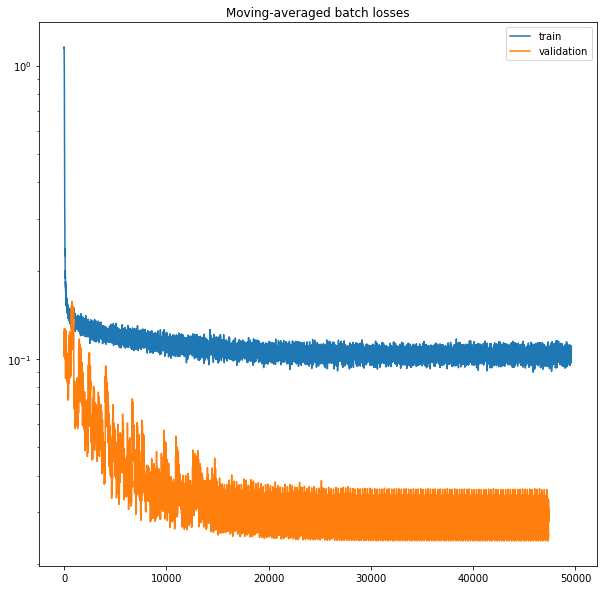

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [23]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

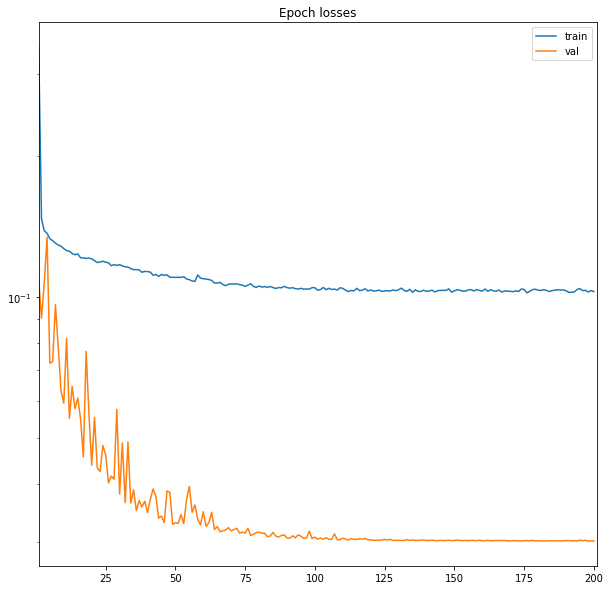

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [25]:
import os

In [26]:
import torch

In [27]:
from visualization_utils import output_to_binary, plot_sample

In [28]:
threshold = 0.5
to_plot = 10

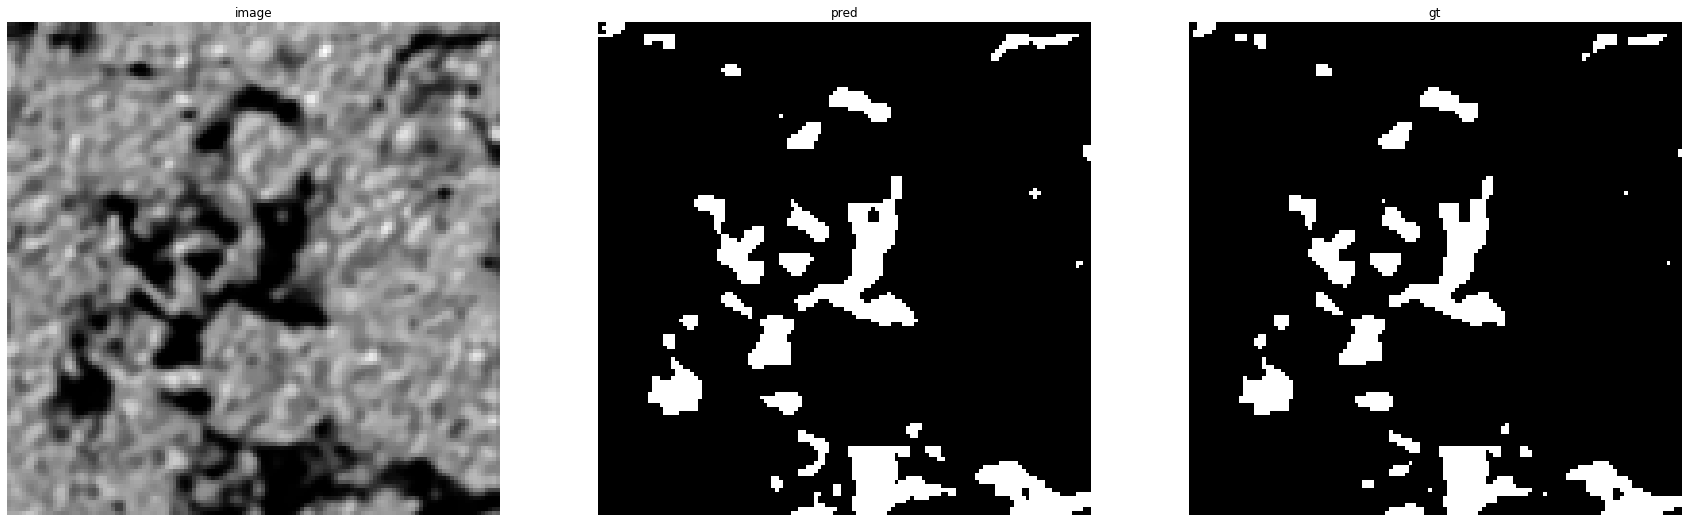

accuracy    : 0.98797607421875
precision   : 0.8980370774263904
recall      : 0.9939649969824985
f1          : 0.9435691778859925
pr_auc      : 0.996892672936059
iou         : 0.8931670281995662


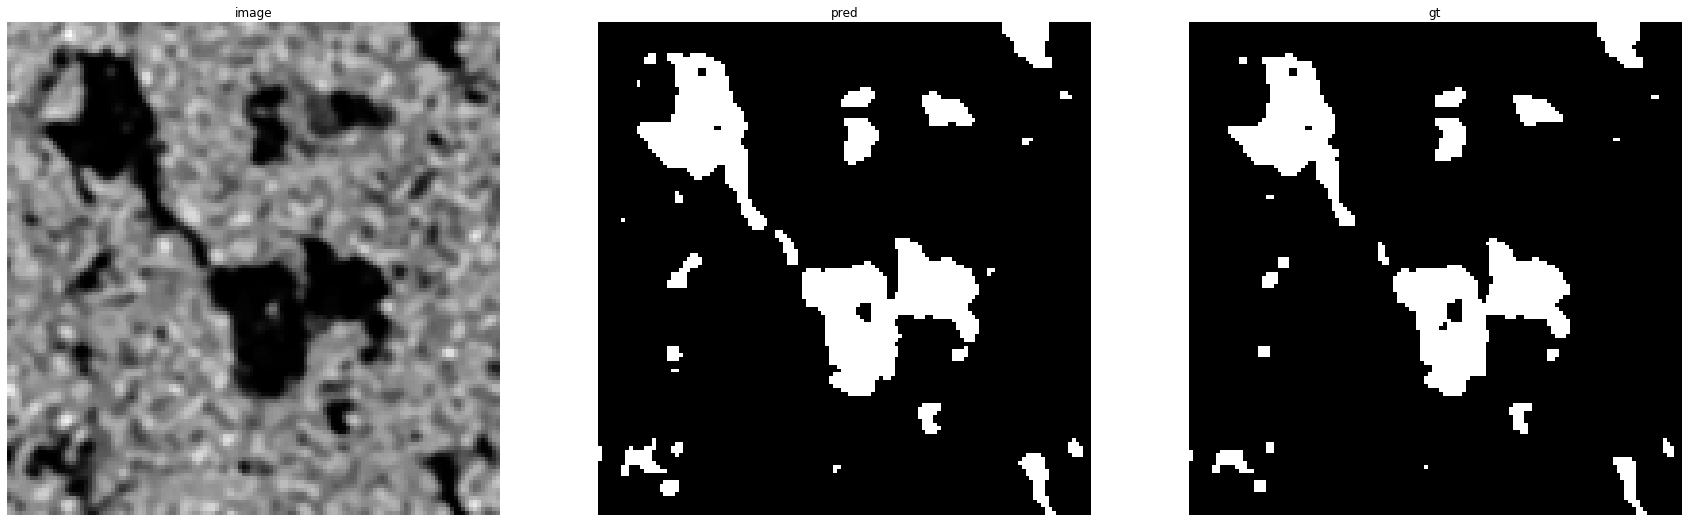

accuracy    : 0.984375
precision   : 0.8838475499092558
recall      : 1.0
f1          : 0.9383429672447013
pr_auc      : 0.999230317531058
iou         : 0.8838475499092558


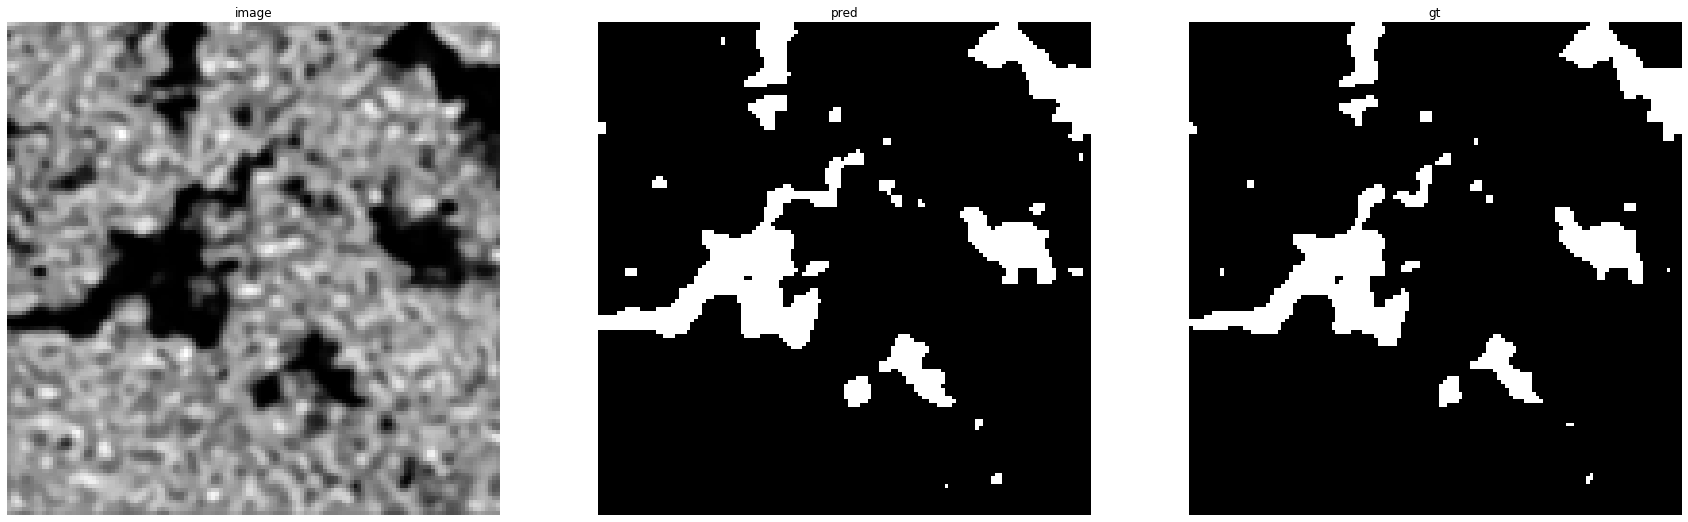

accuracy    : 0.98284912109375
precision   : 0.8642512077294686
recall      : 1.0
f1          : 0.9271832080849961
pr_auc      : 0.998243690289907
iou         : 0.8642512077294686


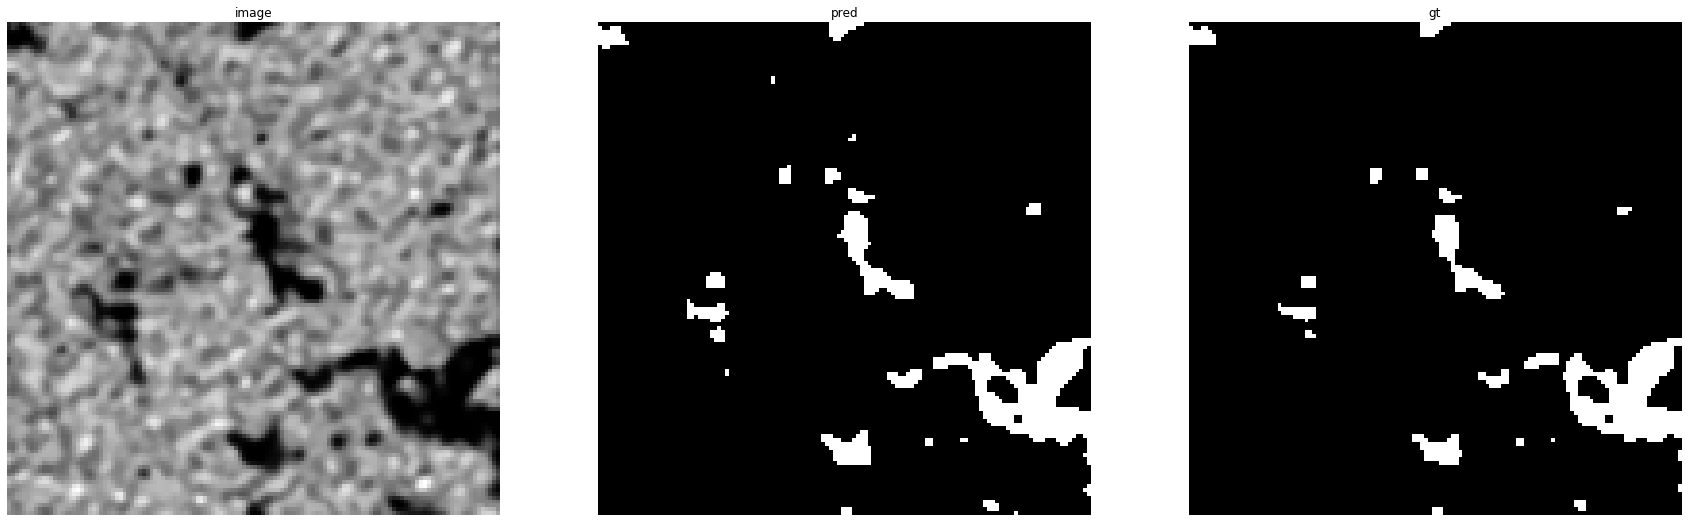

accuracy    : 0.99249267578125
precision   : 0.8744897959183674
recall      : 1.0
f1          : 0.9330430048992924
pr_auc      : 0.9967381374274628
iou         : 0.8744897959183674


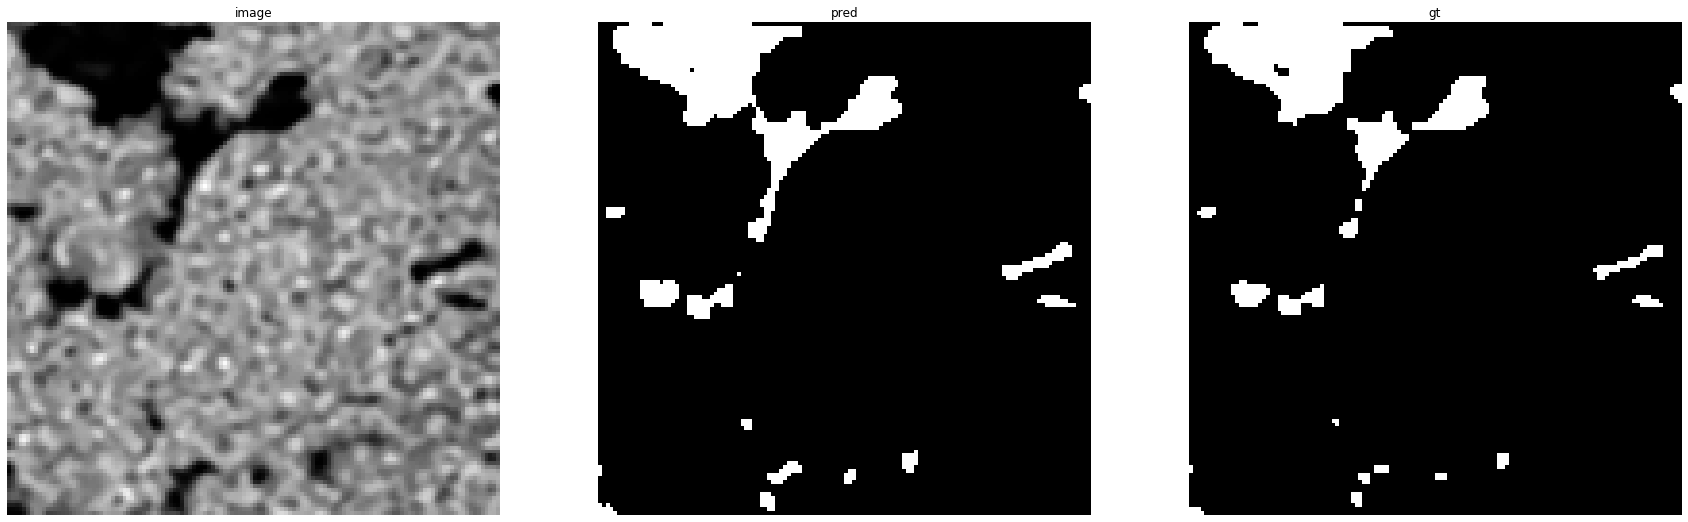

accuracy    : 0.9884033203125
precision   : 0.871967654986523
recall      : 1.0
f1          : 0.931605471562275
pr_auc      : 0.9983202942820832
iou         : 0.871967654986523


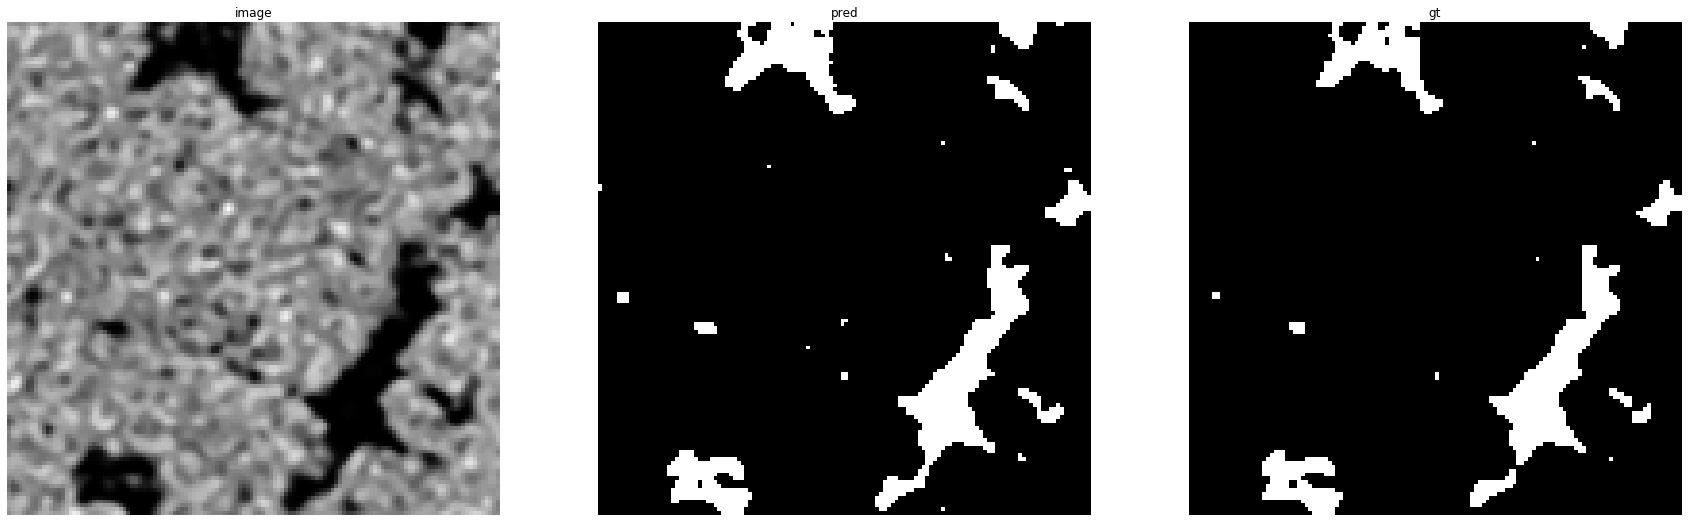

accuracy    : 0.99017333984375
precision   : 0.8952504879635654
recall      : 1.0
f1          : 0.9447305183659458
pr_auc      : 0.9978760297280002
iou         : 0.8952504879635654


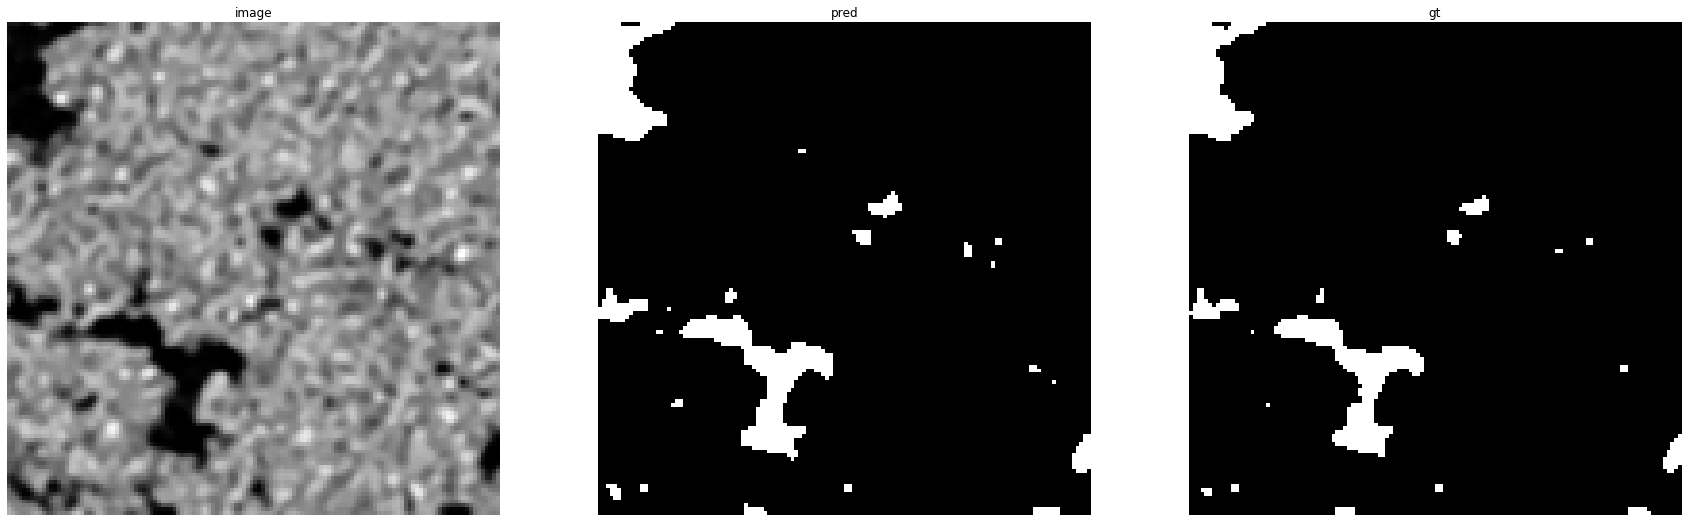

accuracy    : 0.9925537109375
precision   : 0.8835877862595419
recall      : 1.0
f1          : 0.9381965552178319
pr_auc      : 0.9983875184646268
iou         : 0.8835877862595419


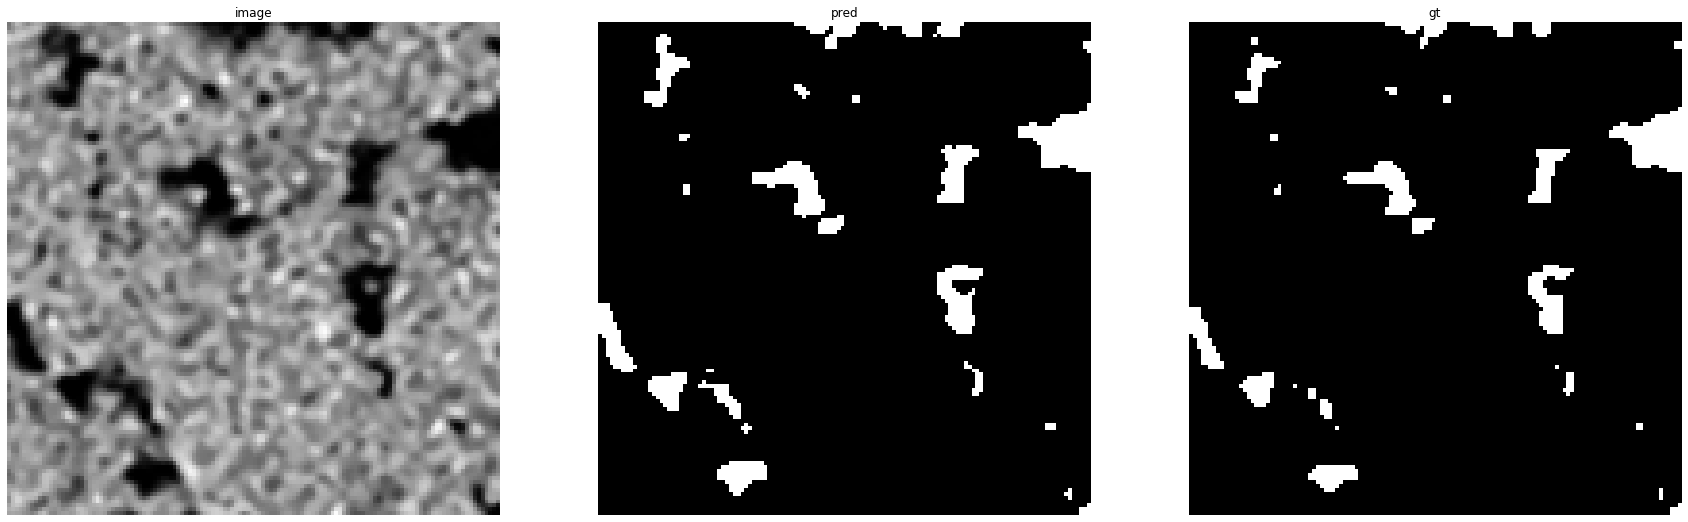

accuracy    : 0.9888916015625
precision   : 0.833941605839416
recall      : 1.0
f1          : 0.909452736318408
pr_auc      : 0.9952400214575863
iou         : 0.833941605839416


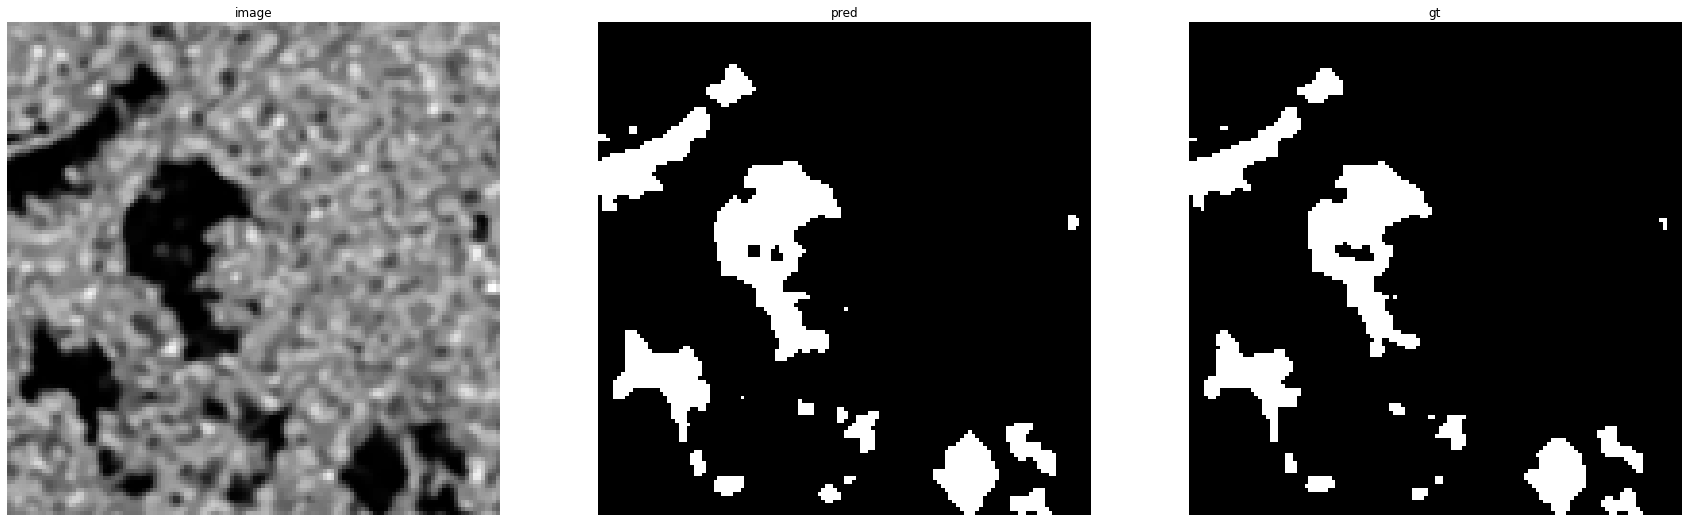

accuracy    : 0.9825439453125
precision   : 0.8628297362110312
recall      : 1.0
f1          : 0.9263645726055613
pr_auc      : 0.9975930861137665
iou         : 0.8628297362110312


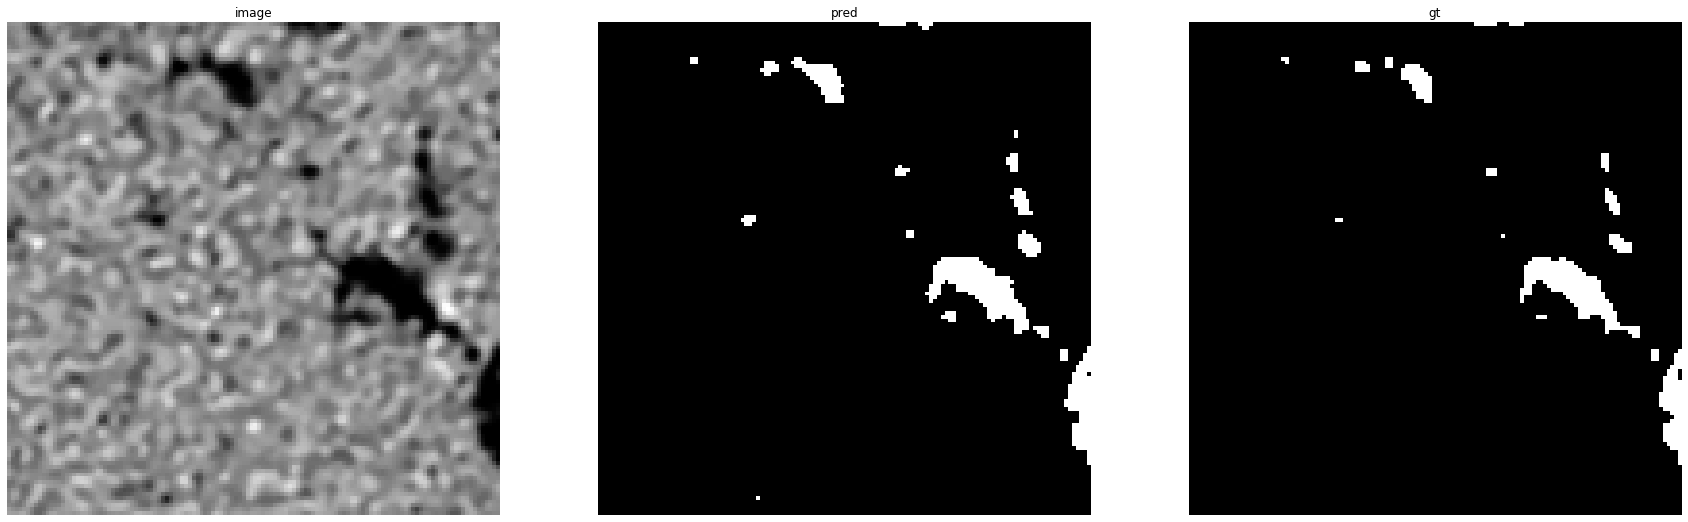

accuracy    : 0.9940185546875
precision   : 0.8321799307958477
recall      : 0.9979253112033195
f1          : 0.9075471698113207
pr_auc      : 0.9973853078431983
iou         : 0.8307426597582038


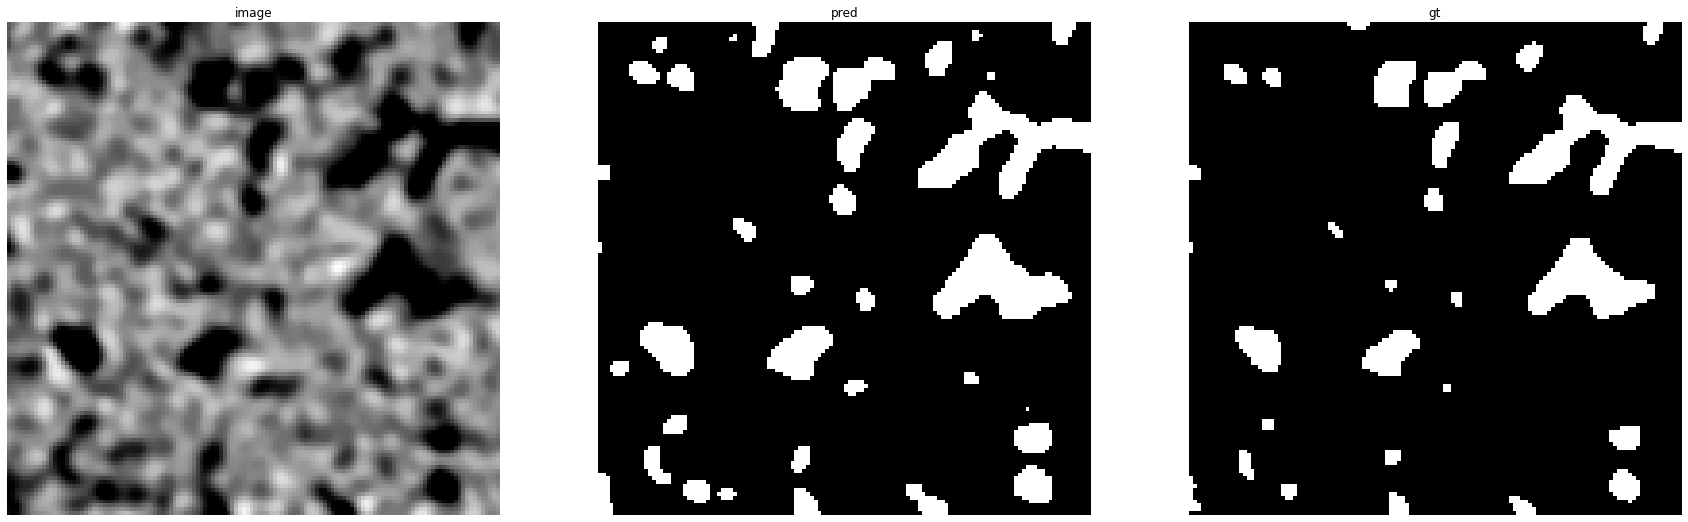

accuracy    : 0.958251953125
precision   : 0.713083718973496
recall      : 0.9988214496169712
f1          : 0.8321060382916053
pr_auc      : 0.9851262367788299
iou         : 0.712484237074401


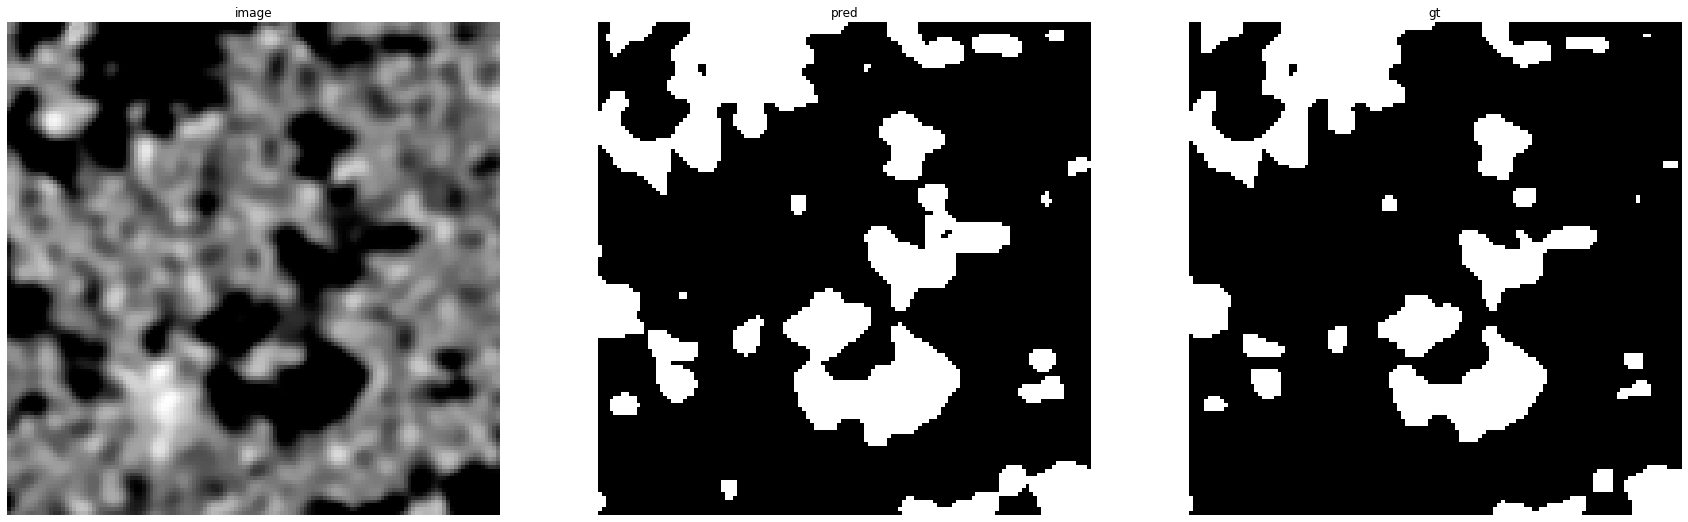

accuracy    : 0.95257568359375
precision   : 0.8121065375302663
recall      : 0.9997019374068554
f1          : 0.896192384769539
pr_auc      : 0.9942630808980693
iou         : 0.8119099491648512


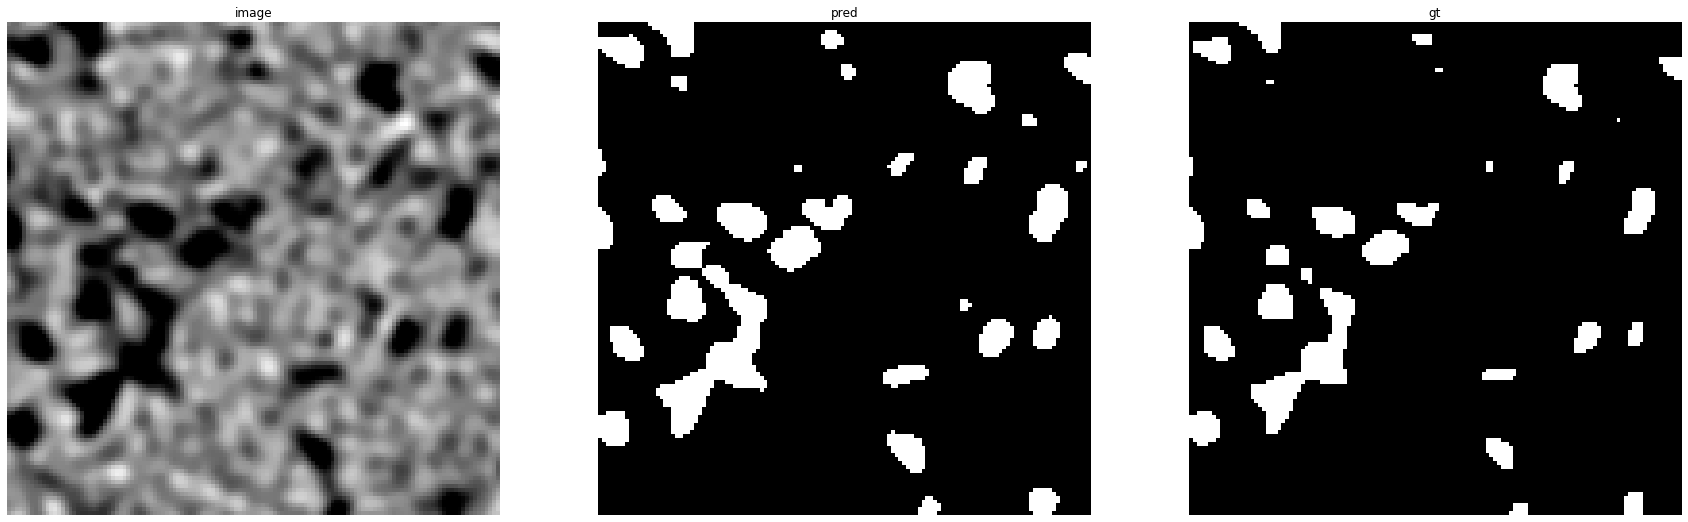

accuracy    : 0.96136474609375
precision   : 0.6770408163265306
recall      : 1.0
f1          : 0.8074231822330392
pr_auc      : 0.98858240926748
iou         : 0.6770408163265306


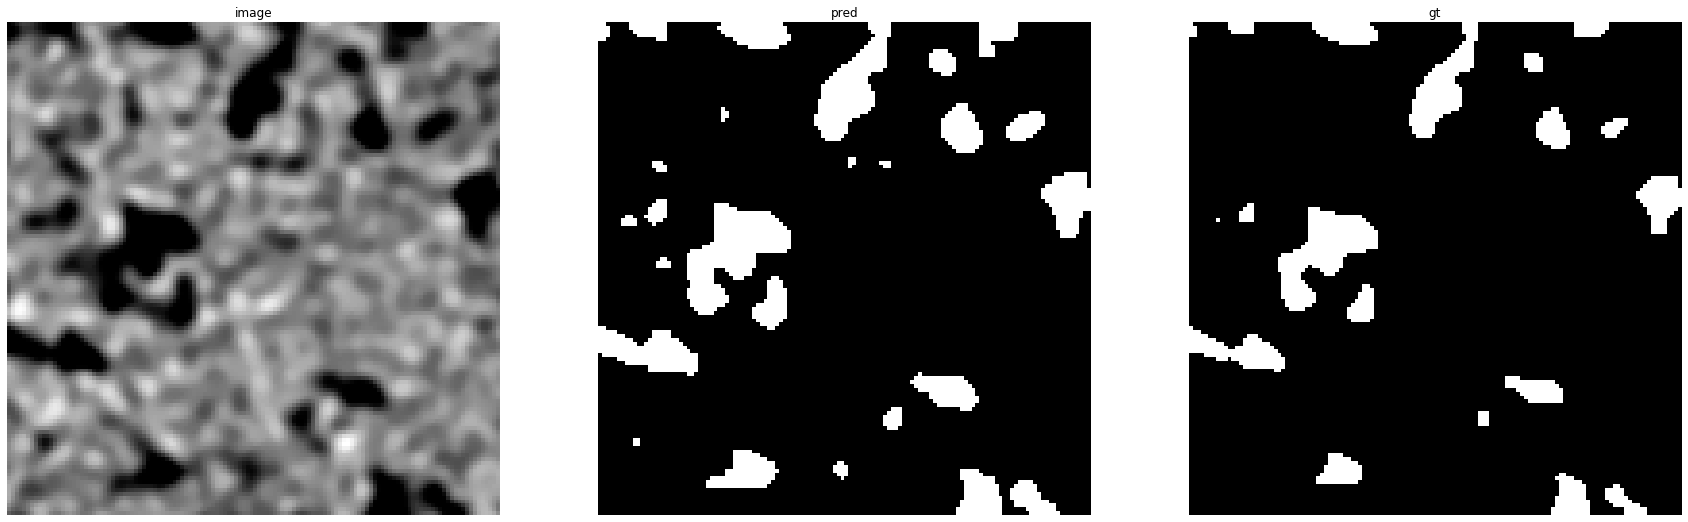

accuracy    : 0.9608154296875
precision   : 0.6904532304725168
recall      : 1.0
f1          : 0.8168853394181403
pr_auc      : 0.993648535137757
iou         : 0.6904532304725168


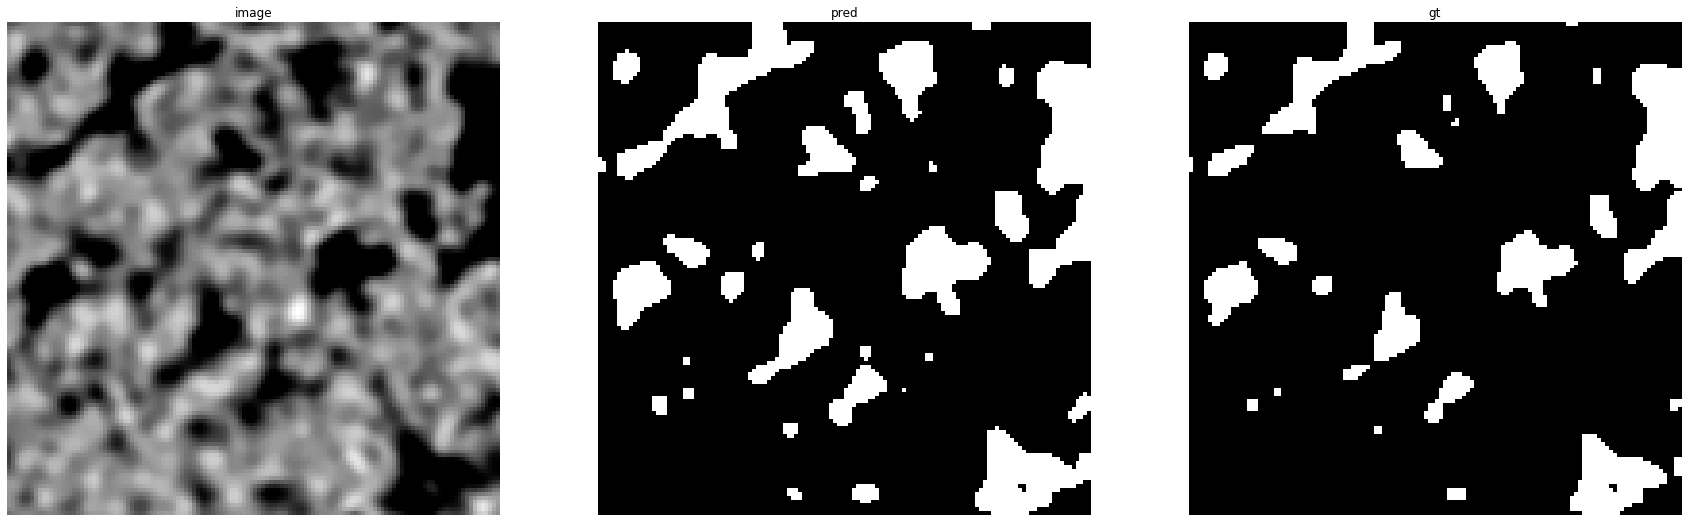

accuracy    : 0.94989013671875
precision   : 0.7356728911783644
recall      : 1.0
f1          : 0.8477091448710814
pr_auc      : 0.9923786496752873
iou         : 0.7356728911783644


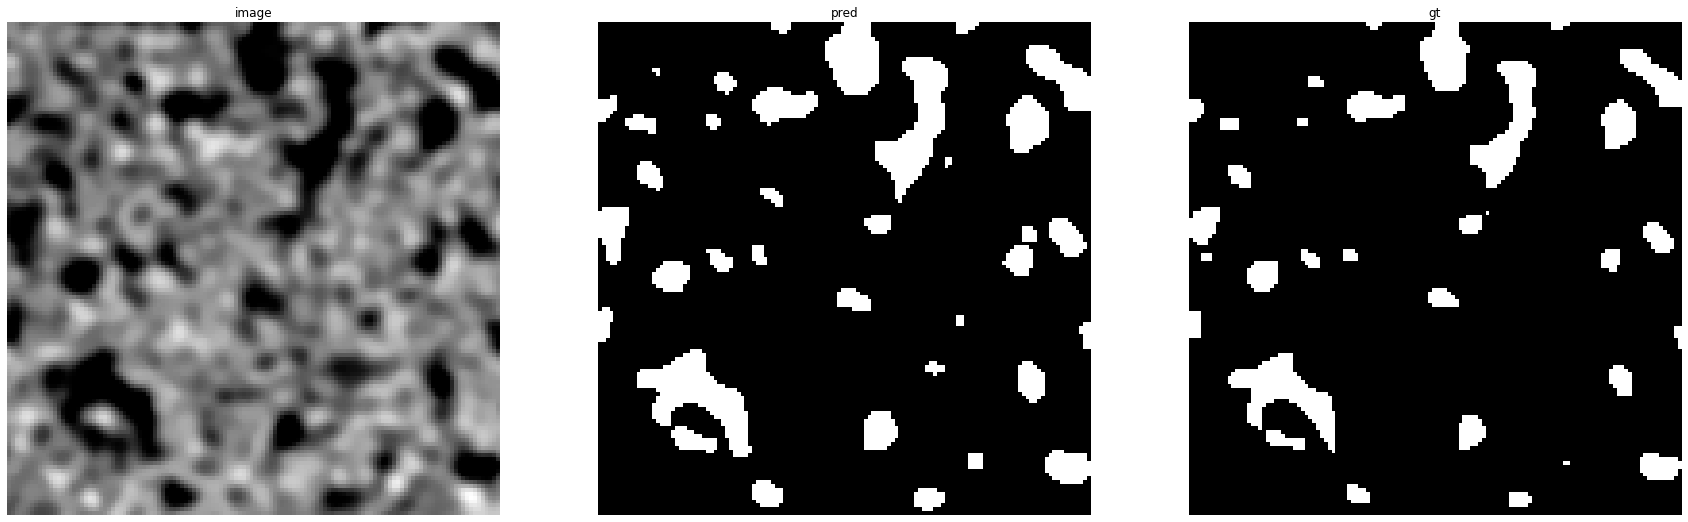

accuracy    : 0.9593505859375
precision   : 0.7110432125709297
recall      : 0.9975505205143906
f1          : 0.8302752293577981
pr_auc      : 0.9806580300143508
iou         : 0.7098039215686275


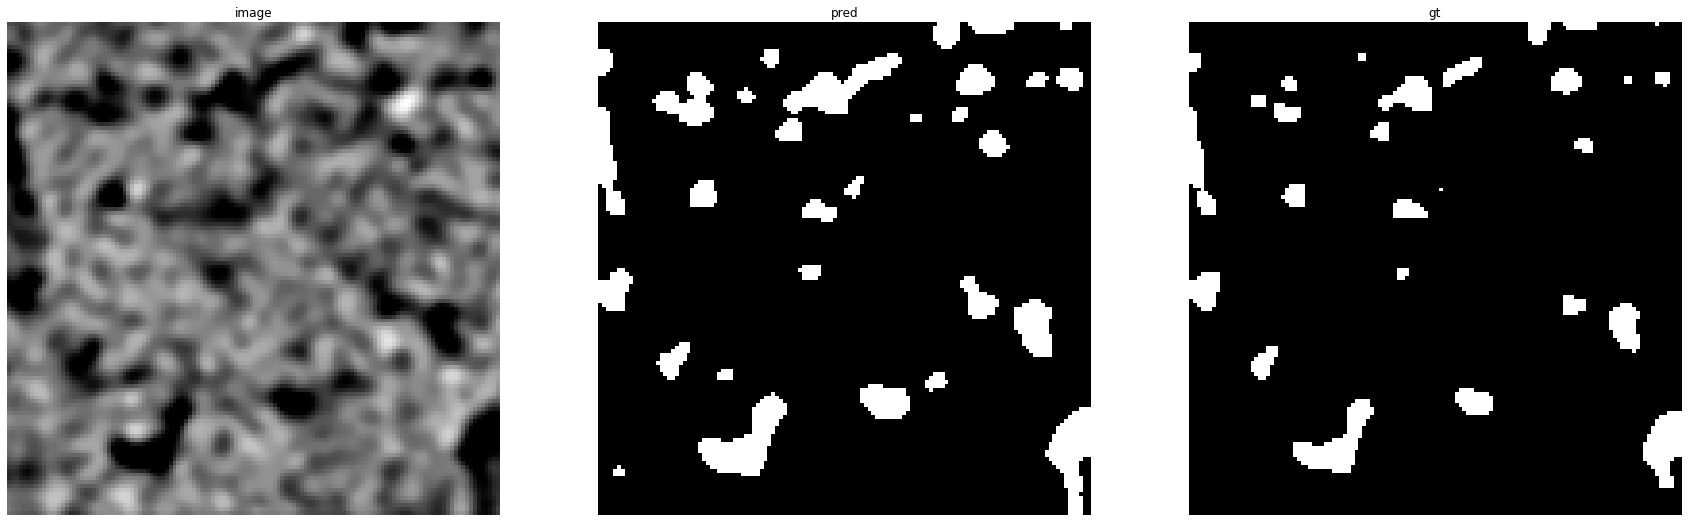

accuracy    : 0.95904541015625
precision   : 0.6137811233352635
recall      : 0.9962406015037594
f1          : 0.7595843783590112
pr_auc      : 0.9648985271937242
iou         : 0.6123627960716349


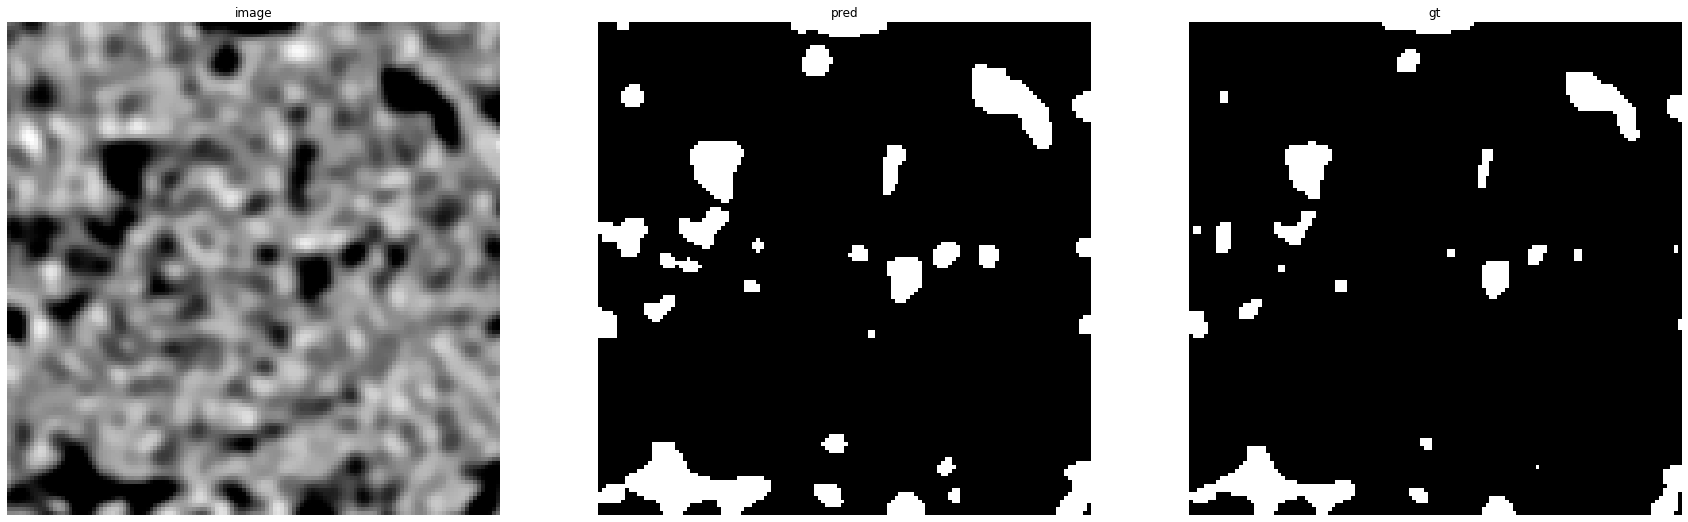

accuracy    : 0.96124267578125
precision   : 0.6331018518518519
recall      : 0.9990867579908675
f1          : 0.7750619907899399
pr_auc      : 0.9726873391370046
iou         : 0.6327356853672643


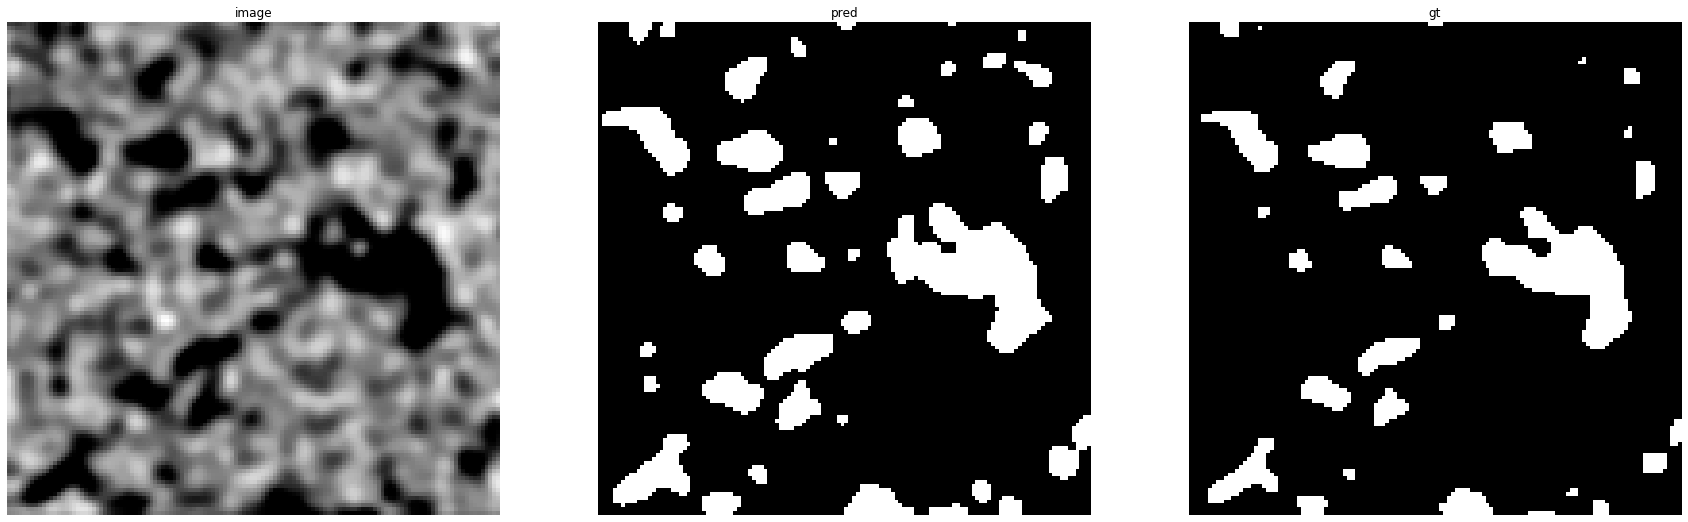

accuracy    : 0.94207763671875
precision   : 0.6610714285714285
recall      : 1.0
f1          : 0.7959578585250483
pr_auc      : 0.9843294166267074
iou         : 0.6610714285714285


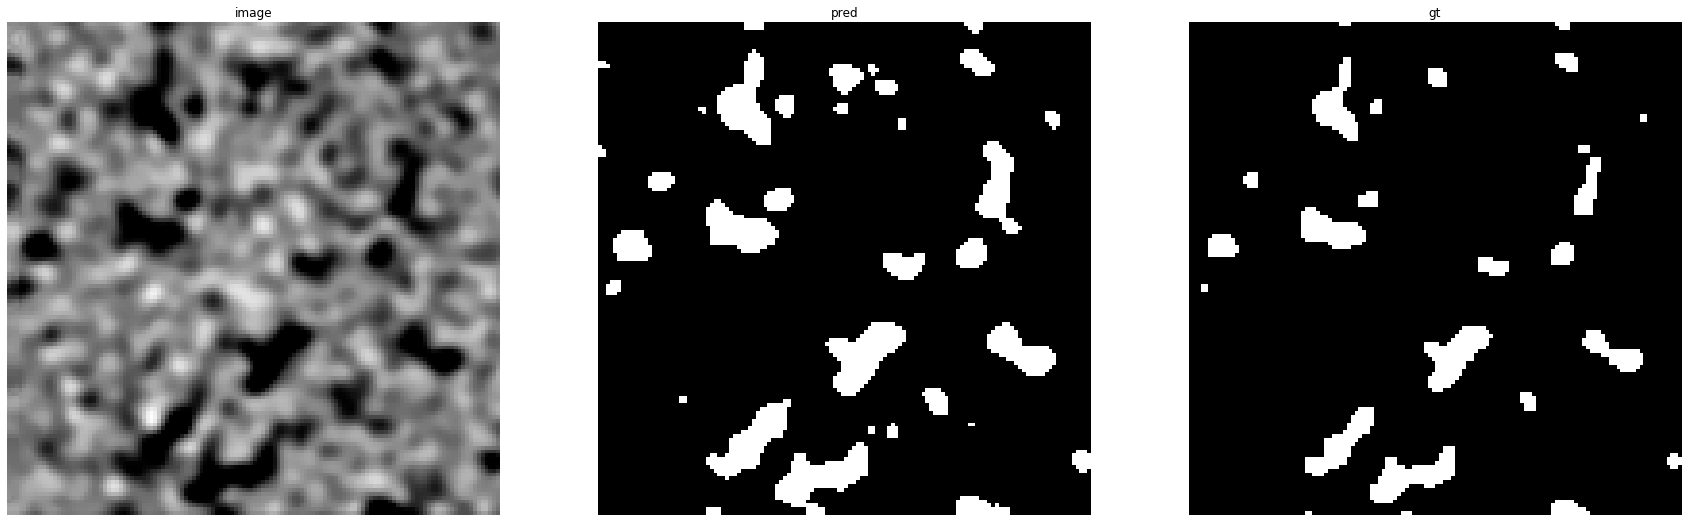

accuracy    : 0.9549560546875
precision   : 0.6006493506493507
recall      : 1.0
f1          : 0.7505070993914807
pr_auc      : 0.9837388988379994
iou         : 0.6006493506493507


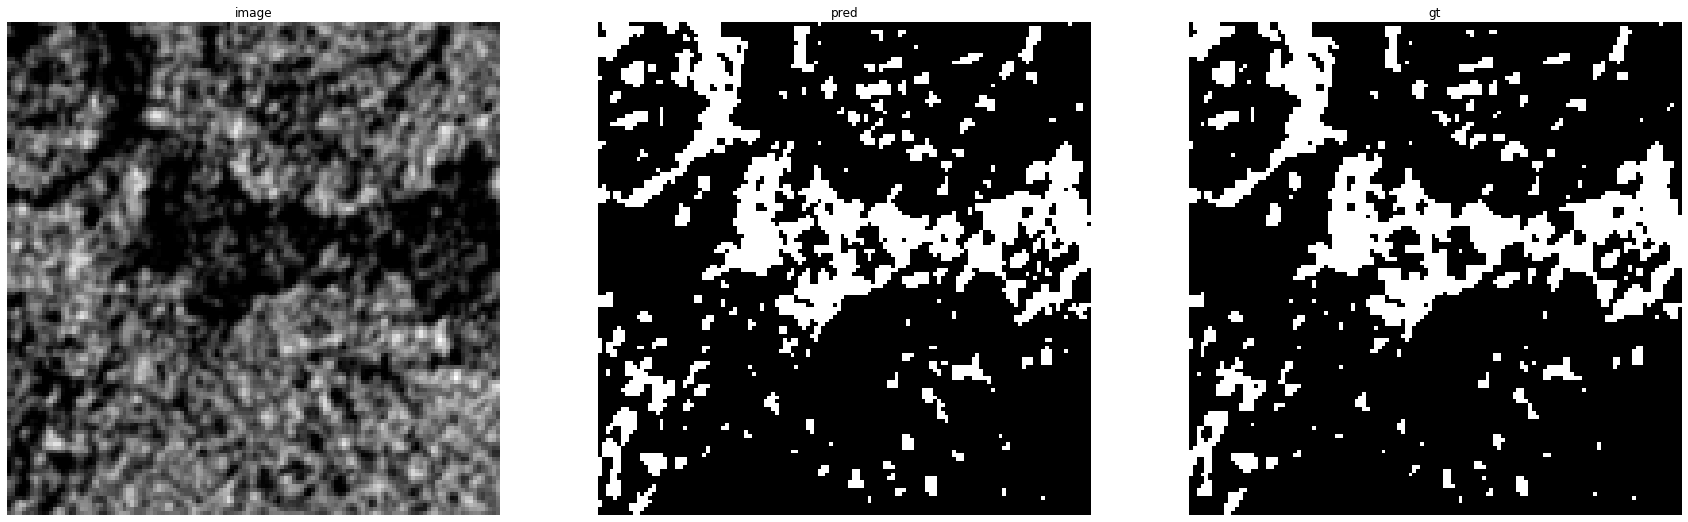

accuracy    : 0.97137451171875
precision   : 0.9120276896452264
recall      : 0.9506915213469633
f1          : 0.9309583394670985
pr_auc      : 0.9879082978831457
iou         : 0.8708344808592674


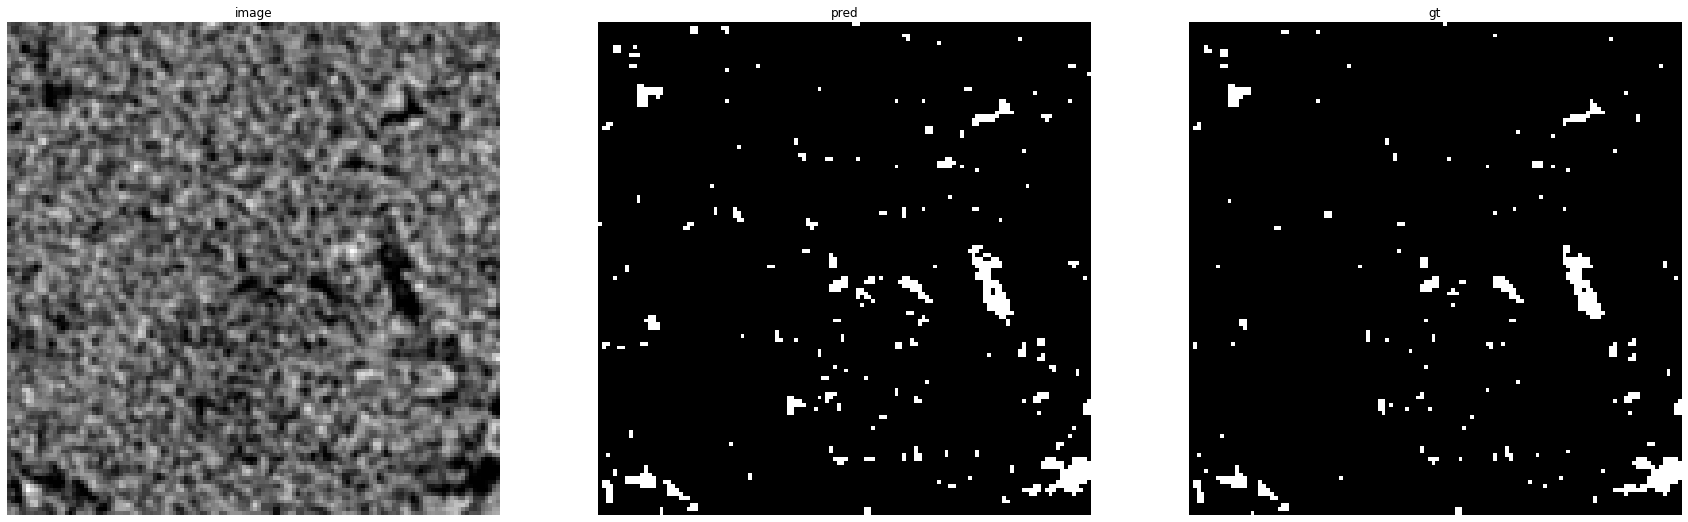

accuracy    : 0.9888916015625
precision   : 0.7383177570093458
recall      : 0.9713114754098361
f1          : 0.8389380530973451
pr_auc      : 0.9740344569586775
iou         : 0.7225609756097561


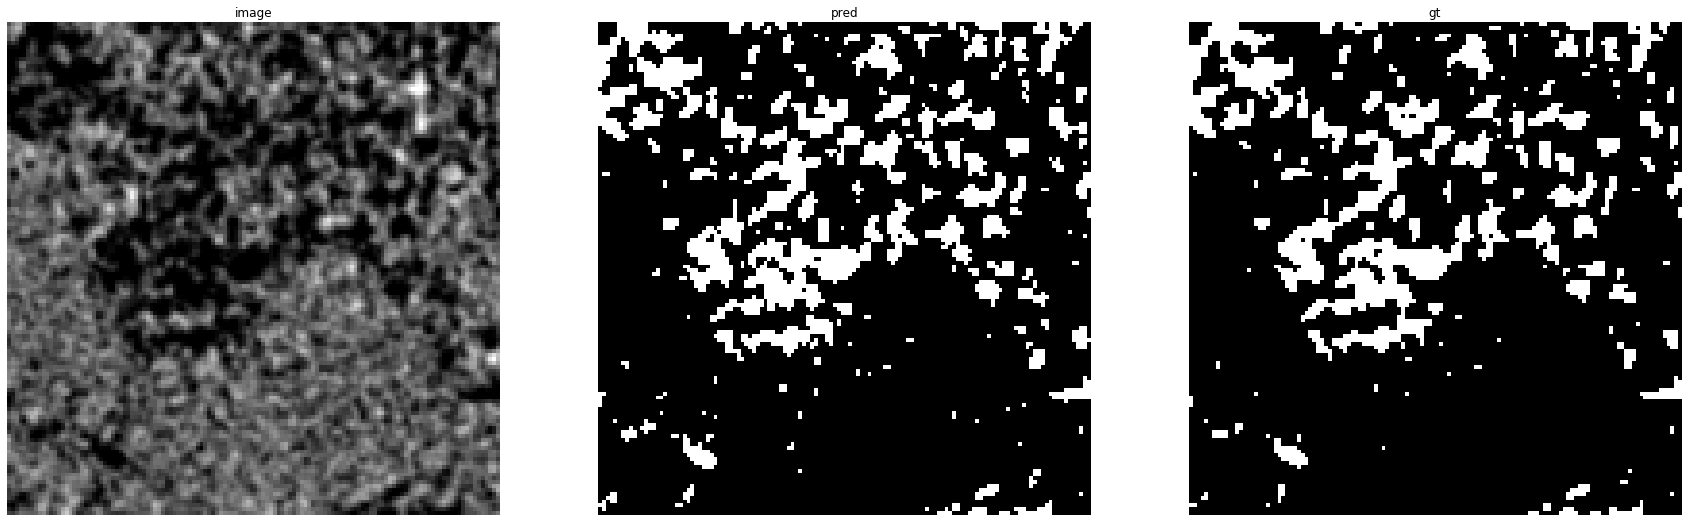

accuracy    : 0.9720458984375
precision   : 0.8800951086956522
recall      : 0.961053412462908
f1          : 0.9187943262411347
pr_auc      : 0.9858543493533624
iou         : 0.8497868153492949


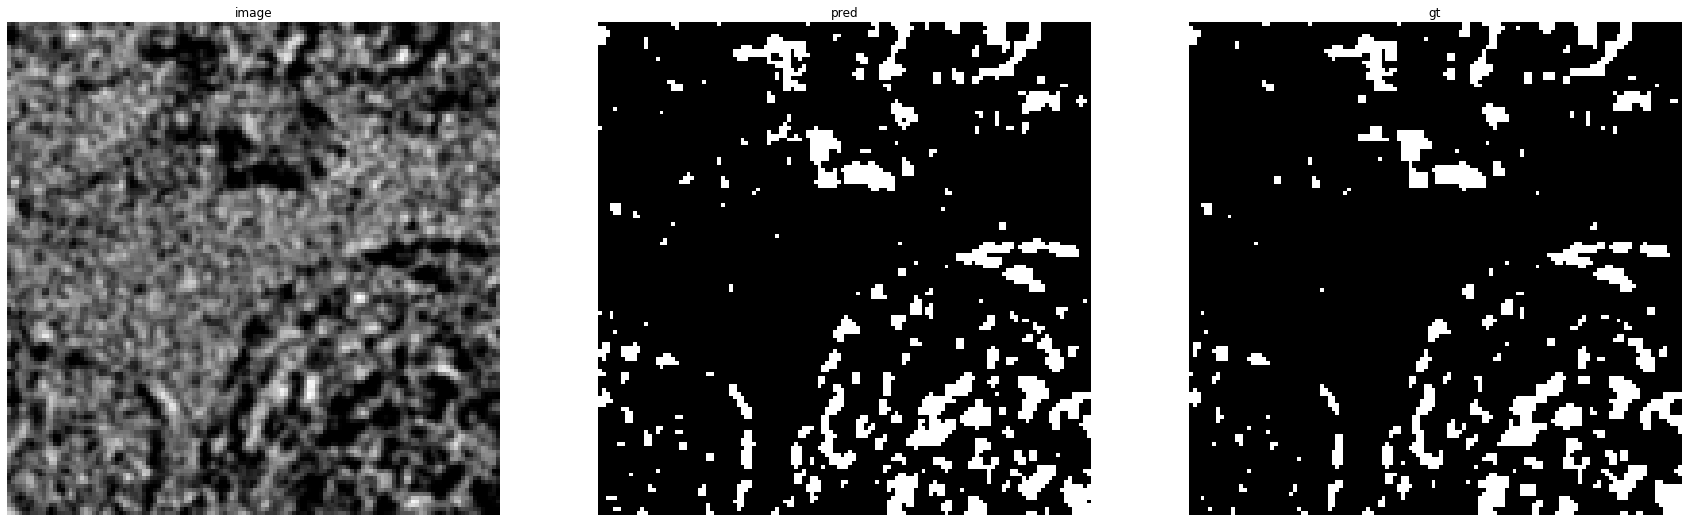

accuracy    : 0.9771728515625
precision   : 0.8455635491606714
recall      : 0.9713498622589531
f1          : 0.9041025641025641
pr_auc      : 0.9840064587084703
iou         : 0.8249883013570426


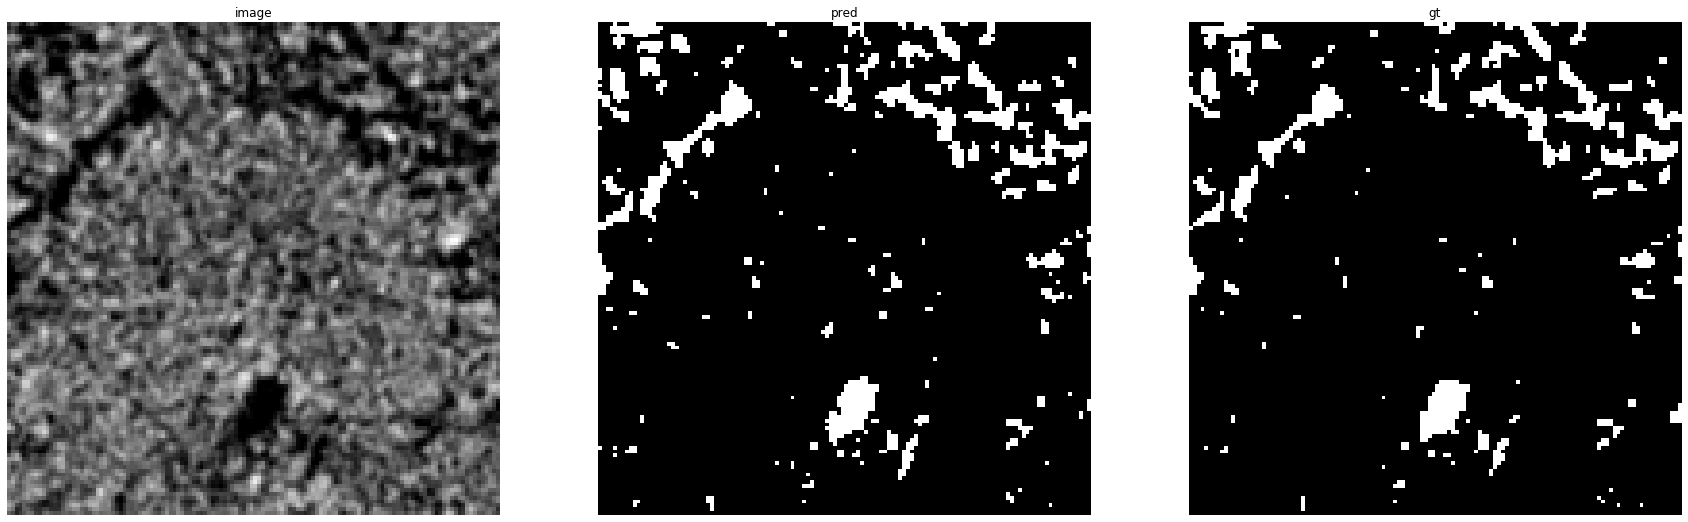

accuracy    : 0.98370361328125
precision   : 0.8597194388777555
recall      : 0.9575892857142857
f1          : 0.9060190073917634
pr_auc      : 0.9824580363523263
iou         : 0.8281853281853282


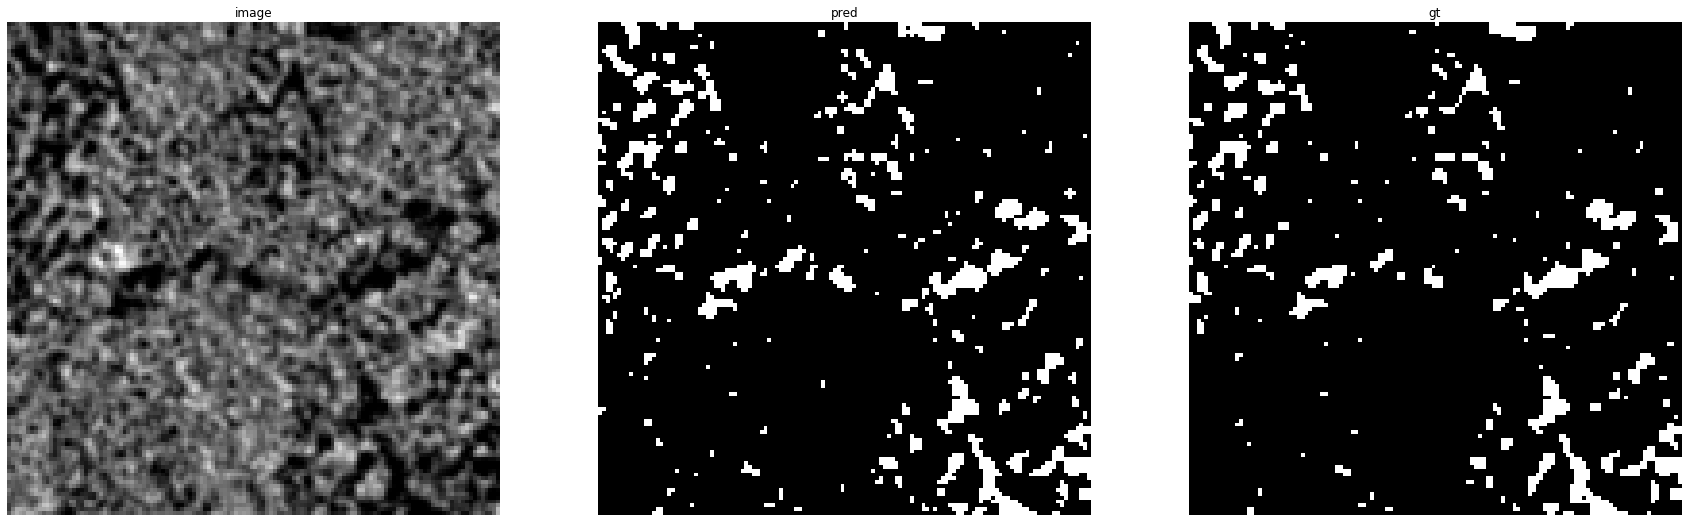

accuracy    : 0.9788818359375
precision   : 0.8245931283905967
recall      : 0.9613492621222769
f1          : 0.8877352368591824
pr_auc      : 0.9799590129126797
iou         : 0.7981330221703618


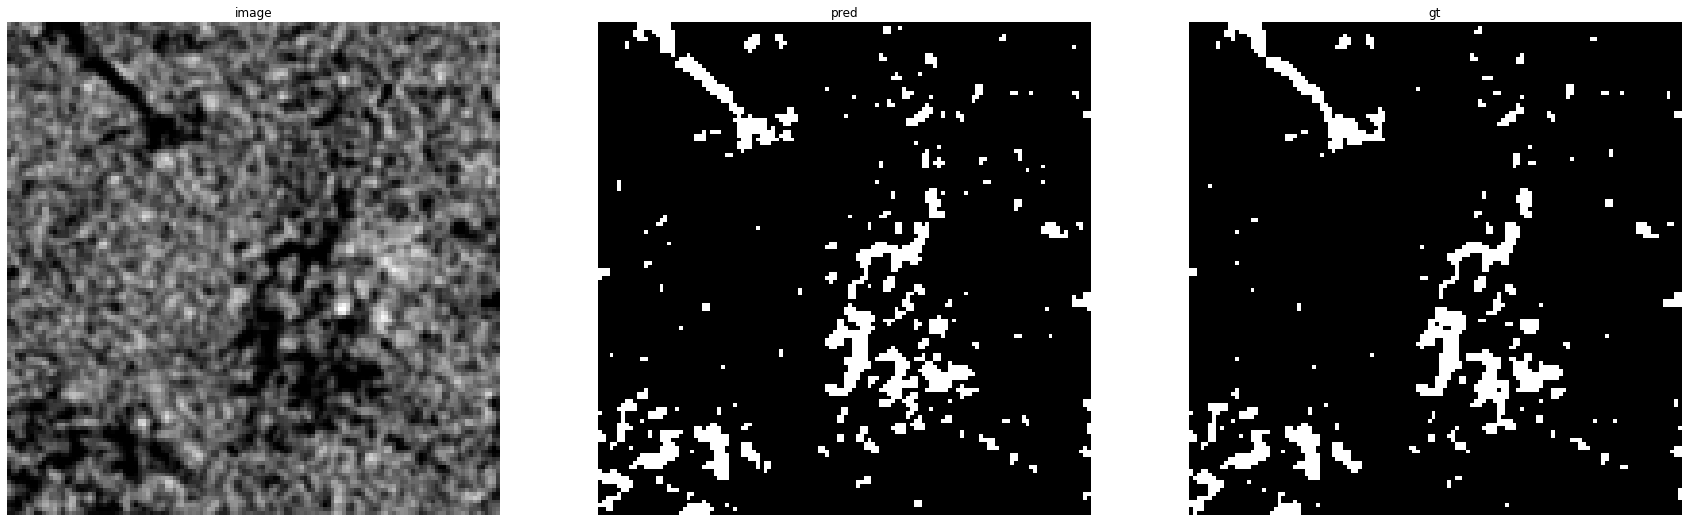

accuracy    : 0.9818115234375
precision   : 0.8382861091914305
recall      : 0.9498825371965545
f1          : 0.8906020558002937
pr_auc      : 0.9776640928542015
iou         : 0.8027796161482462


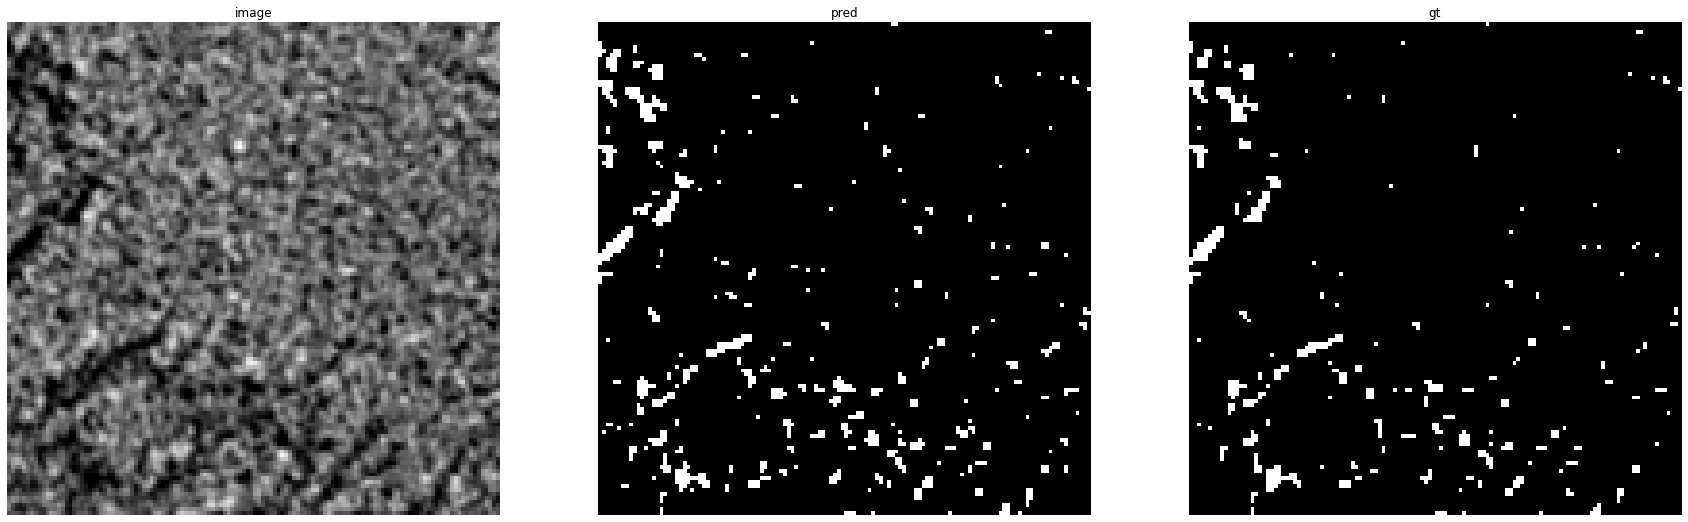

accuracy    : 0.98504638671875
precision   : 0.7085427135678392
recall      : 0.9774696707105719
f1          : 0.8215586307356154
pr_auc      : 0.9712189824285063
iou         : 0.6971569839307787


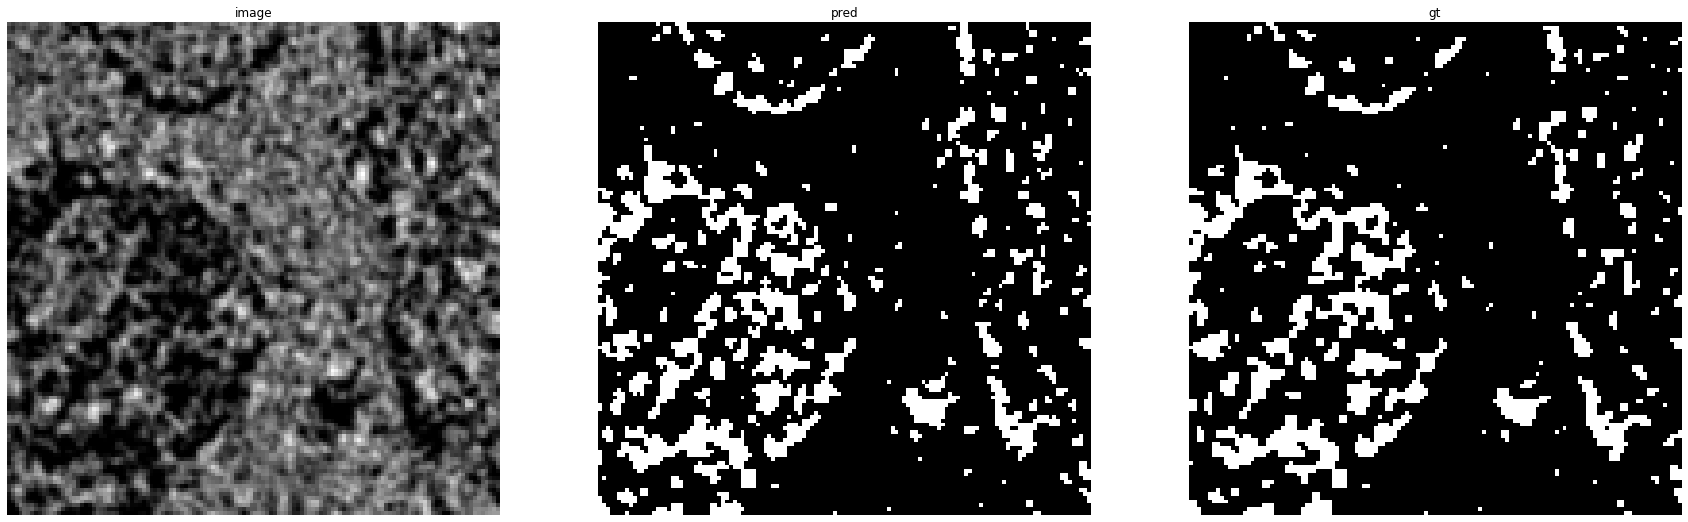

accuracy    : 0.96832275390625
precision   : 0.8597495527728086
recall      : 0.9498023715415019
f1          : 0.9025352112676056
pr_auc      : 0.980382239115207
iou         : 0.8223819301848049


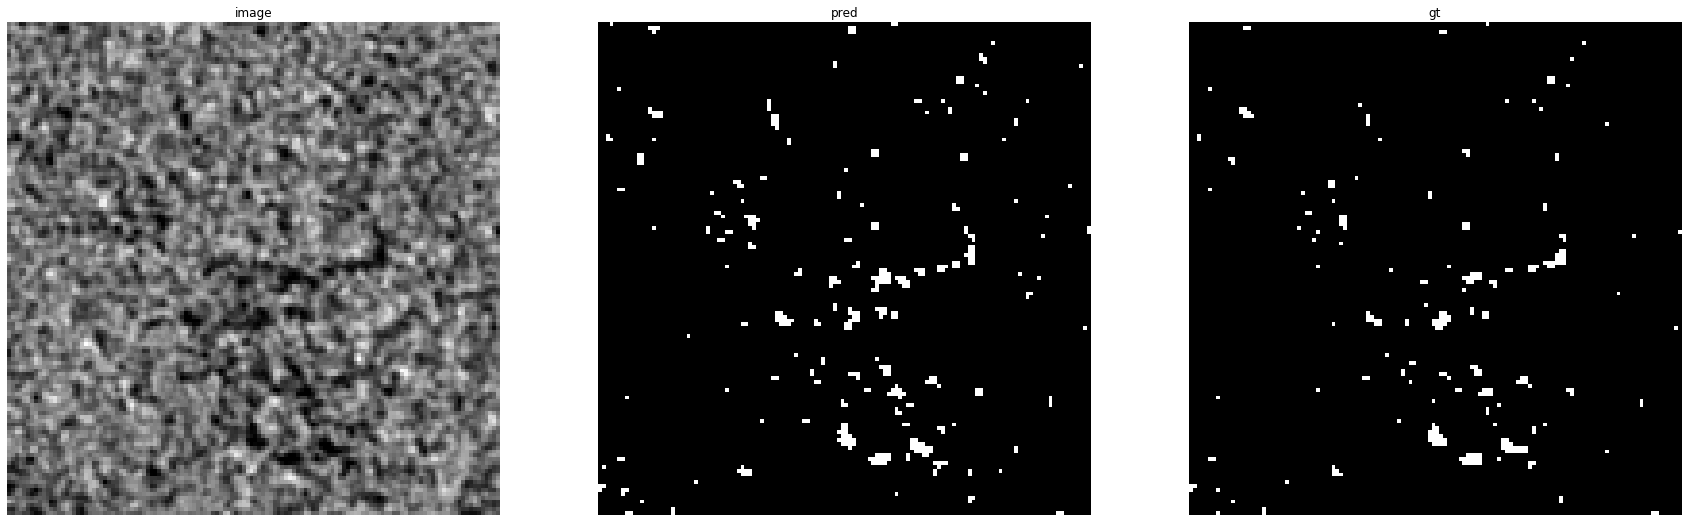

accuracy    : 0.99029541015625
precision   : 0.6485148514851485
recall      : 0.9390681003584229
f1          : 0.767203513909224
pr_auc      : 0.9385952612282817
iou         : 0.6223277909738717


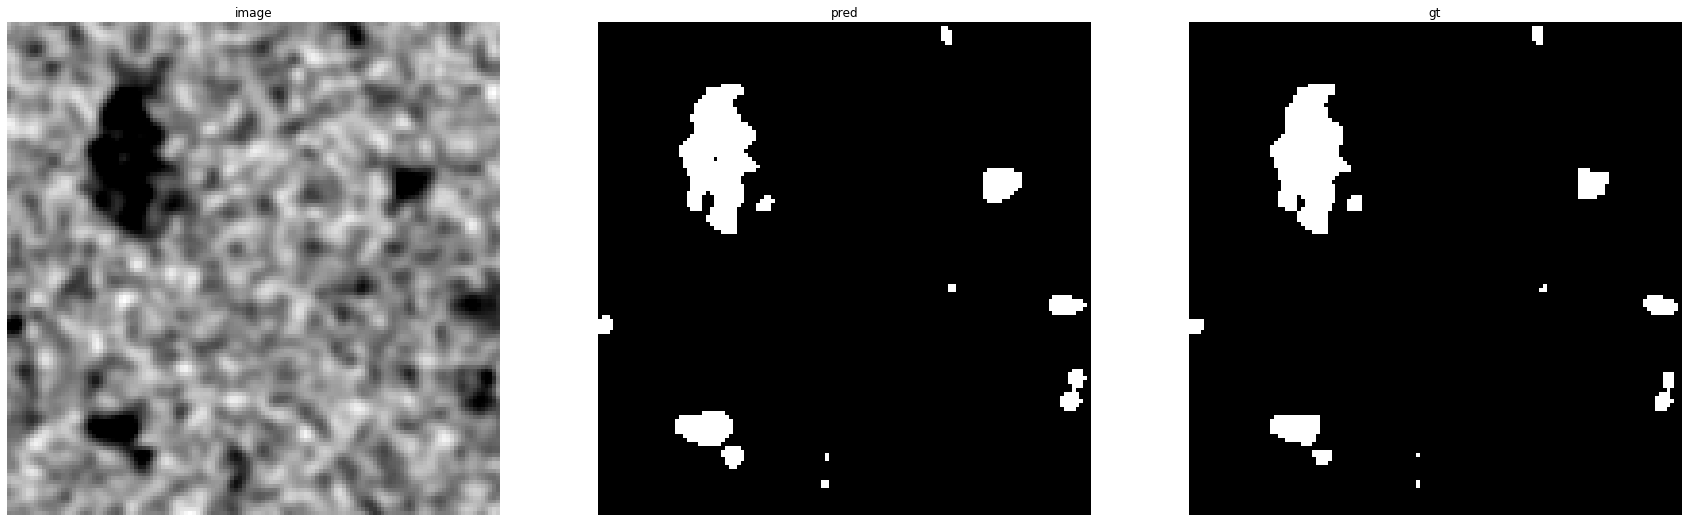

accuracy    : 0.99310302734375
precision   : 0.8939213349225268
recall      : 0.9689922480620154
f1          : 0.929944203347799
pr_auc      : 0.9895688420238533
iou         : 0.8690614136732329


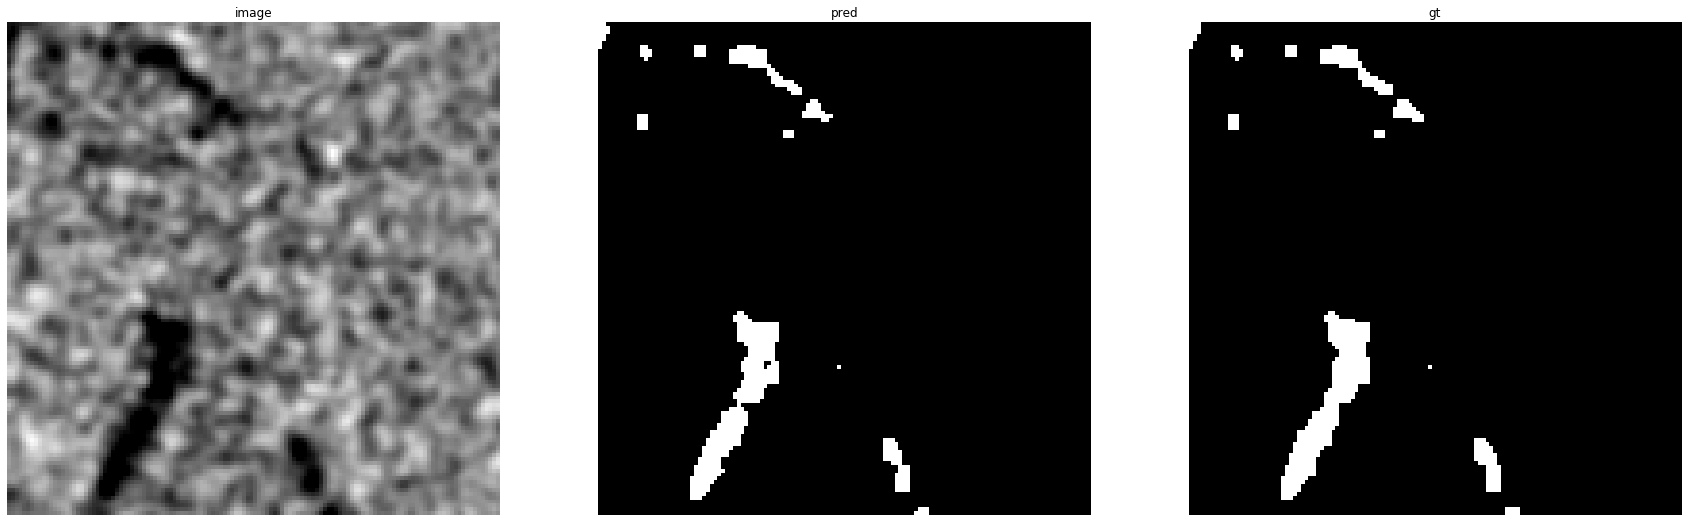

accuracy    : 0.9969482421875
precision   : 0.9965095986038395
recall      : 0.9224555735056543
f1          : 0.9580536912751678
pr_auc      : 0.9962018904905411
iou         : 0.9194847020933977


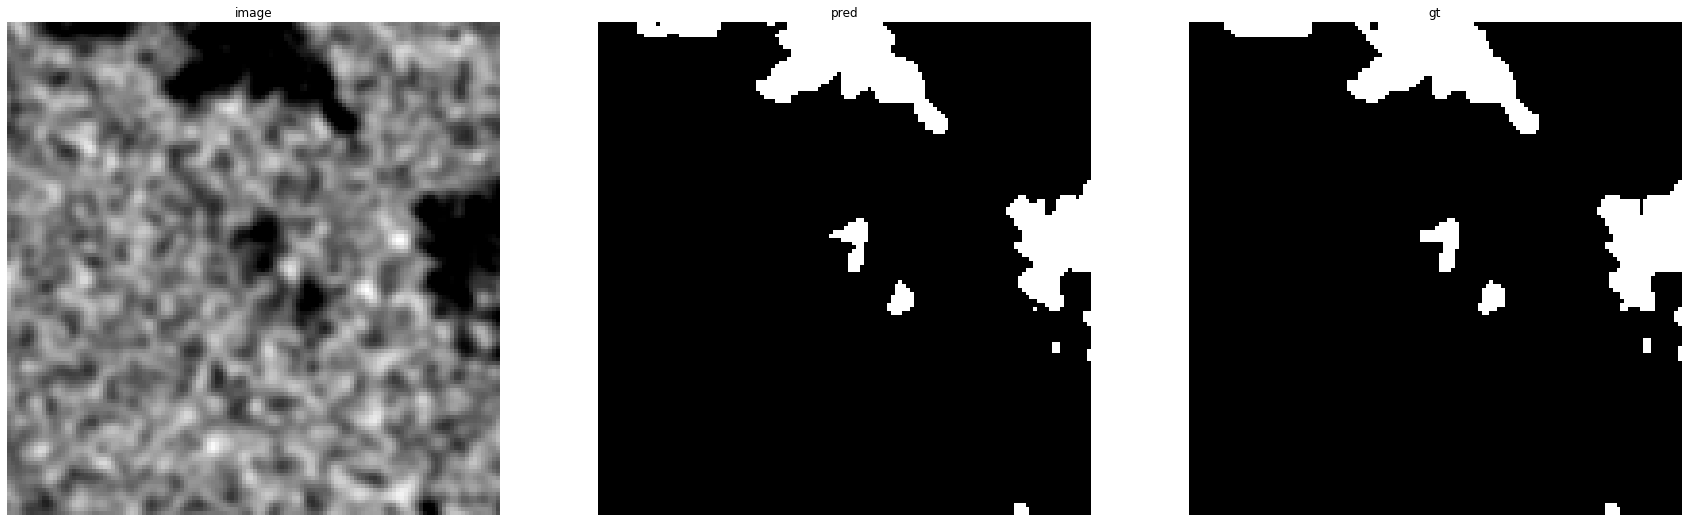

accuracy    : 0.99468994140625
precision   : 0.9956076134699854
recall      : 0.9437890353920888
f1          : 0.9690060562878519
pr_auc      : 0.998835018750093
iou         : 0.939875604699378


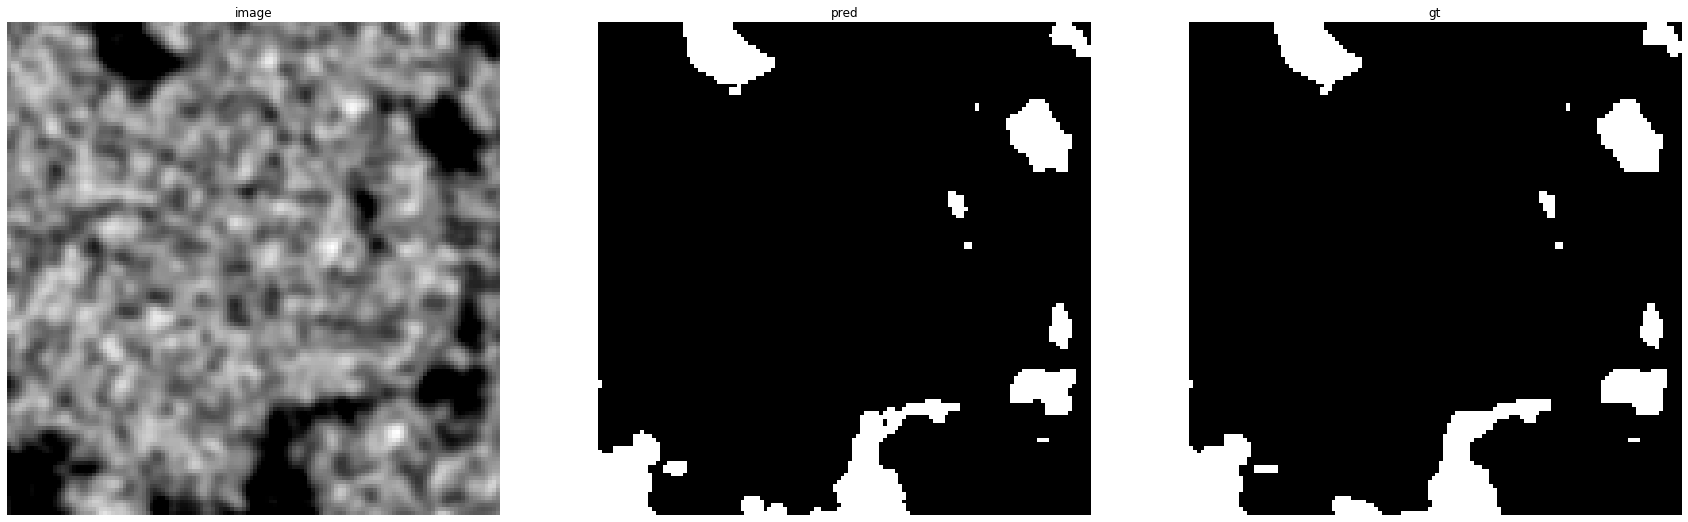

accuracy    : 0.9931640625
precision   : 0.9633088725817212
recall      : 0.9620253164556962
f1          : 0.9626666666666667
pr_auc      : 0.9958403425865486
iou         : 0.9280205655526992


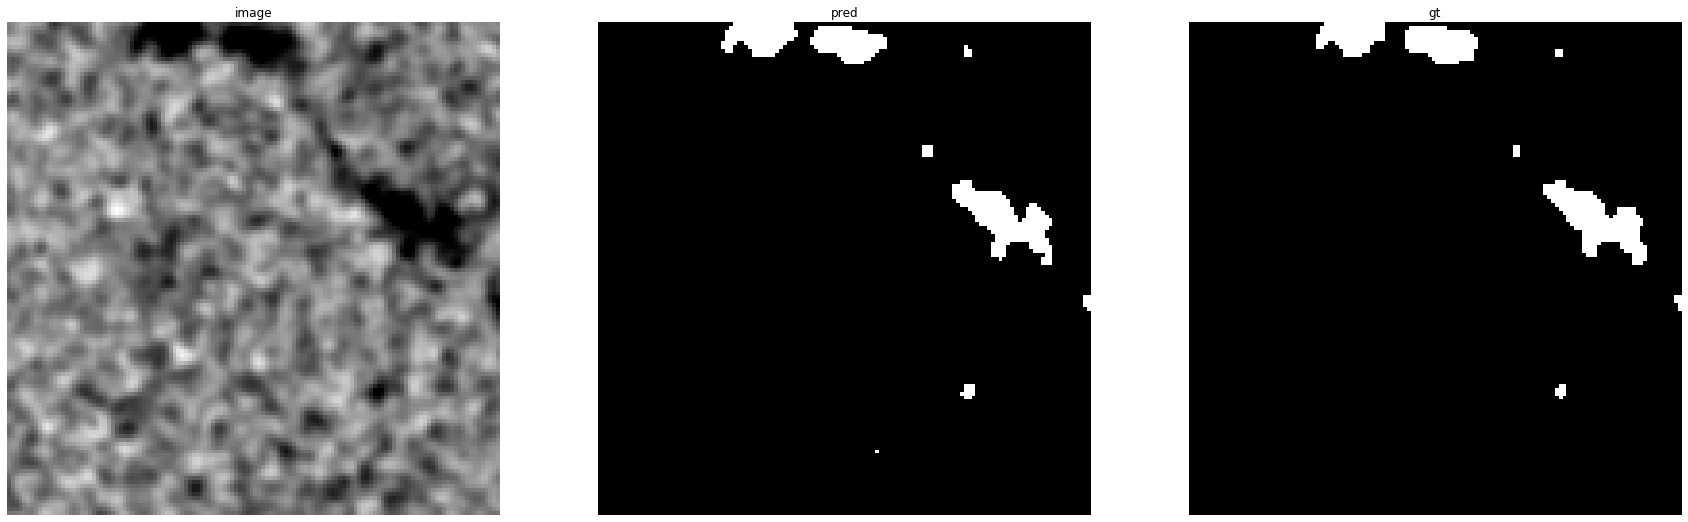

accuracy    : 0.99639892578125
precision   : 0.9482142857142857
recall      : 0.946524064171123
f1          : 0.9473684210526316
pr_auc      : 0.9924406932917145
iou         : 0.9


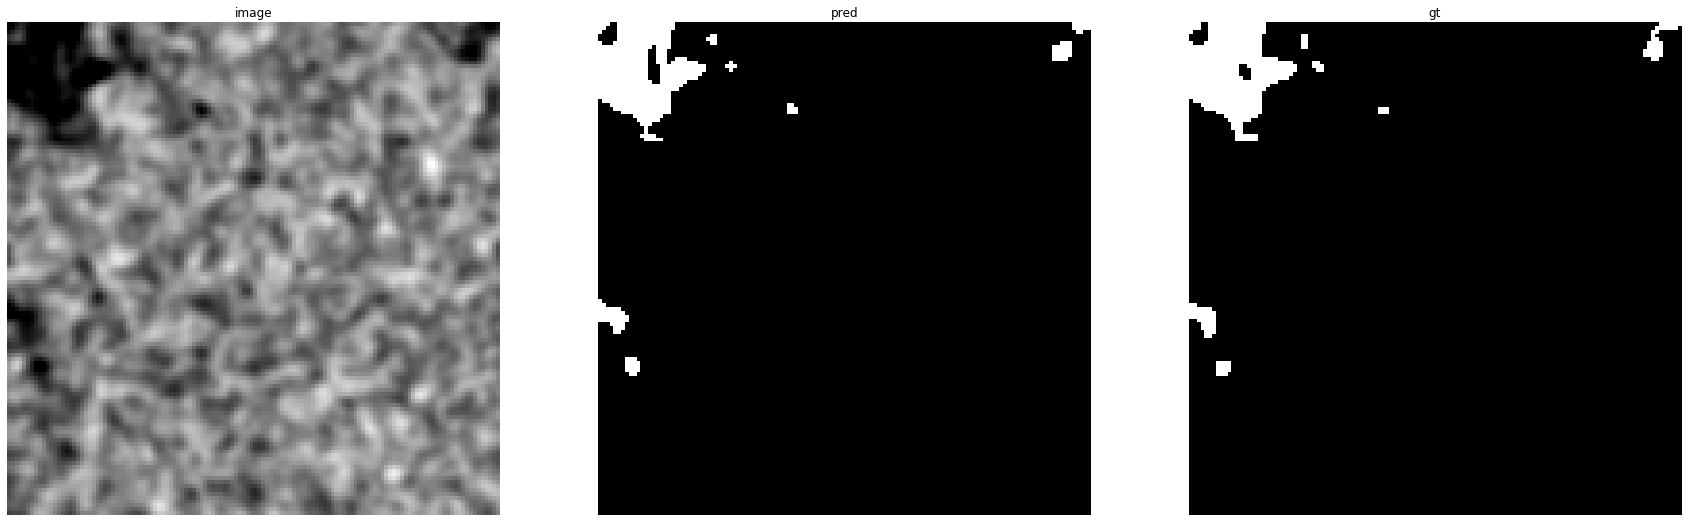

accuracy    : 0.99560546875
precision   : 0.9608177172061328
recall      : 0.9200652528548124
f1          : 0.9400000000000001
pr_auc      : 0.9900525872834771
iou         : 0.8867924528301887


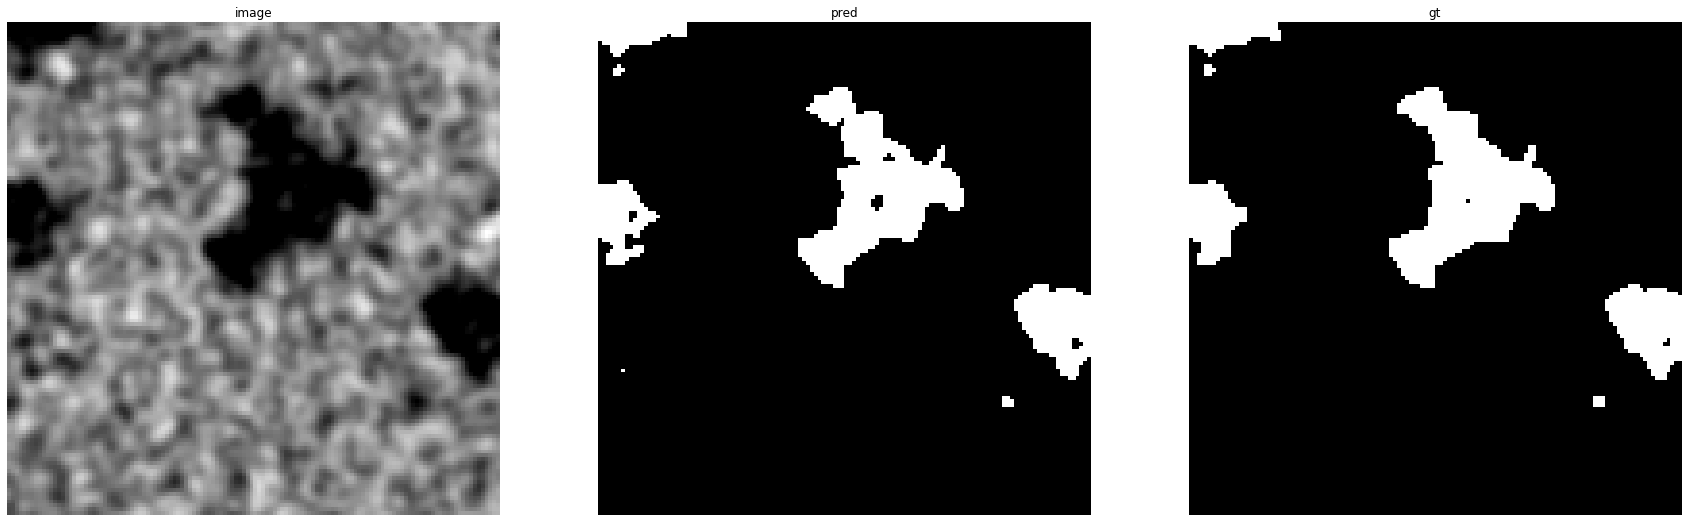

accuracy    : 0.99285888671875
precision   : 0.9932639314145744
recall      : 0.9386574074074074
f1          : 0.9651889318655161
pr_auc      : 0.9969786281418451
iou         : 0.9327199539965497


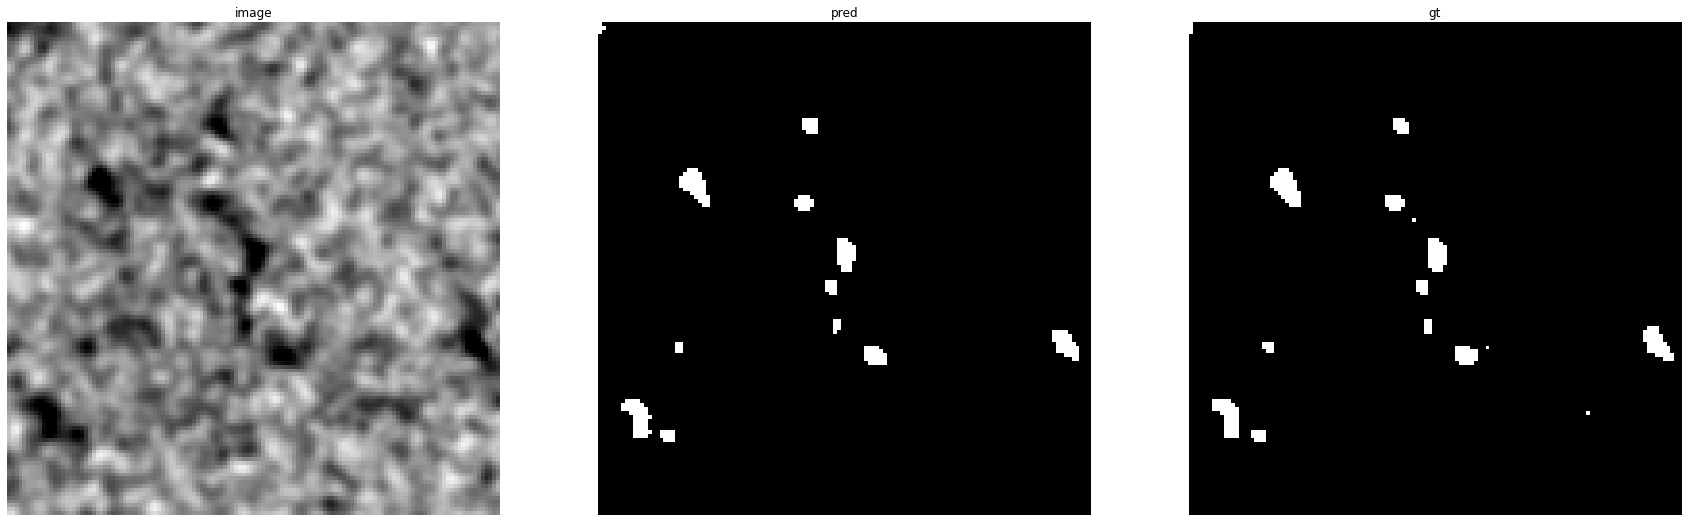

accuracy    : 0.9984130859375
precision   : 0.9811320754716981
recall      : 0.9252669039145908
f1          : 0.9523809523809524
pr_auc      : 0.9919404710156122
iou         : 0.9090909090909091


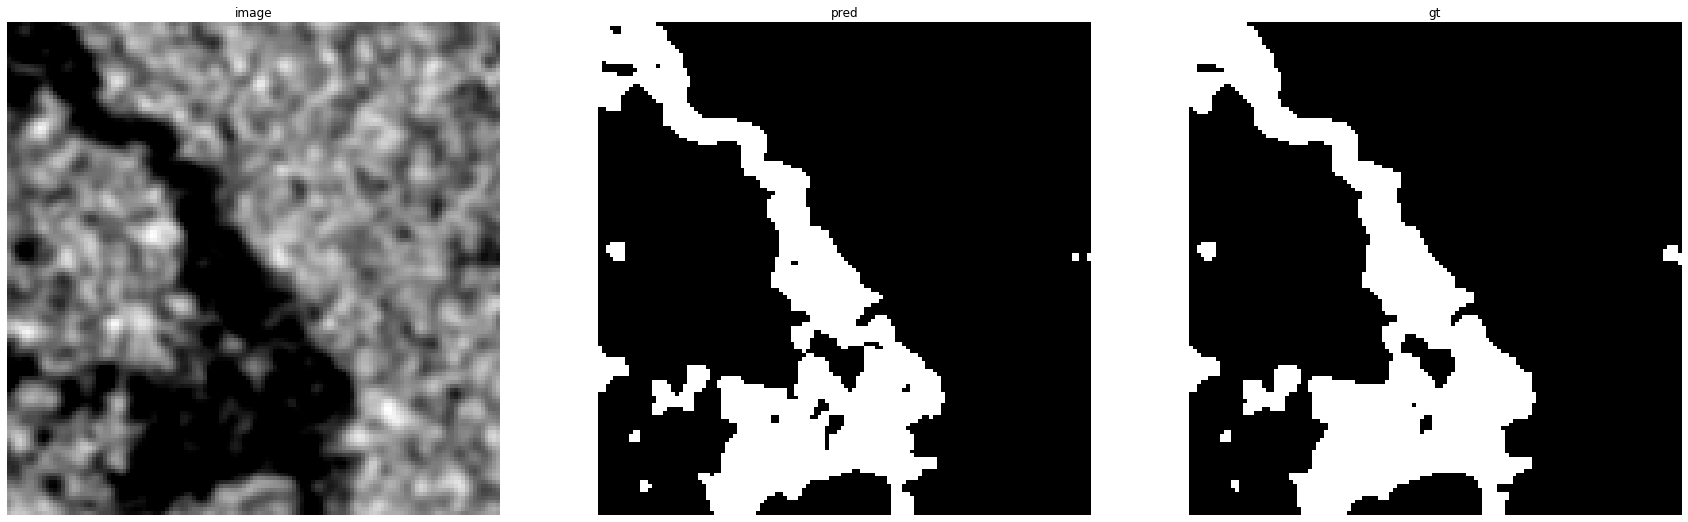

accuracy    : 0.98590087890625
precision   : 0.9987841945288753
recall      : 0.9353828636493026
f1          : 0.9660443921799207
pr_auc      : 0.9986907480126647
iou         : 0.9343190218936593


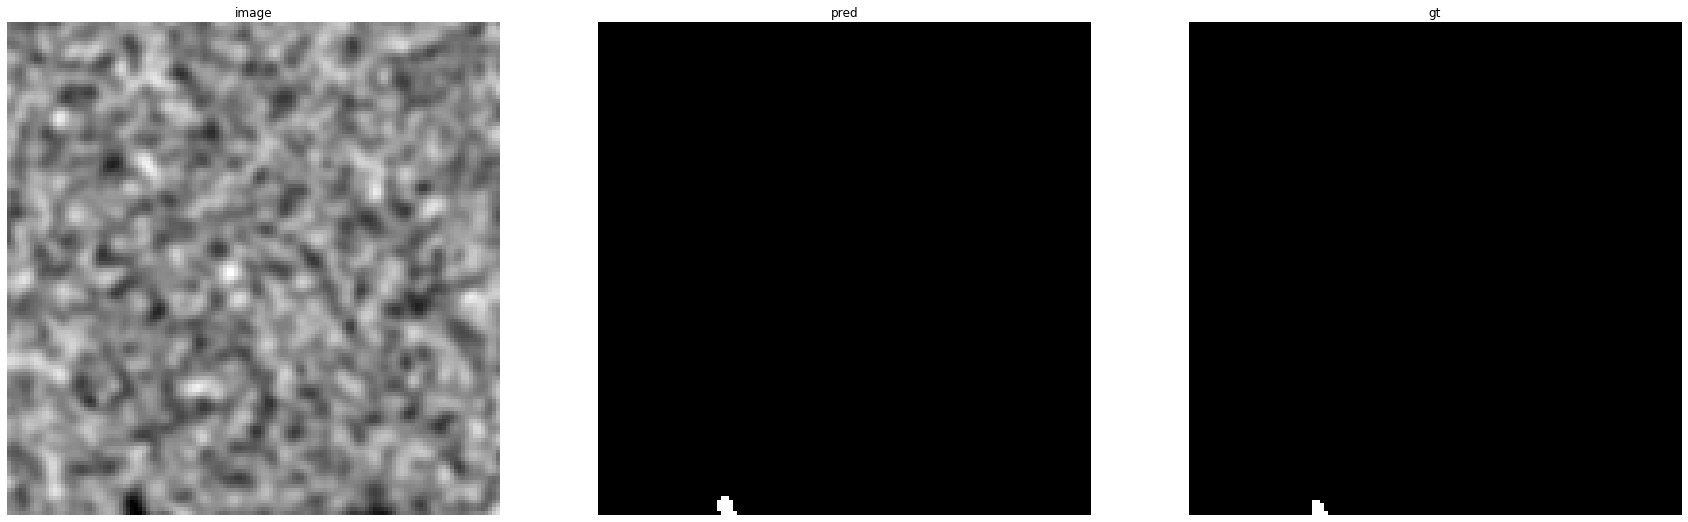

accuracy    : 0.9996337890625
precision   : 0.6666666666666666
recall      : 1.0
f1          : 0.8
pr_auc      : 0.9722222222222222
iou         : 0.6666666666666666


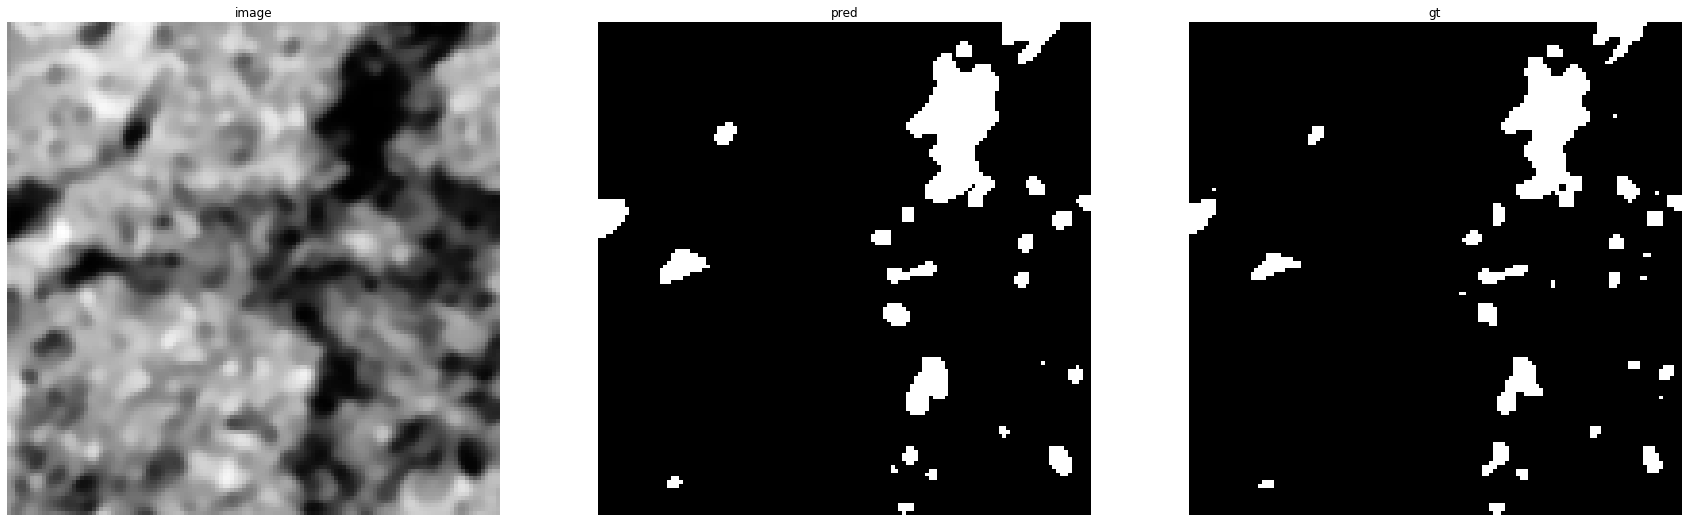

accuracy    : 0.9840087890625
precision   : 0.8365853658536585
recall      : 0.9440366972477064
f1          : 0.8870689655172415
pr_auc      : 0.9729766257049758
iou         : 0.7970565453137103


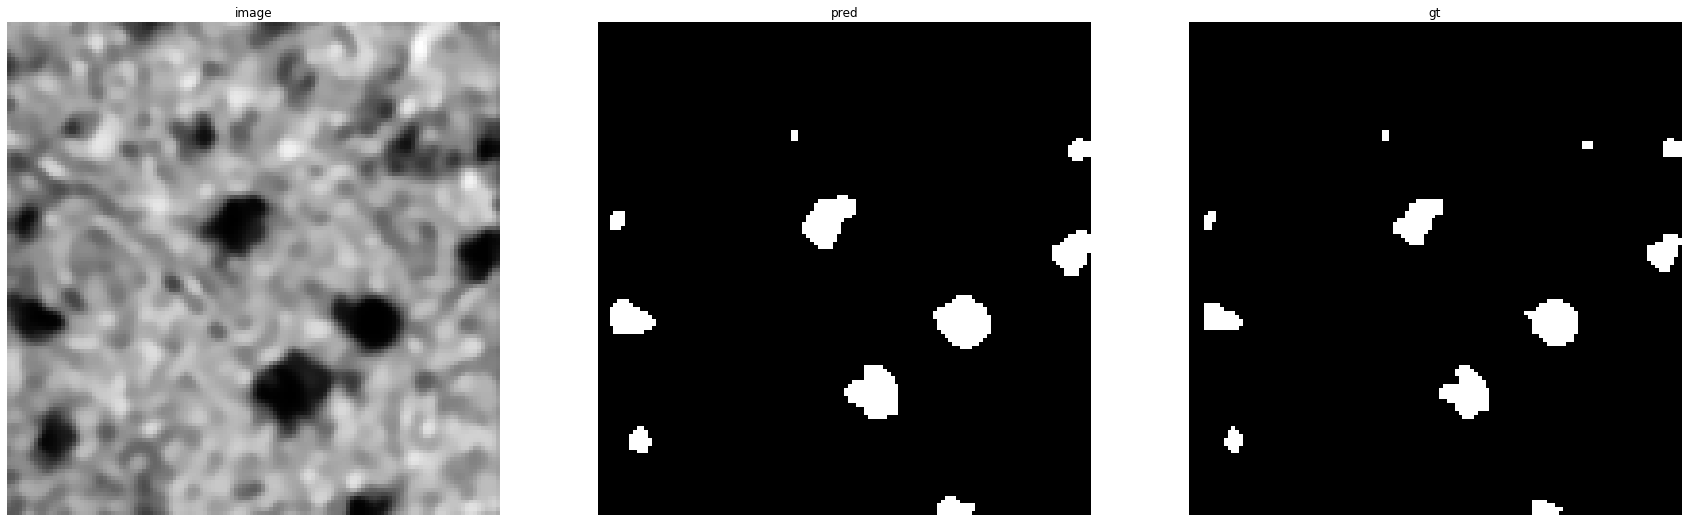

accuracy    : 0.98980712890625
precision   : 0.768451519536903
recall      : 0.9869888475836431
f1          : 0.8641171684296176
pr_auc      : 0.987169824445759
iou         : 0.7607449856733525


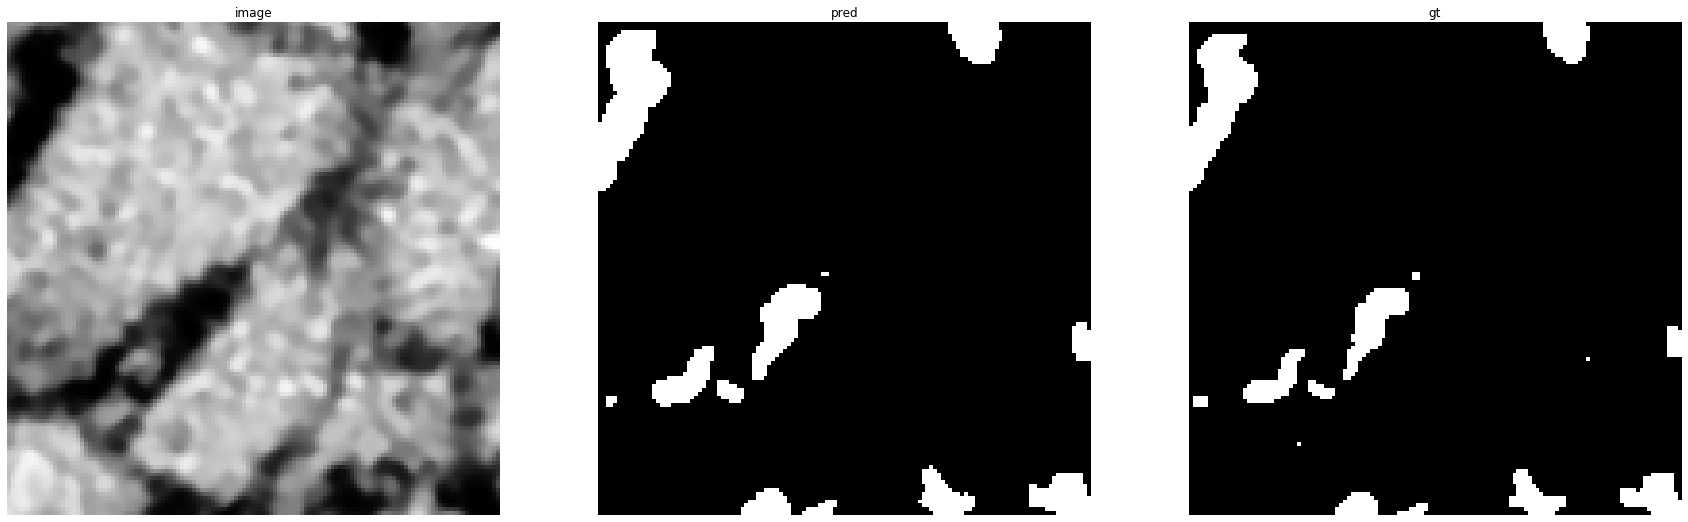

accuracy    : 0.98590087890625
precision   : 0.8360902255639098
recall      : 0.9884444444444445
f1          : 0.9059063136456212
pr_auc      : 0.9933353085964637
iou         : 0.8279970215934475


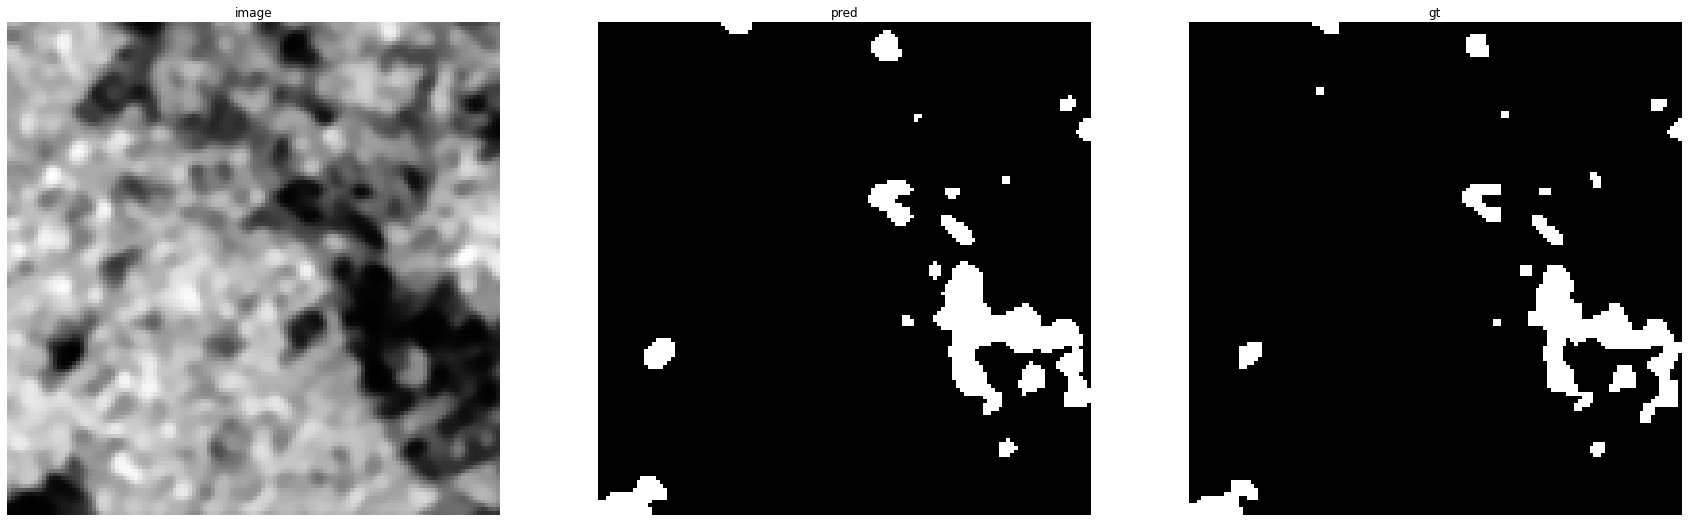

accuracy    : 0.985107421875
precision   : 0.8177737881508079
recall      : 0.9569327731092437
f1          : 0.8818973862536302
pr_auc      : 0.9786416730891273
iou         : 0.7887445887445887


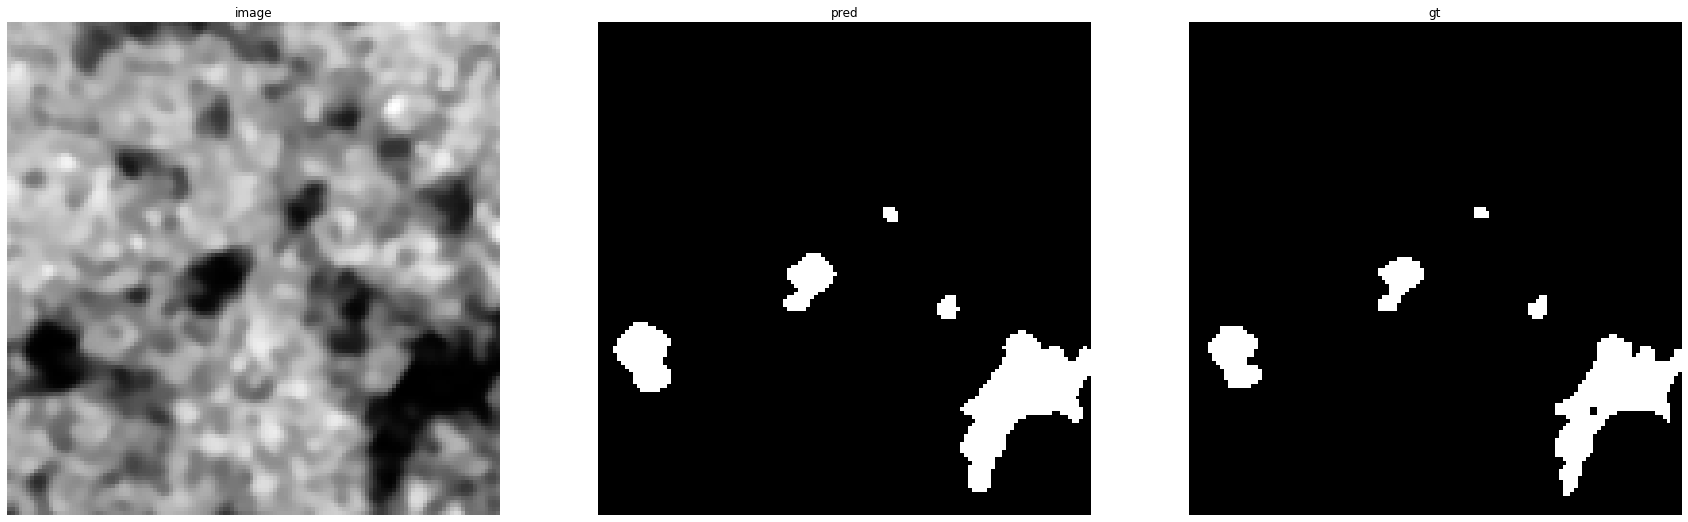

accuracy    : 0.990966796875
precision   : 0.8554455445544554
recall      : 0.9976905311778291
f1          : 0.9211087420042644
pr_auc      : 0.9961646039553543
iou         : 0.8537549407114624


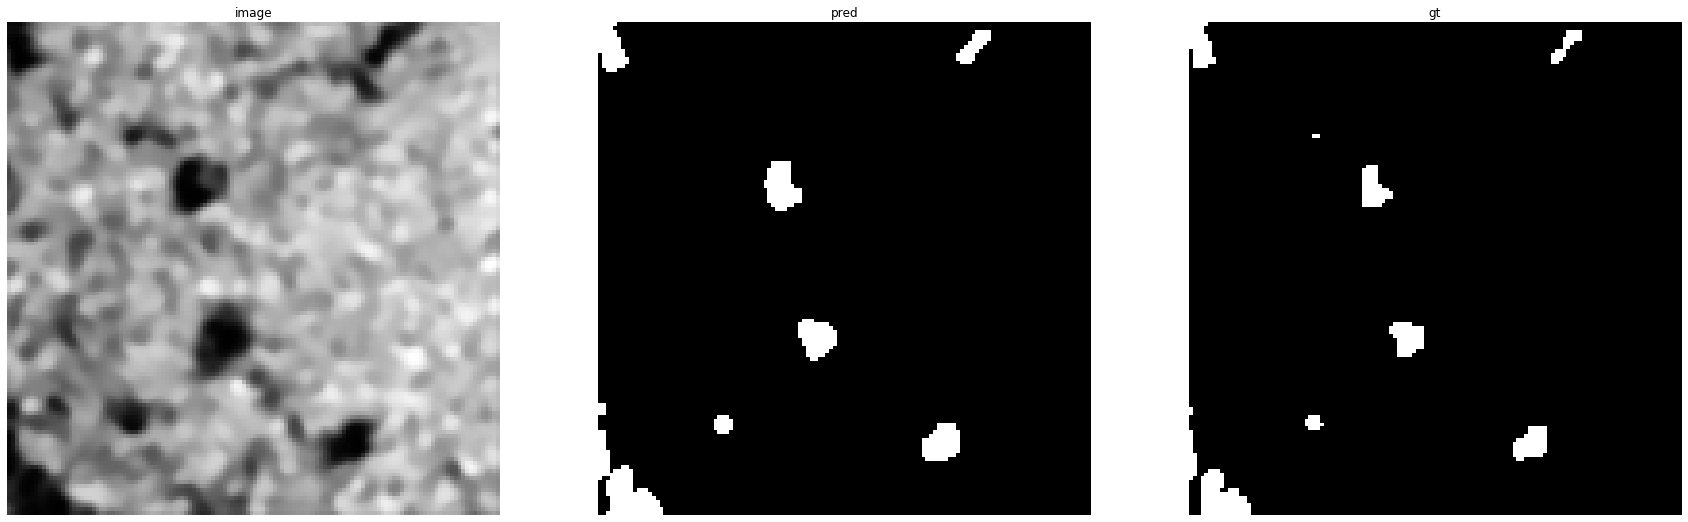

accuracy    : 0.9920654296875
precision   : 0.7638376383763837
recall      : 0.9951923076923077
f1          : 0.8643006263048018
pr_auc      : 0.9871365738779319
iou         : 0.7610294117647058


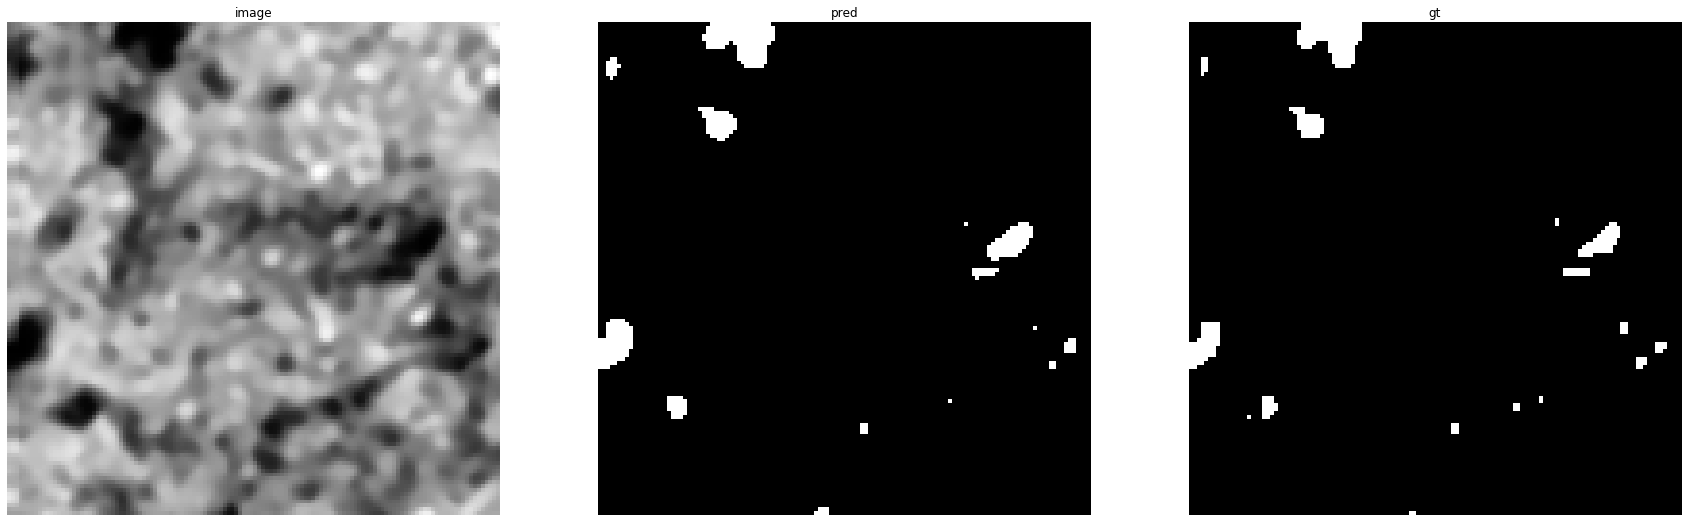

accuracy    : 0.99285888671875
precision   : 0.7847826086956522
recall      : 0.9525065963060686
f1          : 0.8605482717520858
pr_auc      : 0.9703059123169148
iou         : 0.7552301255230126


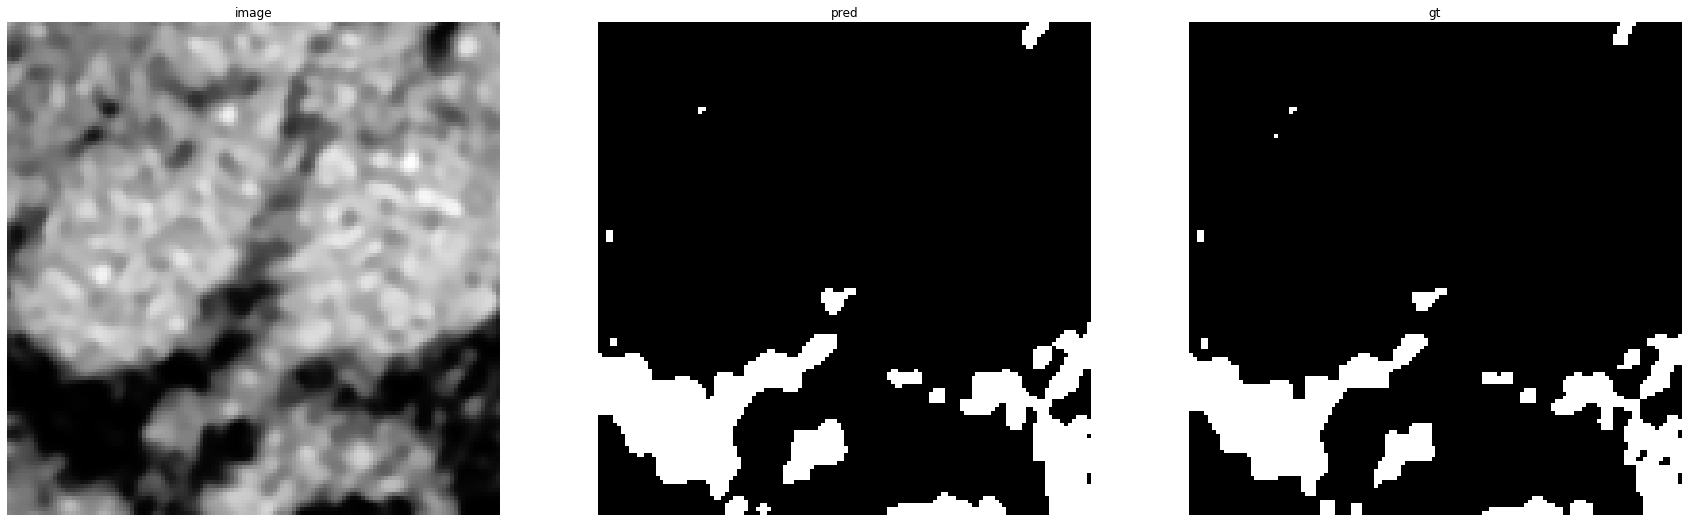

accuracy    : 0.97979736328125
precision   : 0.8563089357880557
recall      : 0.9942648592283628
f1          : 0.9201447527141134
pr_auc      : 0.993825089765578
iou         : 0.852100089365505


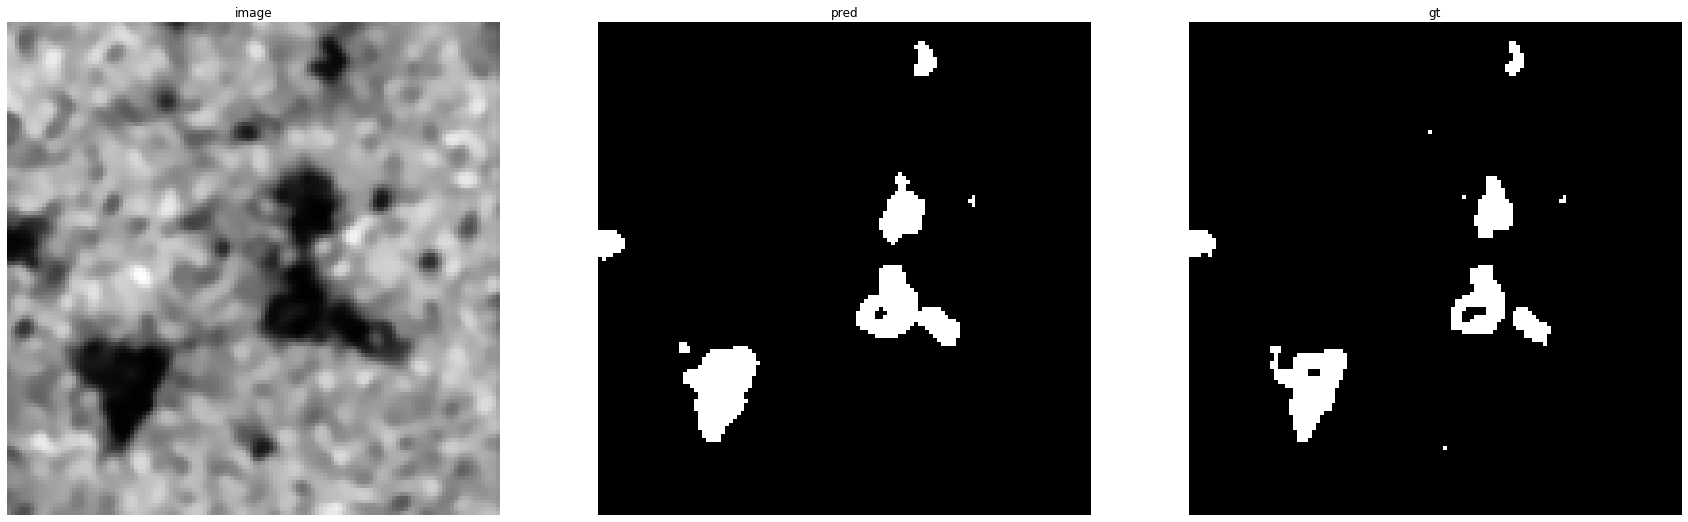

accuracy    : 0.9901123046875
precision   : 0.8163522012578617
recall      : 0.9759398496240601
f1          : 0.8890410958904109
pr_auc      : 0.9818377781453906
iou         : 0.8002466091245376


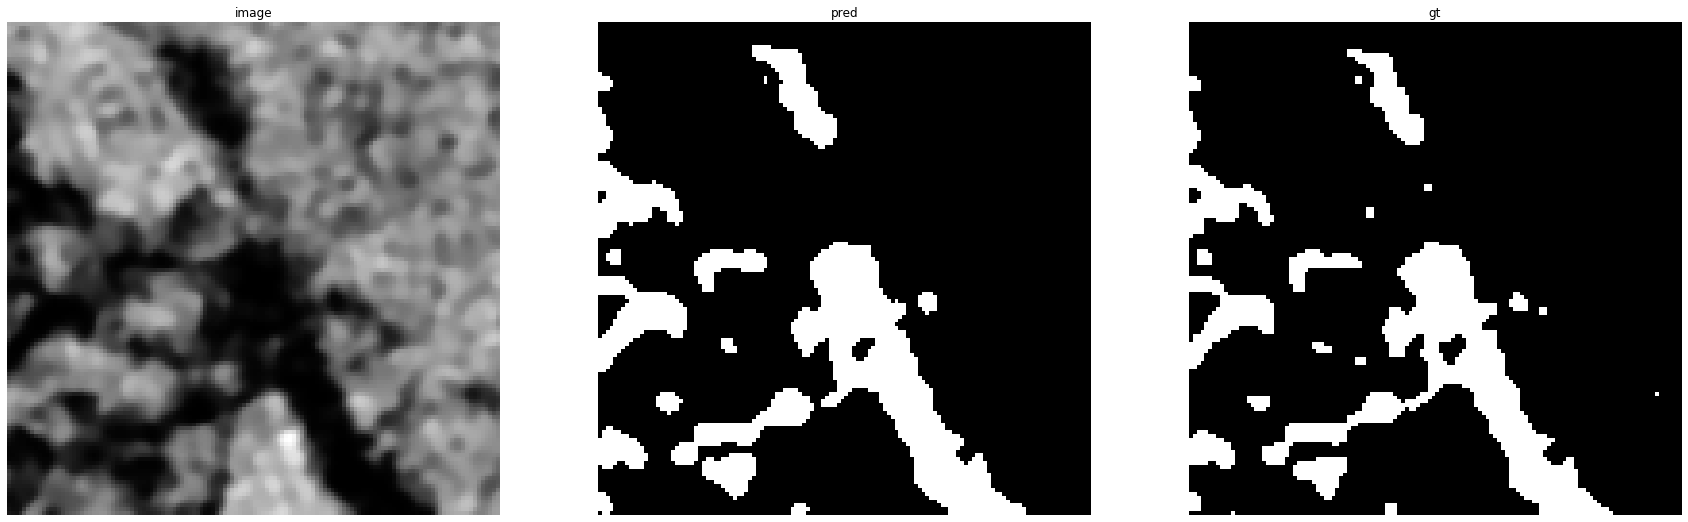

accuracy    : 0.97332763671875
precision   : 0.8618607954545454
recall      : 0.9806060606060606
f1          : 0.9174069174069174
pr_auc      : 0.9913861469320703
iou         : 0.8474162011173184


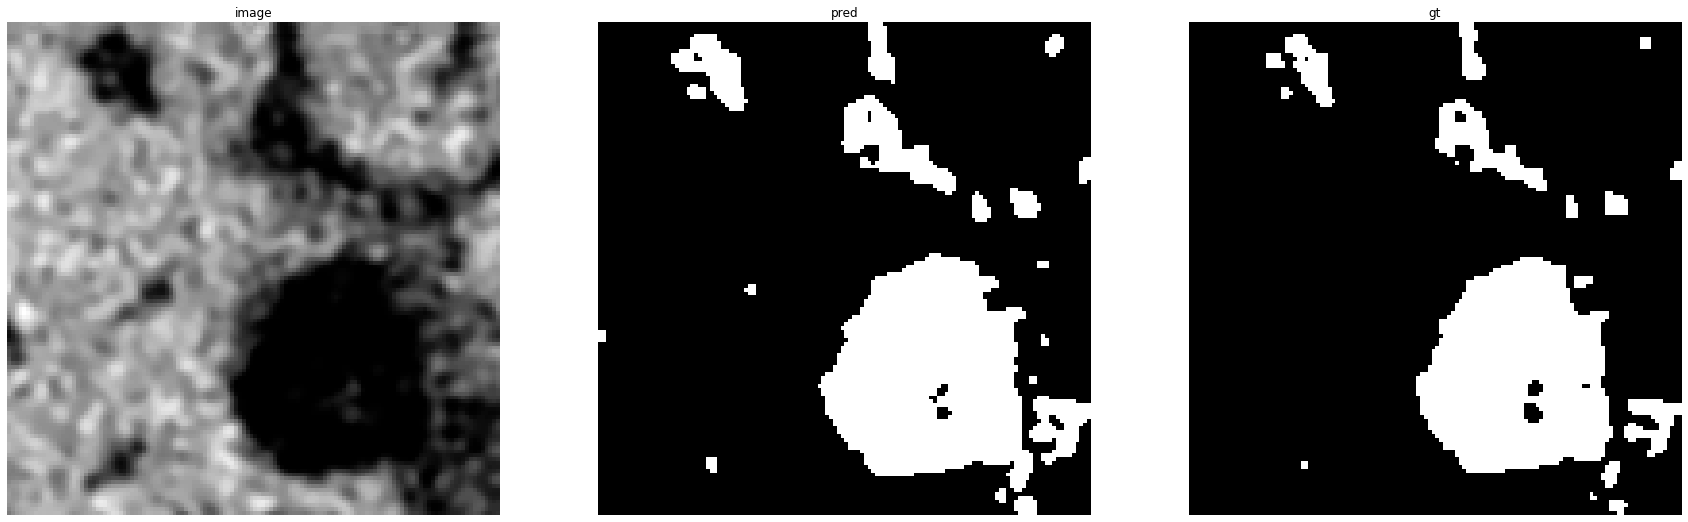

accuracy    : 0.96868896484375
precision   : 0.8473907766990292
recall      : 0.9964323938637174
f1          : 0.9158878504672898
pr_auc      : 0.9965221748794548
iou         : 0.8448275862068966


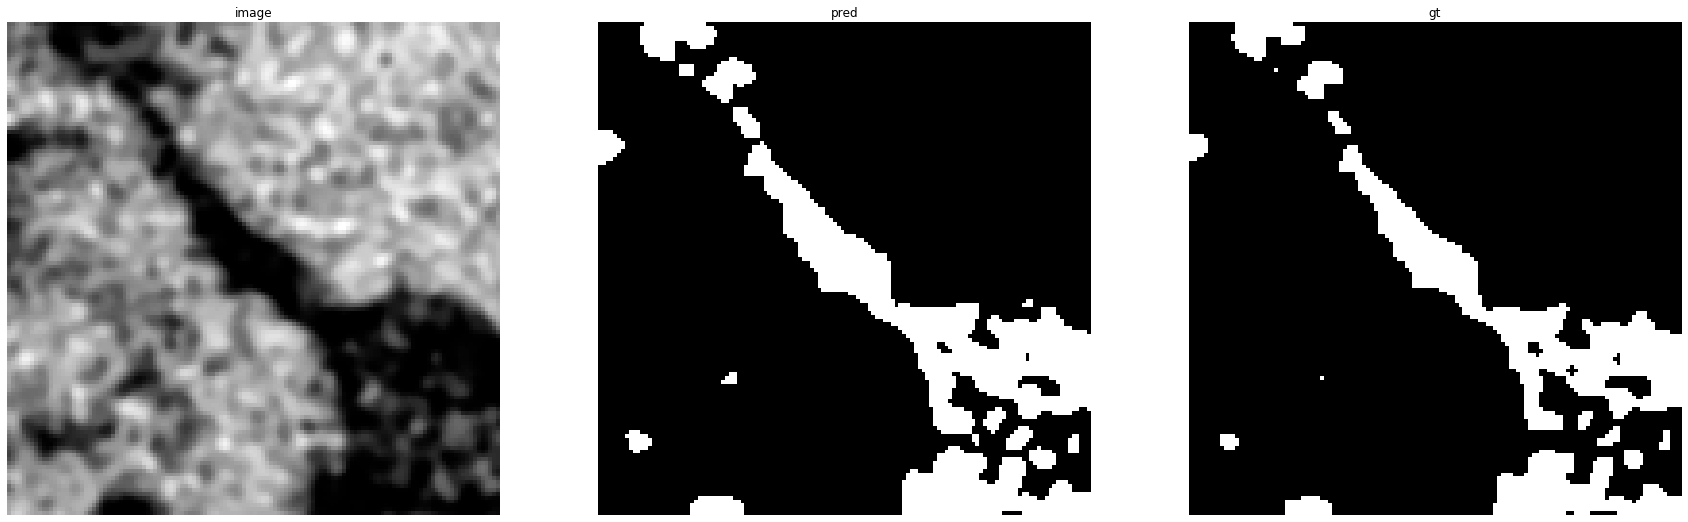

accuracy    : 0.97265625
precision   : 0.8347536124490552
recall      : 0.9991130820399113
f1          : 0.9095680258377069
pr_auc      : 0.9971104539003783
iou         : 0.8341355053683821


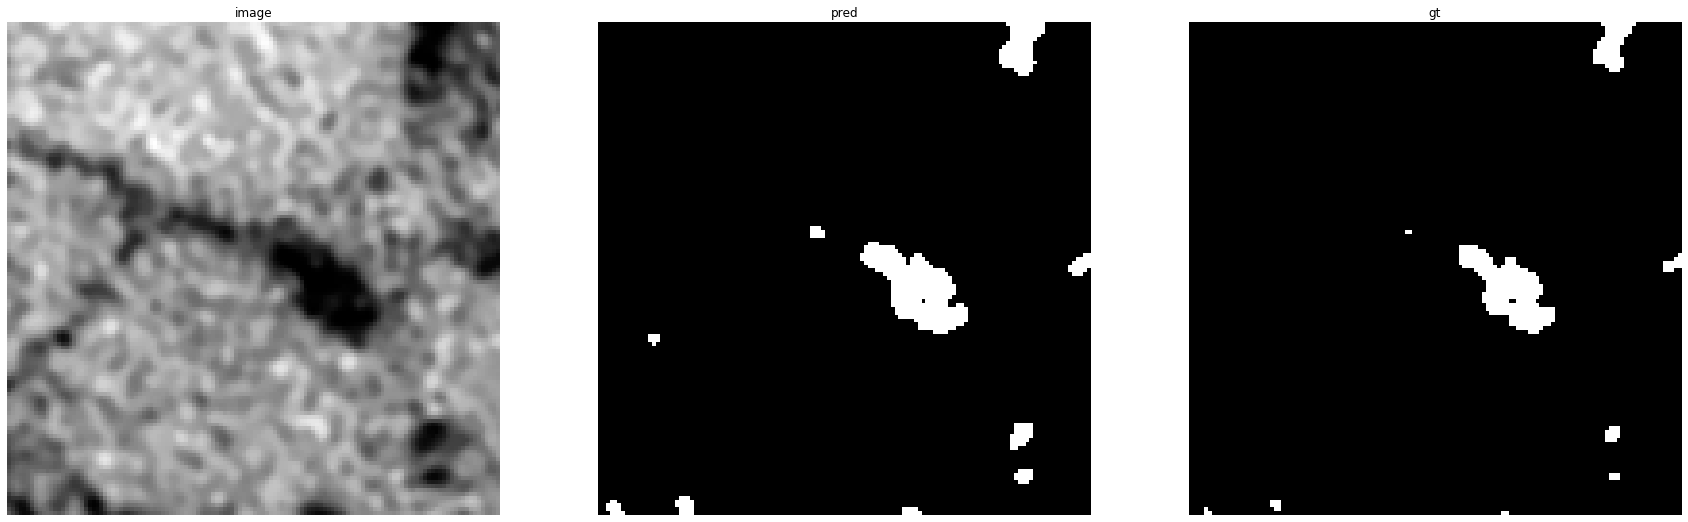

accuracy    : 0.98956298828125
precision   : 0.7106598984771574
recall      : 1.0
f1          : 0.8308605341246291
pr_auc      : 0.9919508973908606
iou         : 0.7106598984771574


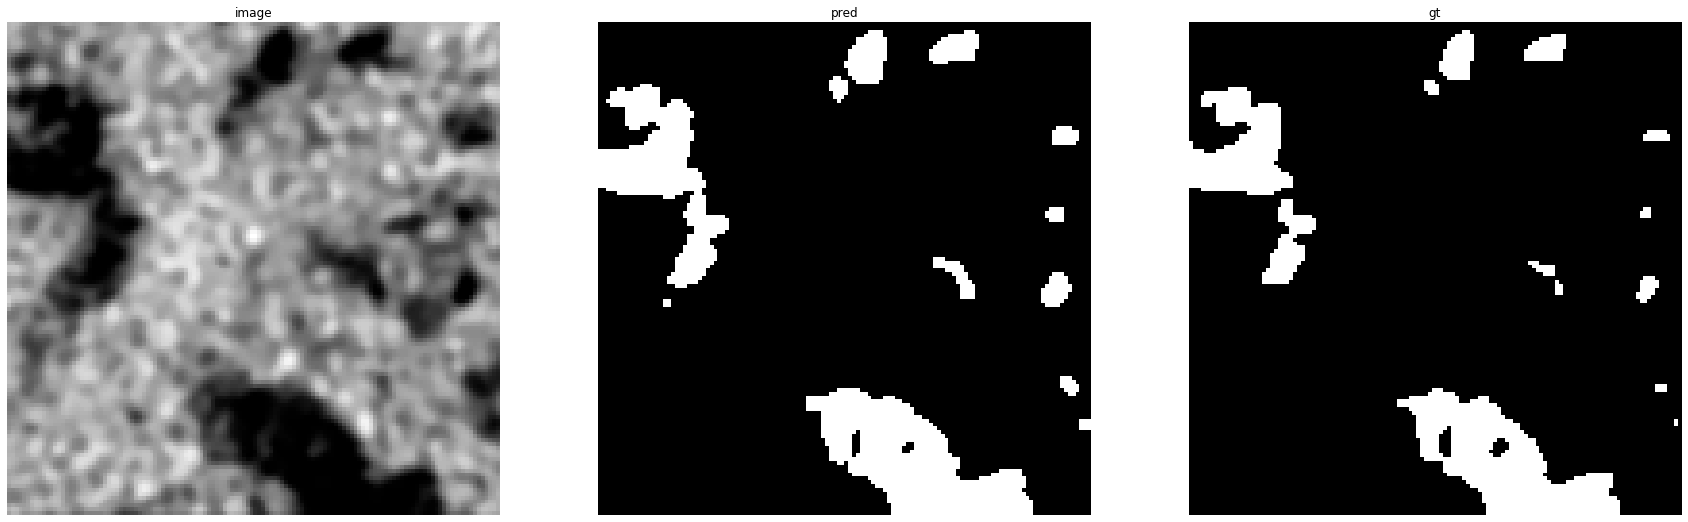

accuracy    : 0.97784423828125
precision   : 0.830028328611898
recall      : 0.9982964224872232
f1          : 0.9064191802010827
pr_auc      : 0.9960986820990532
iou         : 0.8288543140028288


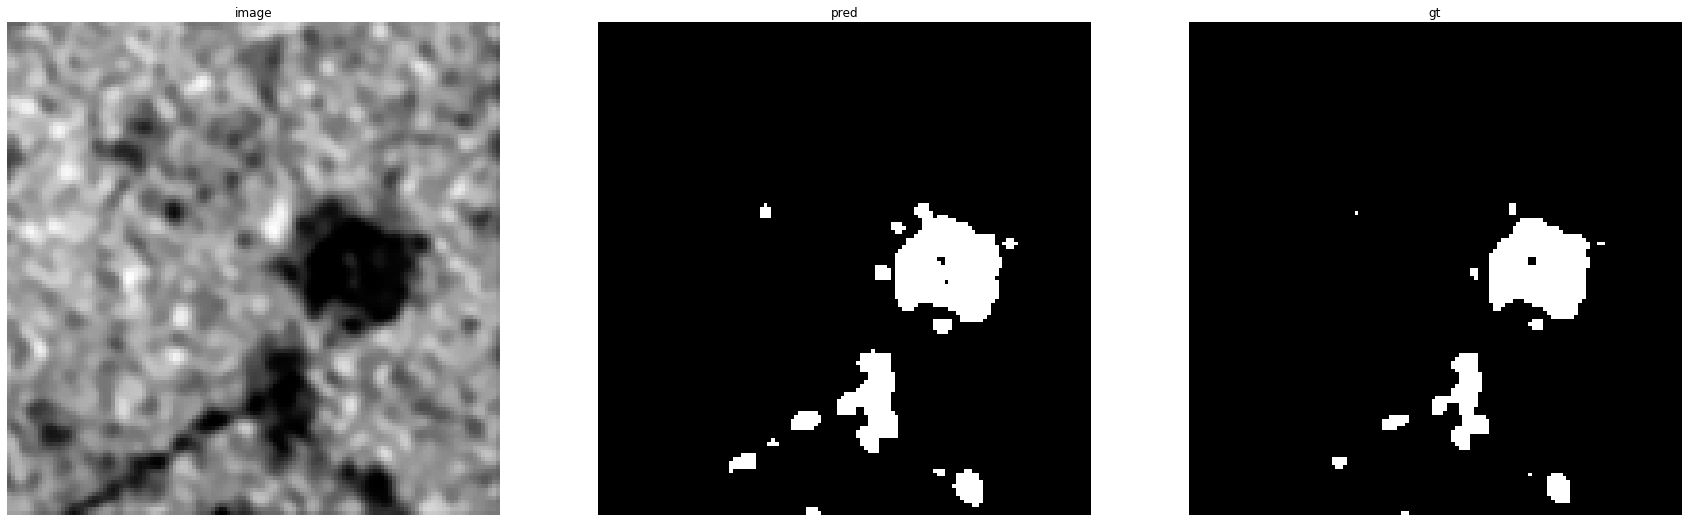

accuracy    : 0.98590087890625
precision   : 0.773938795656466
recall      : 0.9974554707379135
f1          : 0.8715953307392997
pr_auc      : 0.9938369231926907
iou         : 0.7724137931034483


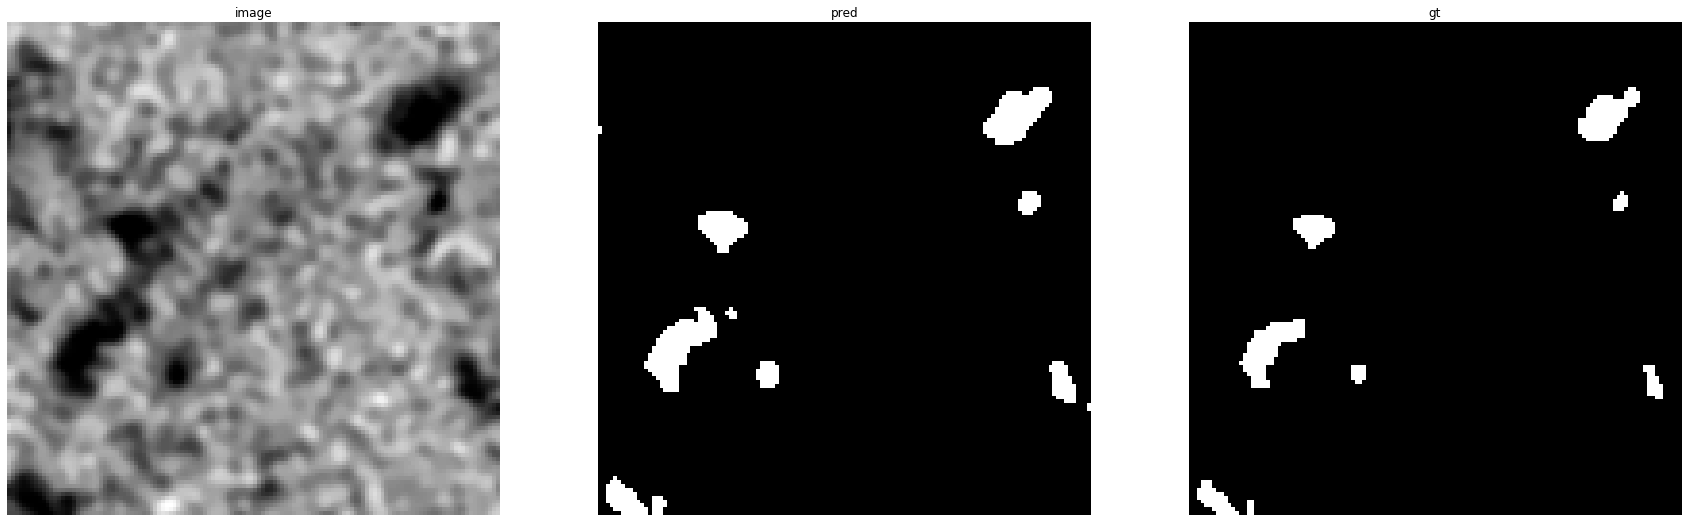

accuracy    : 0.987548828125
precision   : 0.6913767019667171
recall      : 1.0
f1          : 0.8175313059033988
pr_auc      : 0.9929867051503508
iou         : 0.6913767019667171


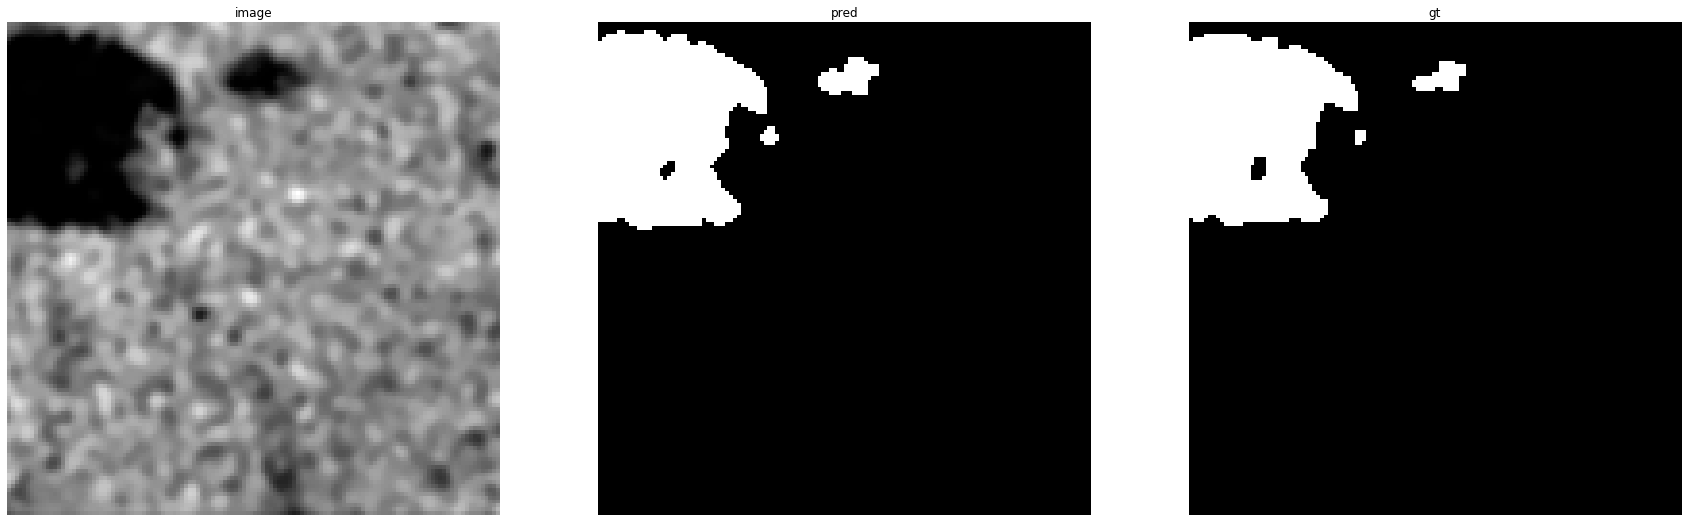

accuracy    : 0.9921875
precision   : 0.9305480195333695
recall      : 1.0
f1          : 0.9640247329960652
pr_auc      : 0.999577149203972
iou         : 0.9305480195333695


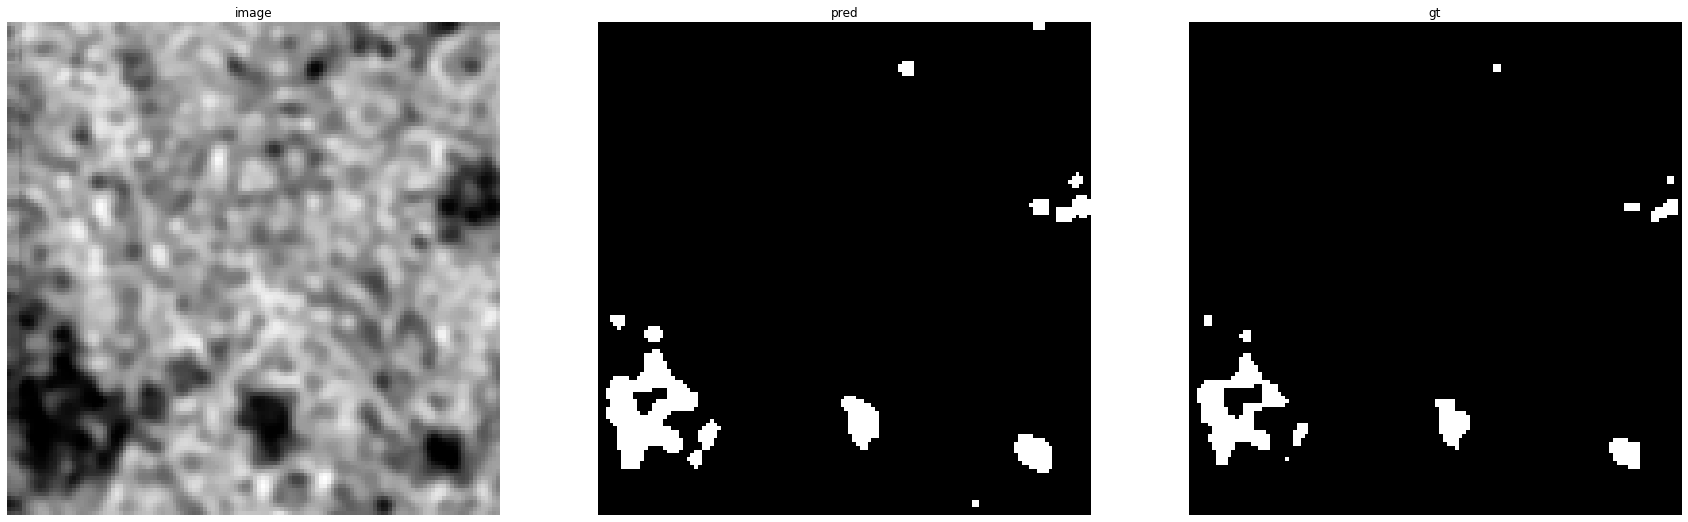

accuracy    : 0.9864501953125
precision   : 0.6865248226950355
recall      : 0.9979381443298969
f1          : 0.8134453781512605
pr_auc      : 0.9792354328144479
iou         : 0.6855524079320113


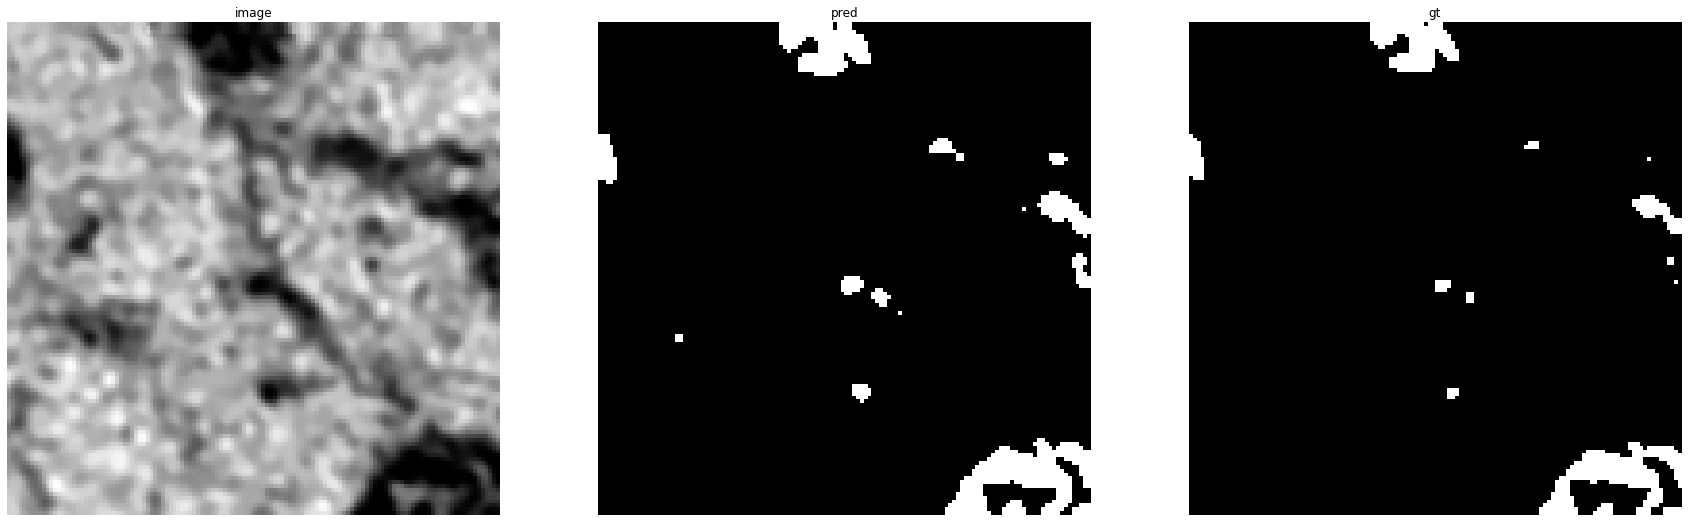

accuracy    : 0.98529052734375
precision   : 0.7350993377483444
recall      : 0.9985007496251874
f1          : 0.8467895740623013
pr_auc      : 0.9895140339252223
iou         : 0.7342888643880926


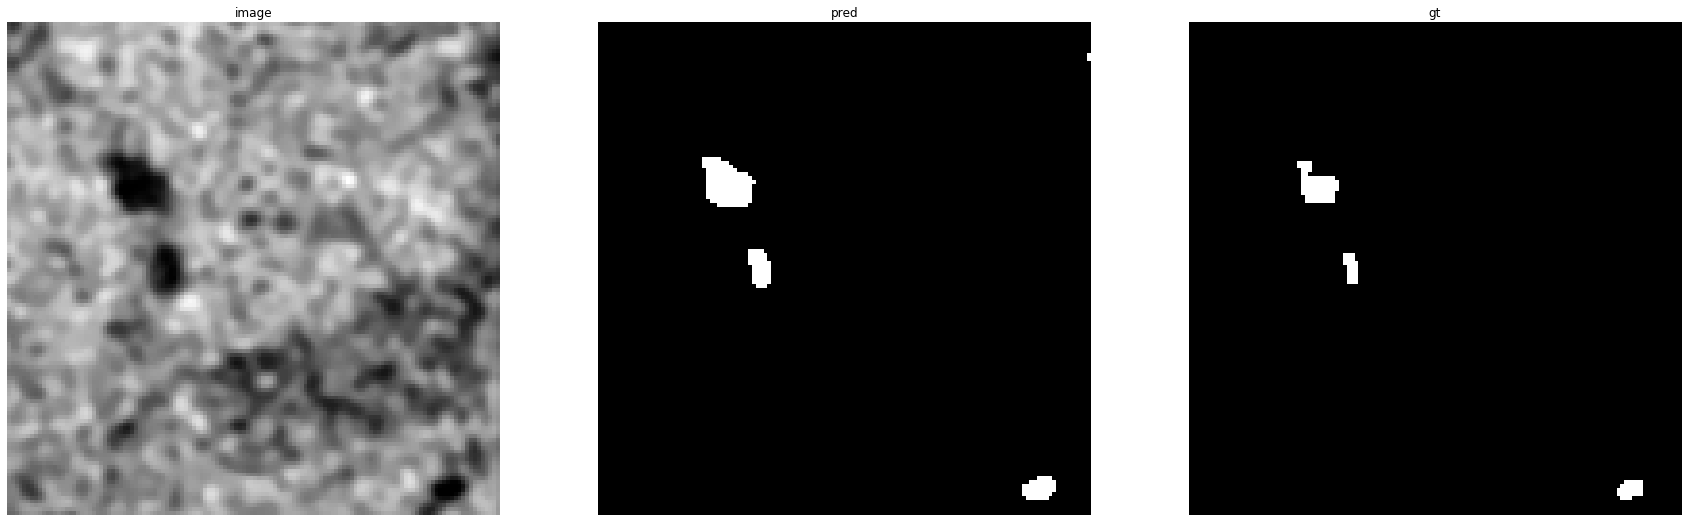

accuracy    : 0.9942626953125
precision   : 0.5803571428571429
recall      : 1.0
f1          : 0.7344632768361583
pr_auc      : 0.984293155913494
iou         : 0.5803571428571429


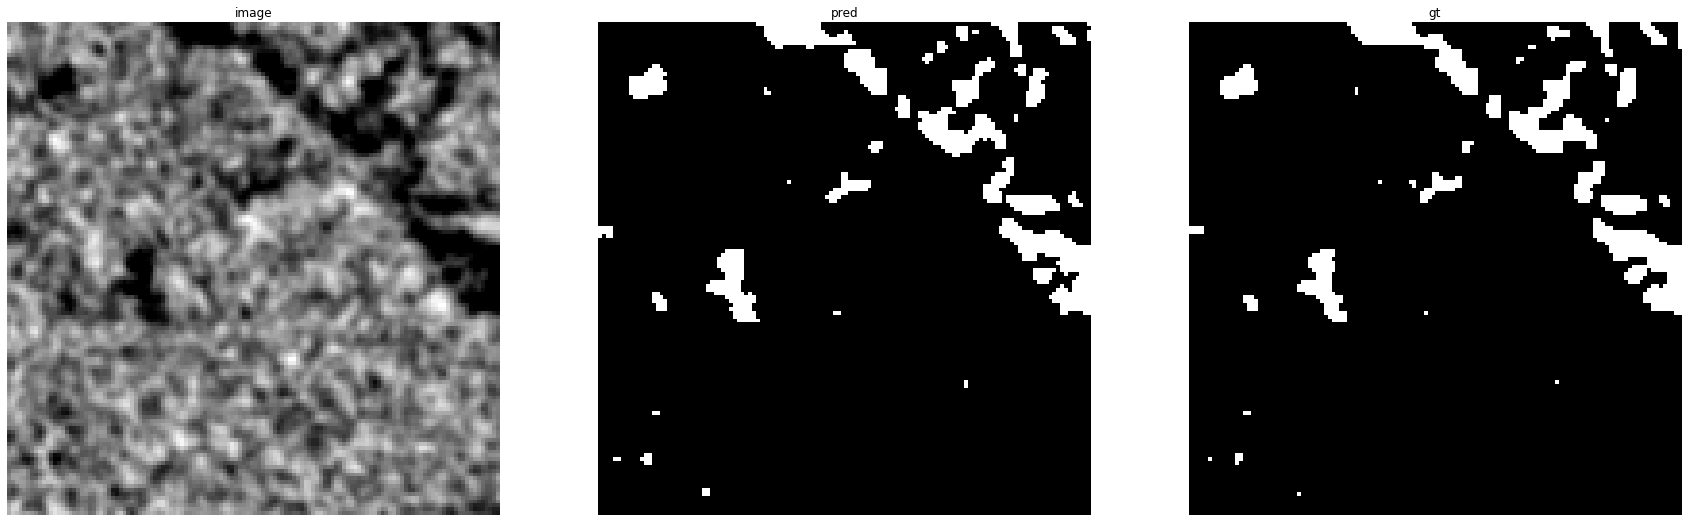

accuracy    : 0.9903564453125
precision   : 0.9290953545232273
recall      : 0.9413707679603633
f1          : 0.9351927809680065
pr_auc      : 0.9881354337424891
iou         : 0.8782742681047766


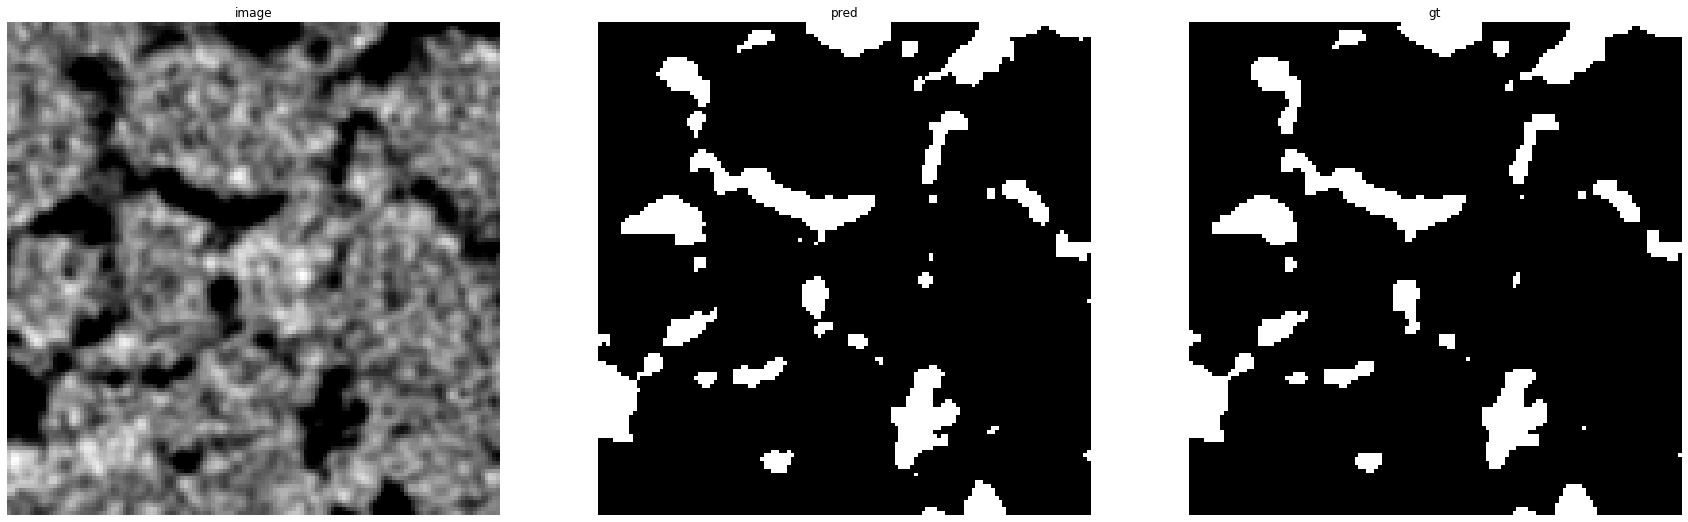

accuracy    : 0.989013671875
precision   : 0.9427498826841858
recall      : 0.9719400096758587
f1          : 0.9571224392567889
pr_auc      : 0.9954416736680783
iou         : 0.9177706715395157


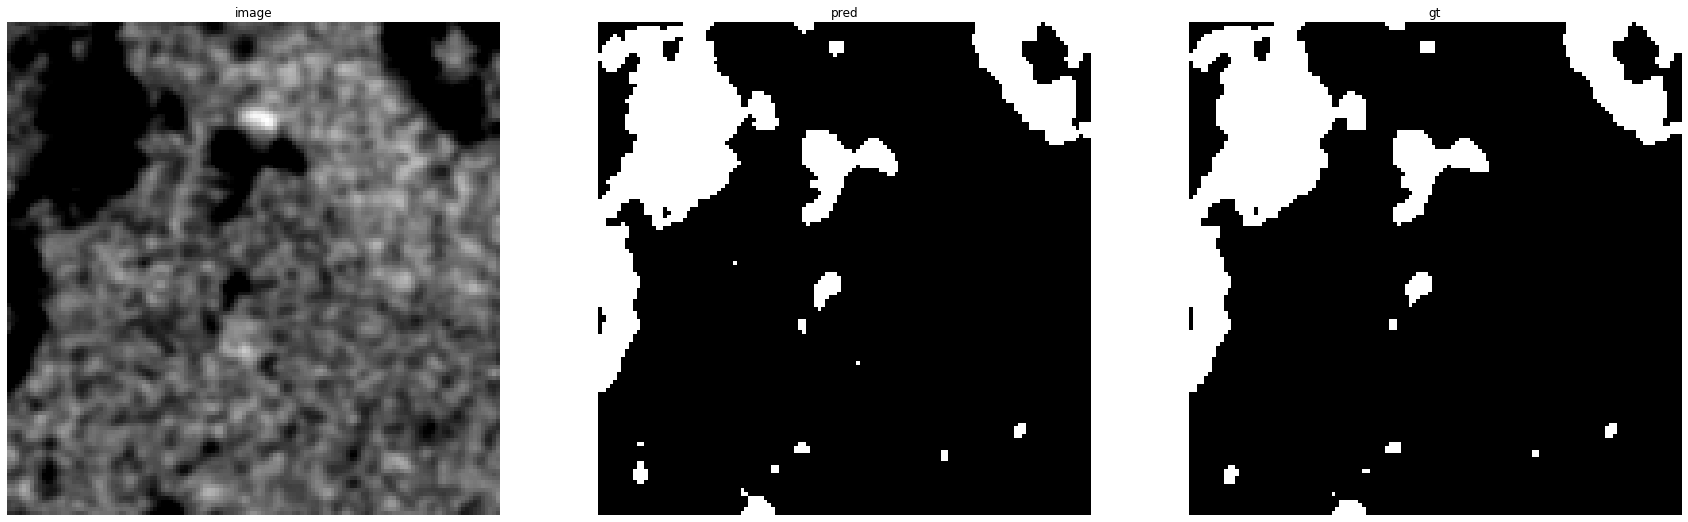

accuracy    : 0.9932861328125
precision   : 0.9753495217071376
recall      : 0.9840386043058649
f1          : 0.9796747967479675
pr_auc      : 0.9988599395642433
iou         : 0.9601593625498008


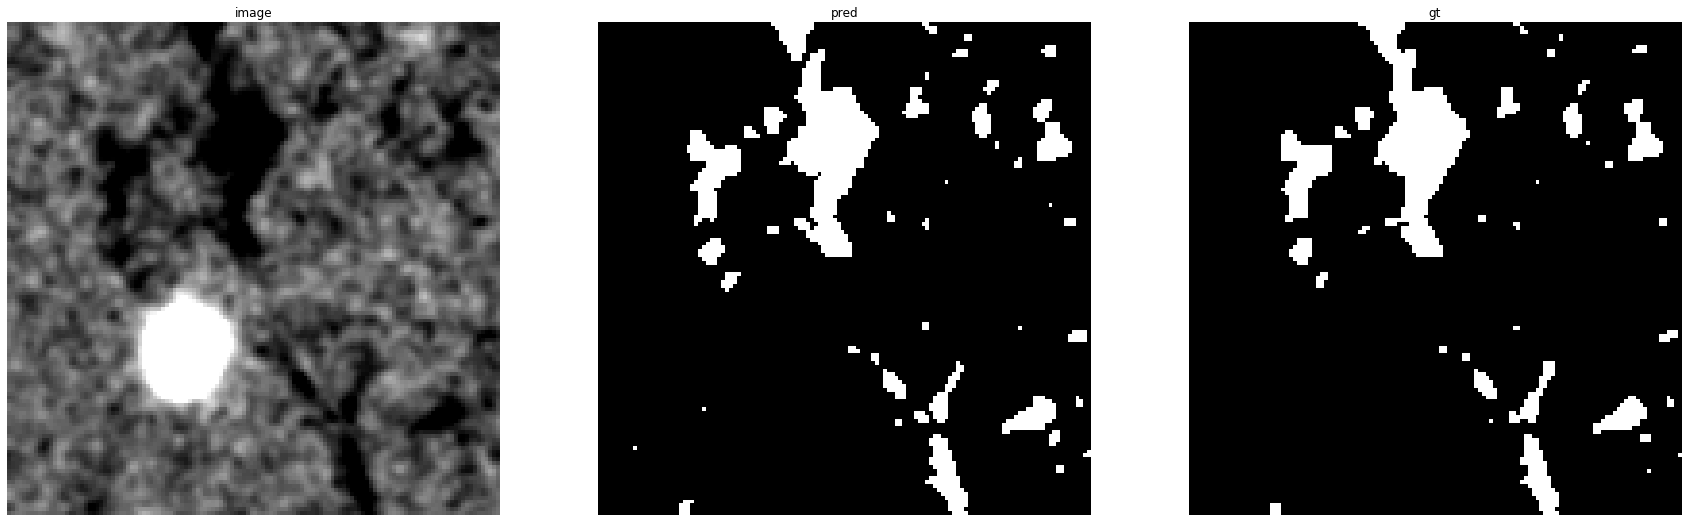

accuracy    : 0.99041748046875
precision   : 0.9247874427730542
recall      : 0.9711538461538461
f1          : 0.9474036850921272
pr_auc      : 0.9937249604091256
iou         : 0.9000636537237429


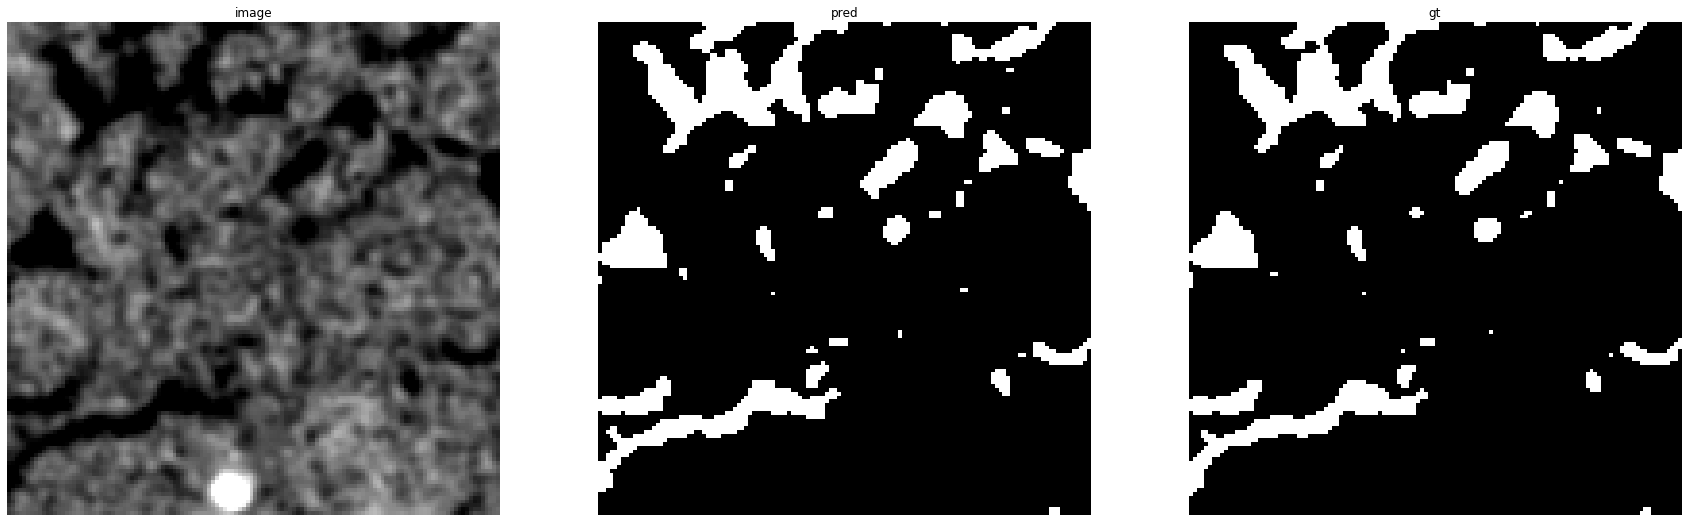

accuracy    : 0.98956298828125
precision   : 0.9430463576158941
recall      : 0.9807162534435262
f1          : 0.9615124915597569
pr_auc      : 0.9966432530479533
iou         : 0.9258777633289987


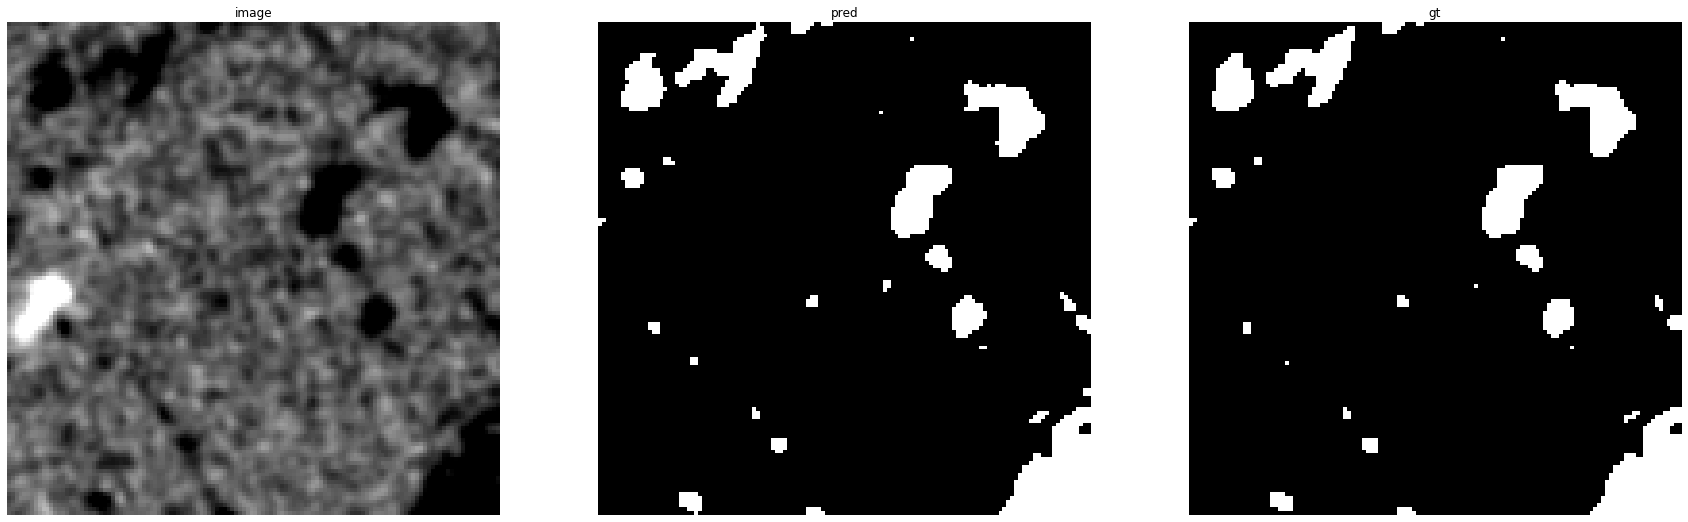

accuracy    : 0.9949951171875
precision   : 0.9612948627726953
recall      : 0.9806173725771715
f1          : 0.9708599857853588
pr_auc      : 0.9973512525049377
iou         : 0.9433701657458563


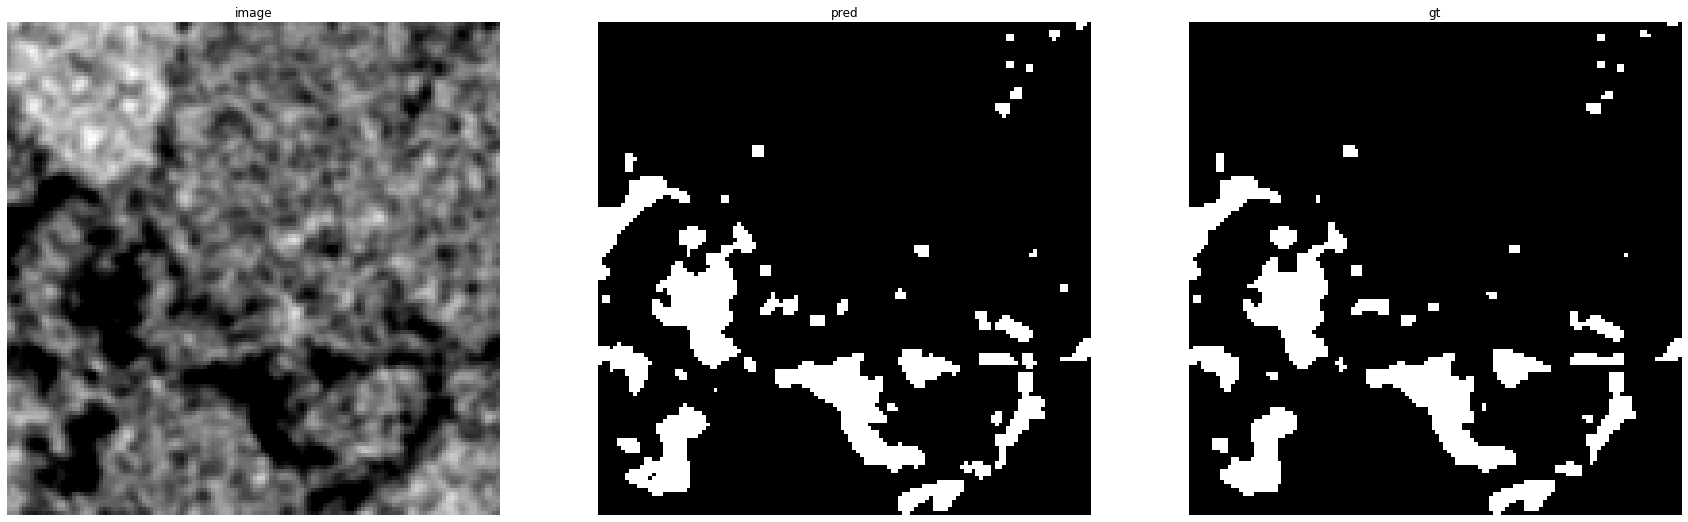

accuracy    : 0.98895263671875
precision   : 0.9383495145631068
recall      : 0.9728233517866129
f1          : 0.9552755127254756
pr_auc      : 0.9948410603562848
iou         : 0.9143803216650899


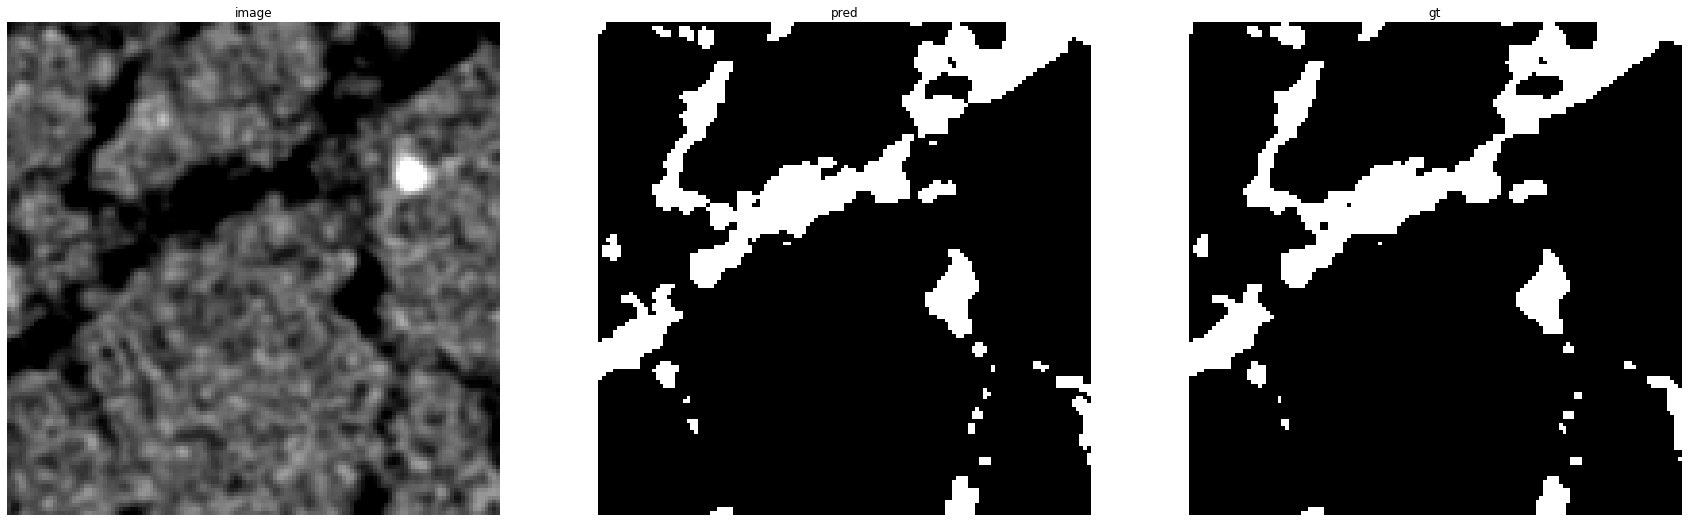

accuracy    : 0.98876953125
precision   : 0.9618506493506493
recall      : 0.9634146341463414
f1          : 0.9626320064987814
pr_auc      : 0.9958371326140869
iou         : 0.9279561472200469


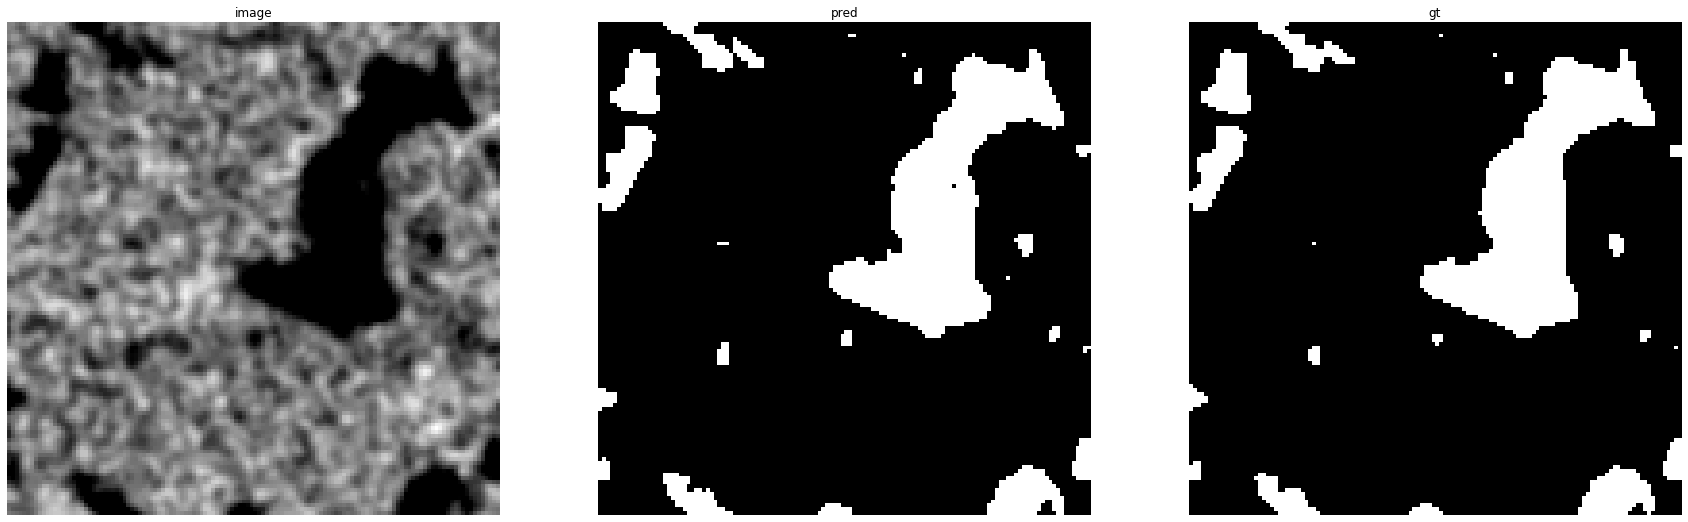

accuracy    : 0.9931640625
precision   : 0.9696279422930904
recall      : 0.9876256767208044
f1          : 0.978544061302682
pr_auc      : 0.9990073089170924
iou         : 0.9579894973743436


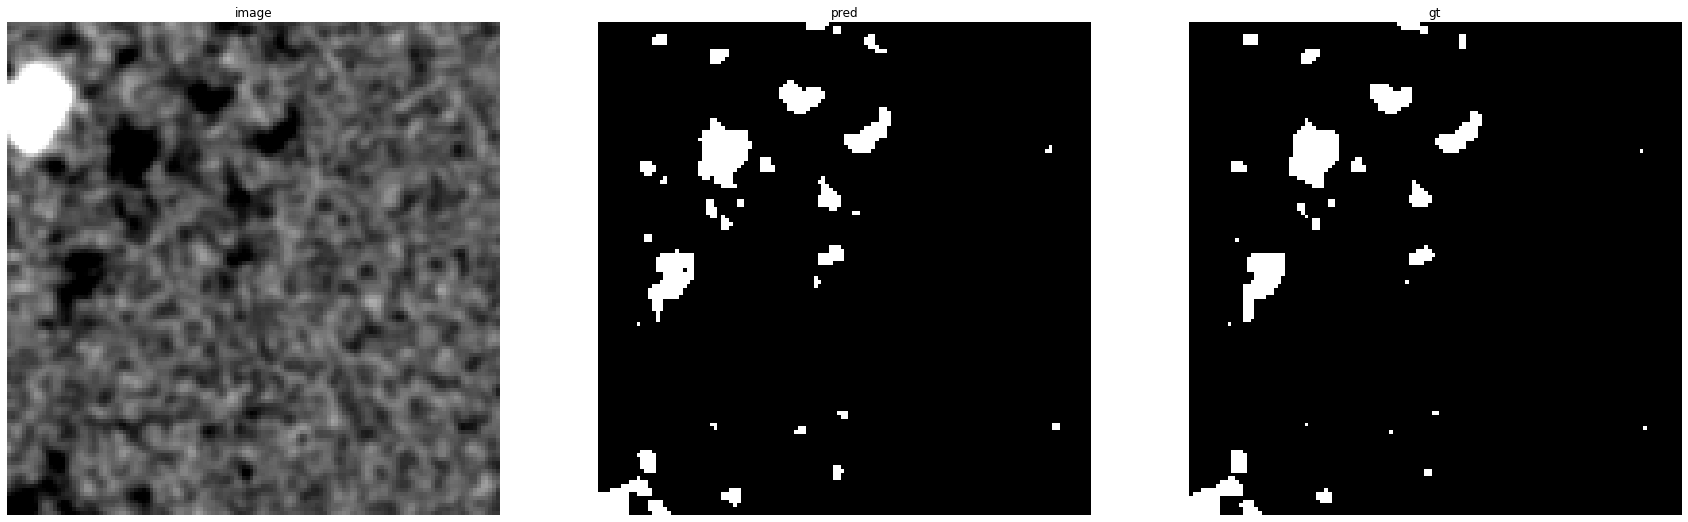

accuracy    : 0.9927978515625
precision   : 0.8717277486910995
recall      : 0.9708454810495627
f1          : 0.9186206896551724
pr_auc      : 0.989739066072745
iou         : 0.8494897959183674


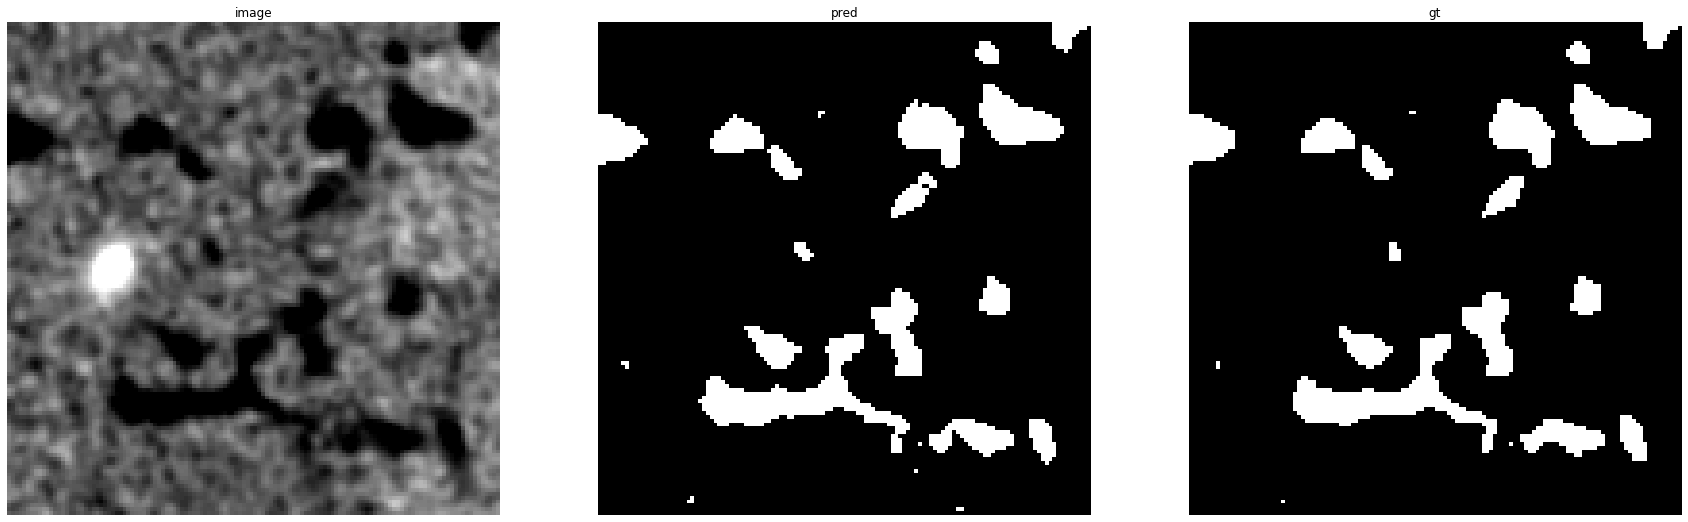

accuracy    : 0.9925537109375
precision   : 0.9549295774647887
recall      : 0.9758203799654577
f1          : 0.9652619589977222
pr_auc      : 0.9970679124772233
iou         : 0.9328563566318107


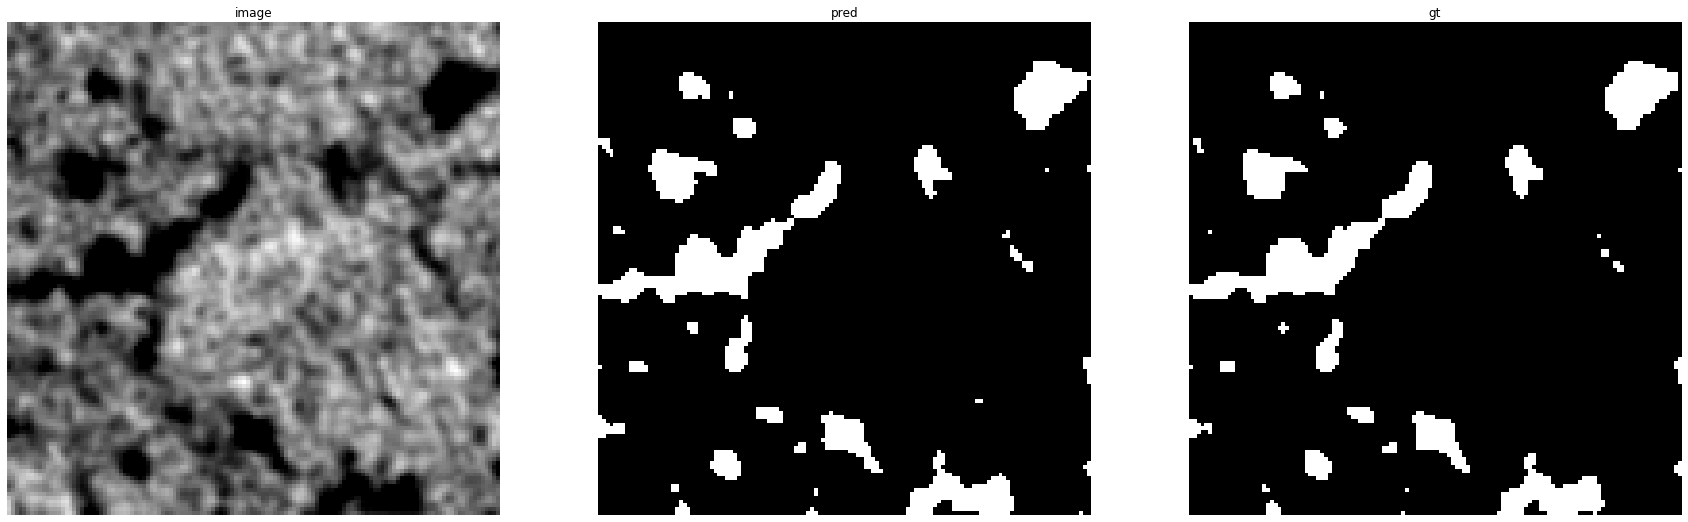

accuracy    : 0.9910888671875
precision   : 0.937873357228196
recall      : 0.9739454094292804
f1          : 0.9555690809494827
pr_auc      : 0.9960265968076779
iou         : 0.914918414918415


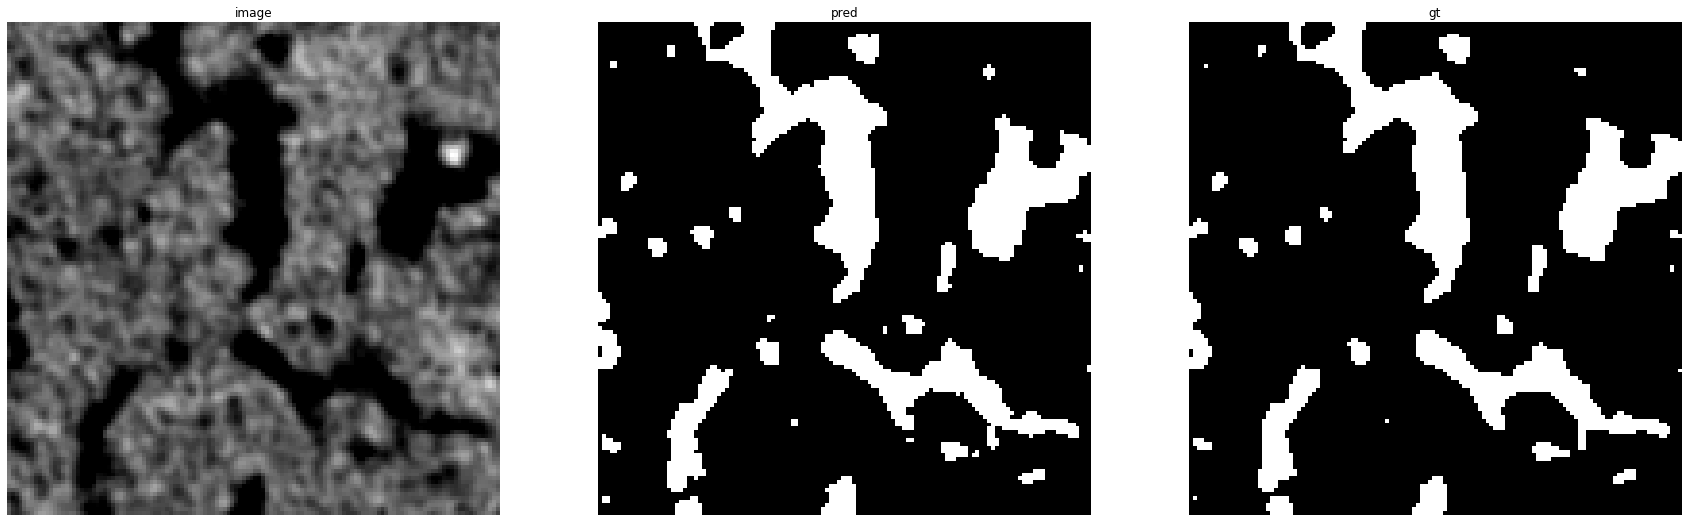

accuracy    : 0.99066162109375
precision   : 0.9620040349697377
recall      : 0.9862116511547742
f1          : 0.9739574468085106
pr_auc      : 0.9978668501994697
iou         : 0.9492368944923689


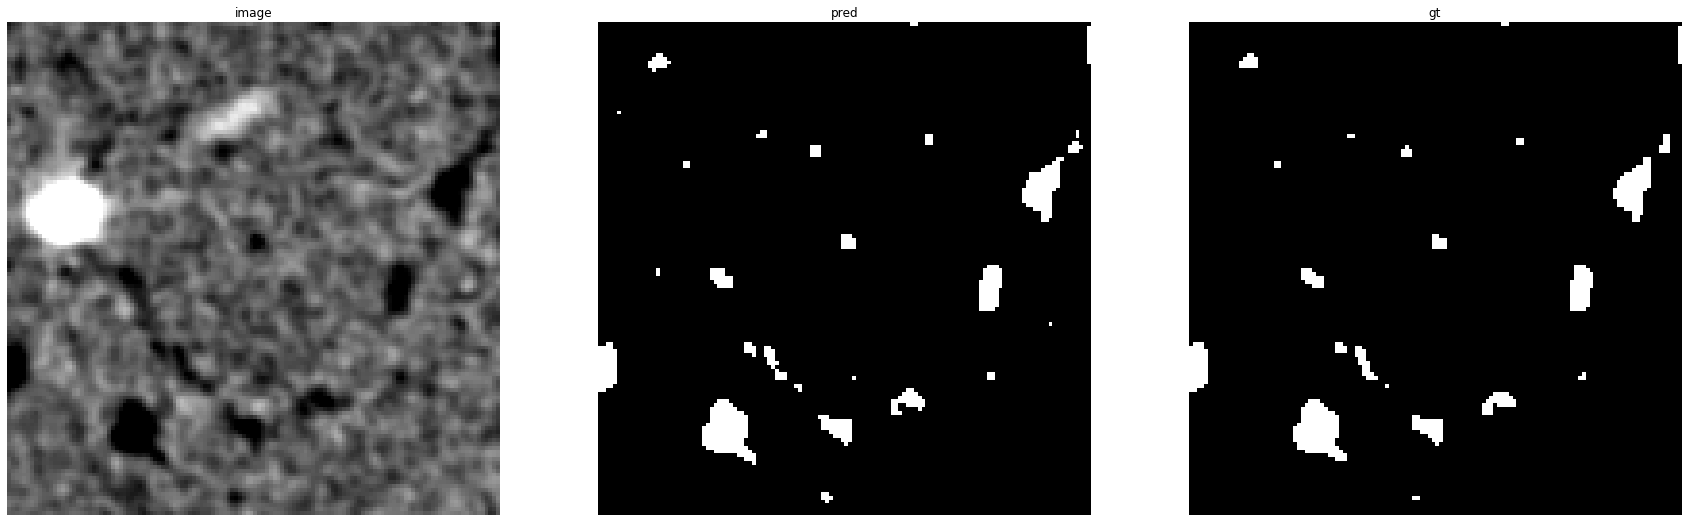

accuracy    : 0.99676513671875
precision   : 0.9283276450511946
recall      : 0.9801801801801802
f1          : 0.953549517966696
pr_auc      : 0.9950511245440038
iou         : 0.9112227805695142


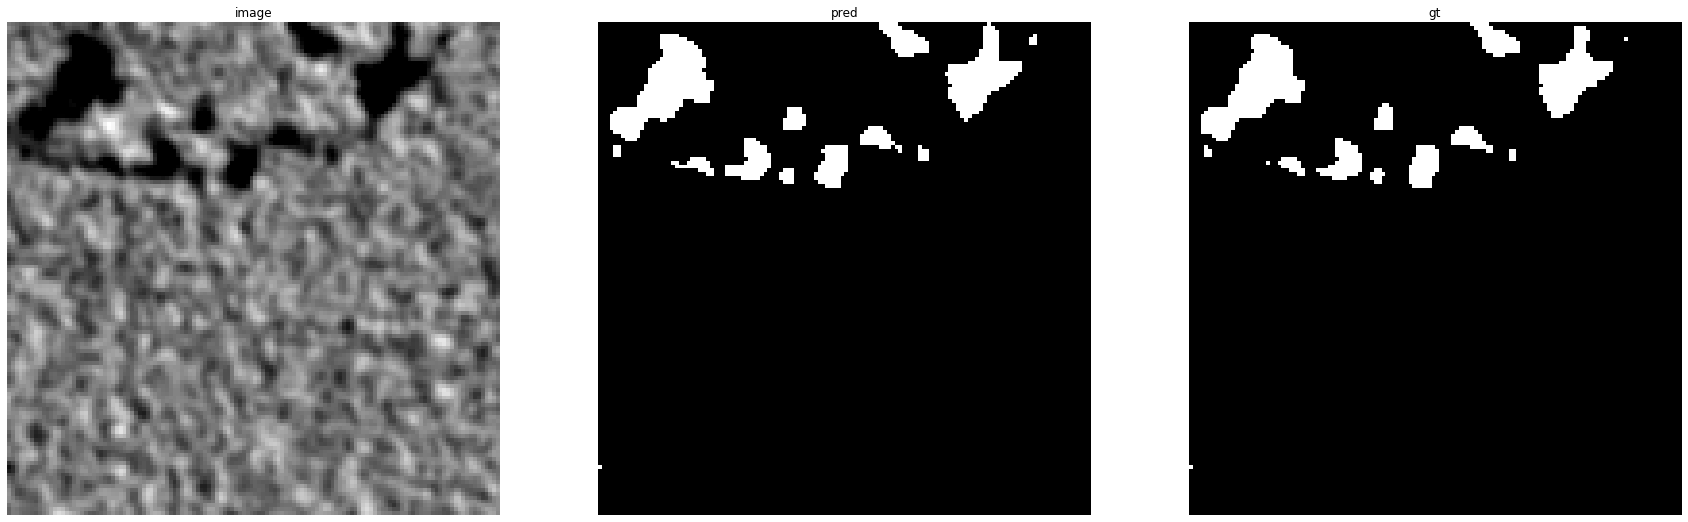

accuracy    : 0.99603271484375
precision   : 0.942578548212351
recall      : 0.9863945578231292
f1          : 0.96398891966759
pr_auc      : 0.9973378935768624
iou         : 0.93048128342246


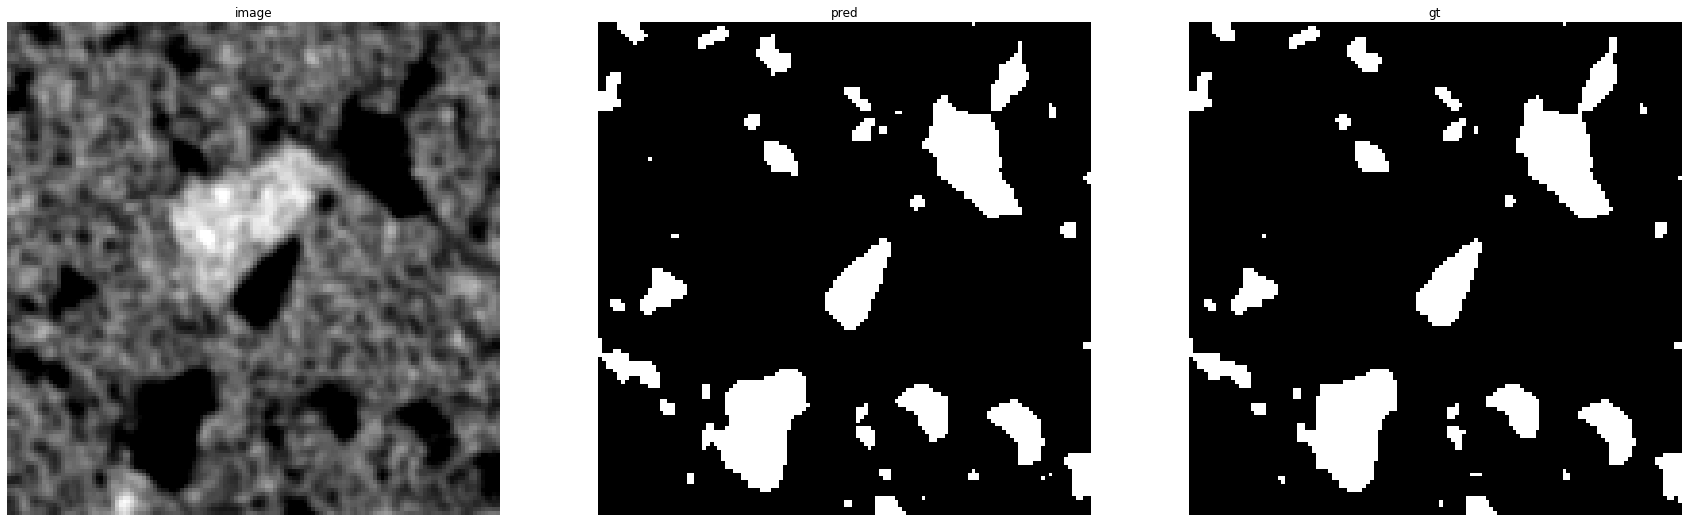

accuracy    : 0.9908447265625
precision   : 0.9436107321509777
recall      : 0.9876249405045217
f1          : 0.9651162790697675
pr_auc      : 0.9971626193357429
iou         : 0.9325842696629213


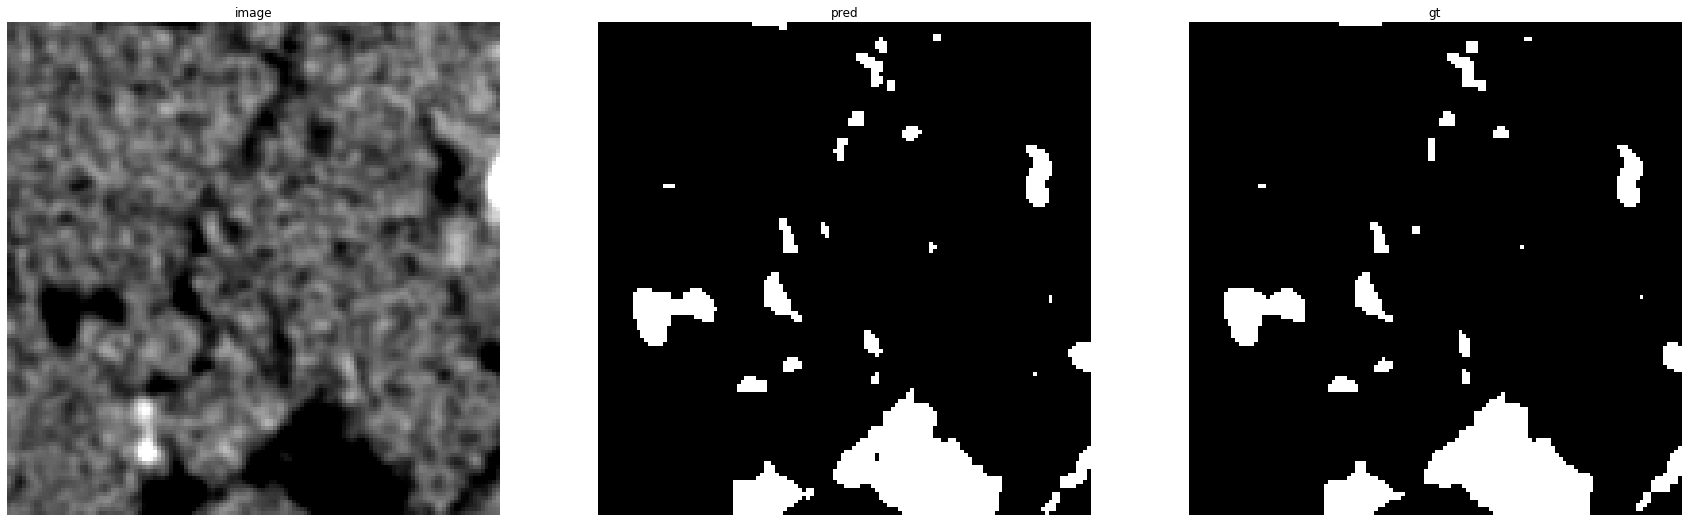

accuracy    : 0.9937744140625
precision   : 0.9651957737725295
recall      : 0.9712320200125079
f1          : 0.9682044887780549
pr_auc      : 0.9969061452872688
iou         : 0.938368580060423


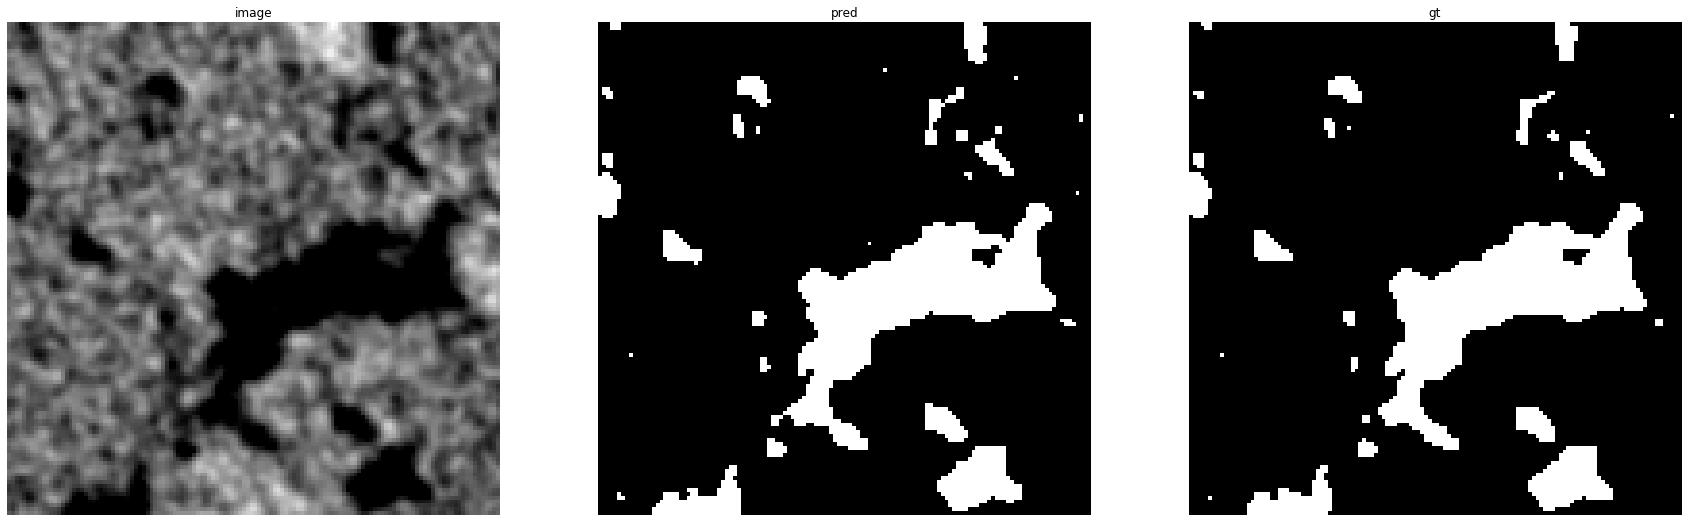

accuracy    : 0.992431640625
precision   : 0.9673255344897136
recall      : 0.9823842687423188
f1          : 0.9747967479674796
pr_auc      : 0.9984669464196448
iou         : 0.950832672482157


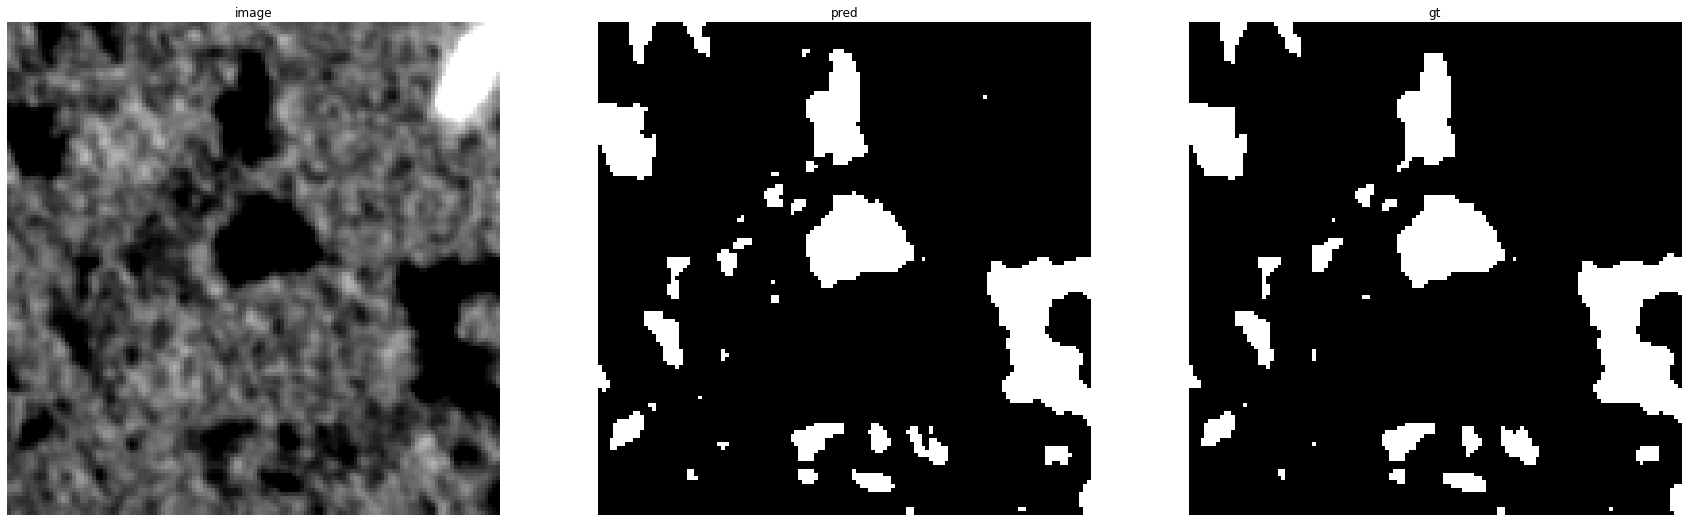

accuracy    : 0.990966796875
precision   : 0.9579655317360235
recall      : 0.979372582724538
f1          : 0.9685507862303442
pr_auc      : 0.9966248767537085
iou         : 0.9390193654717759


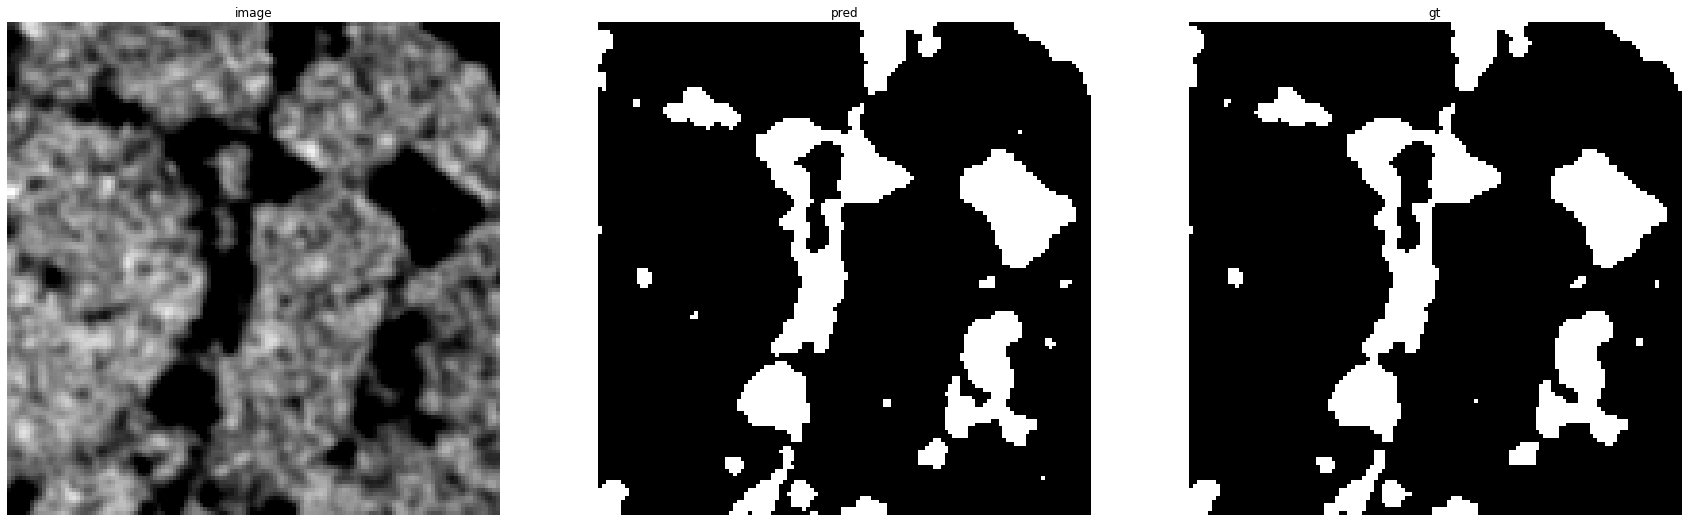

accuracy    : 0.99163818359375
precision   : 0.9702808621815807
recall      : 0.9847530659595625
f1          : 0.9774633985852936
pr_auc      : 0.9984159344342373
iou         : 0.9559202059202059


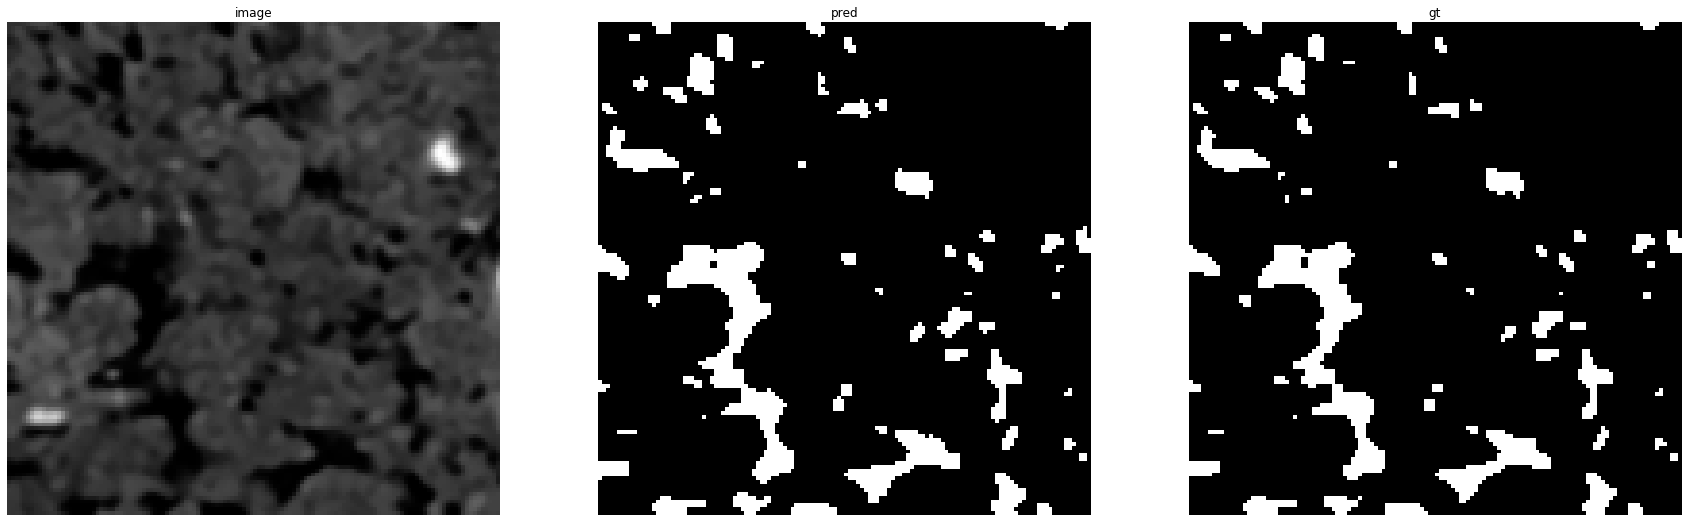

accuracy    : 0.99163818359375
precision   : 0.9342177998894416
recall      : 0.9894613583138173
f1          : 0.9610463463178845
pr_auc      : 0.9965374815420492
iou         : 0.9250136836343733


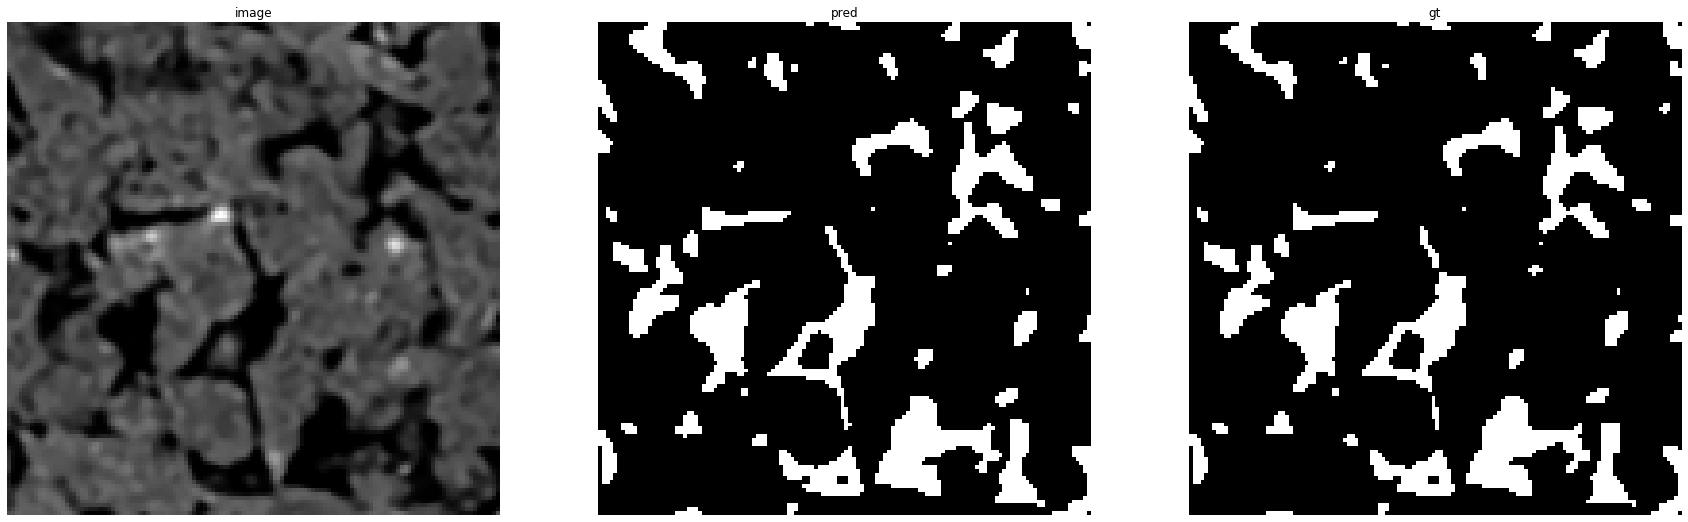

accuracy    : 0.99072265625
precision   : 0.9497800586510264
recall      : 0.9942440521872602
f1          : 0.9715035620547431
pr_auc      : 0.9980767882706878
iou         : 0.944586219467736


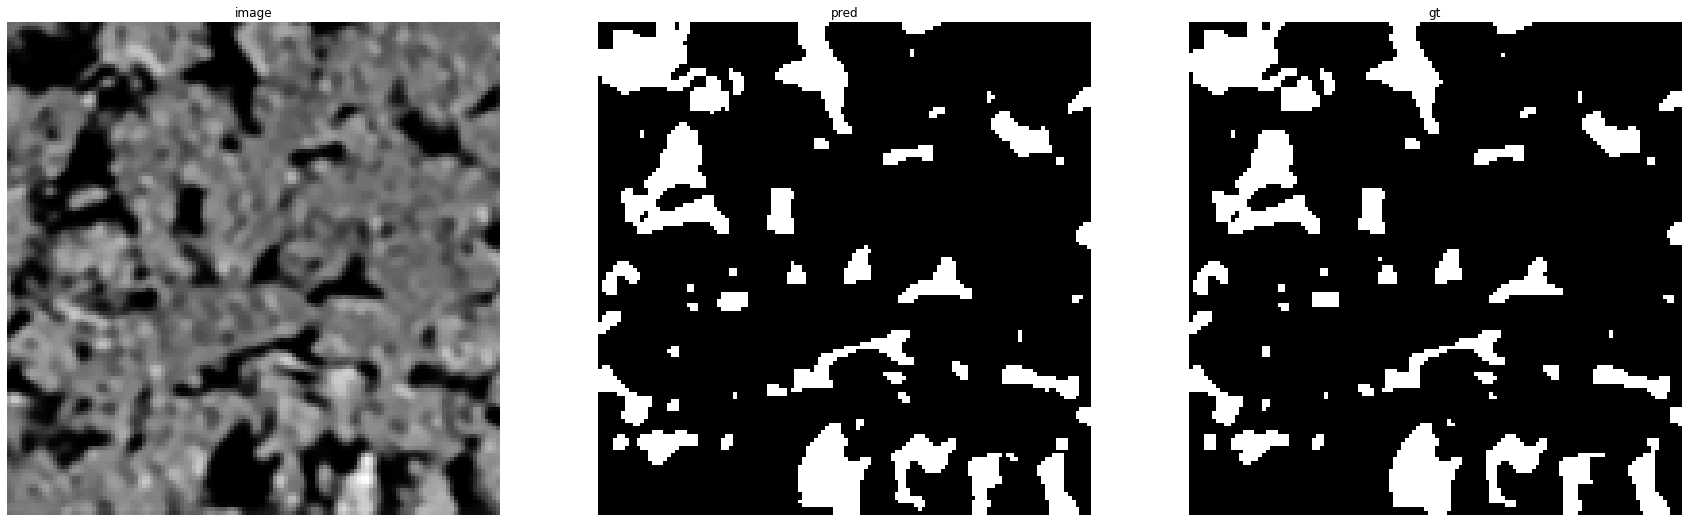

accuracy    : 0.99090576171875
precision   : 0.9527389903329753
recall      : 0.9936519790888723
f1          : 0.972765490769512
pr_auc      : 0.9982873658377391
iou         : 0.9469750889679716


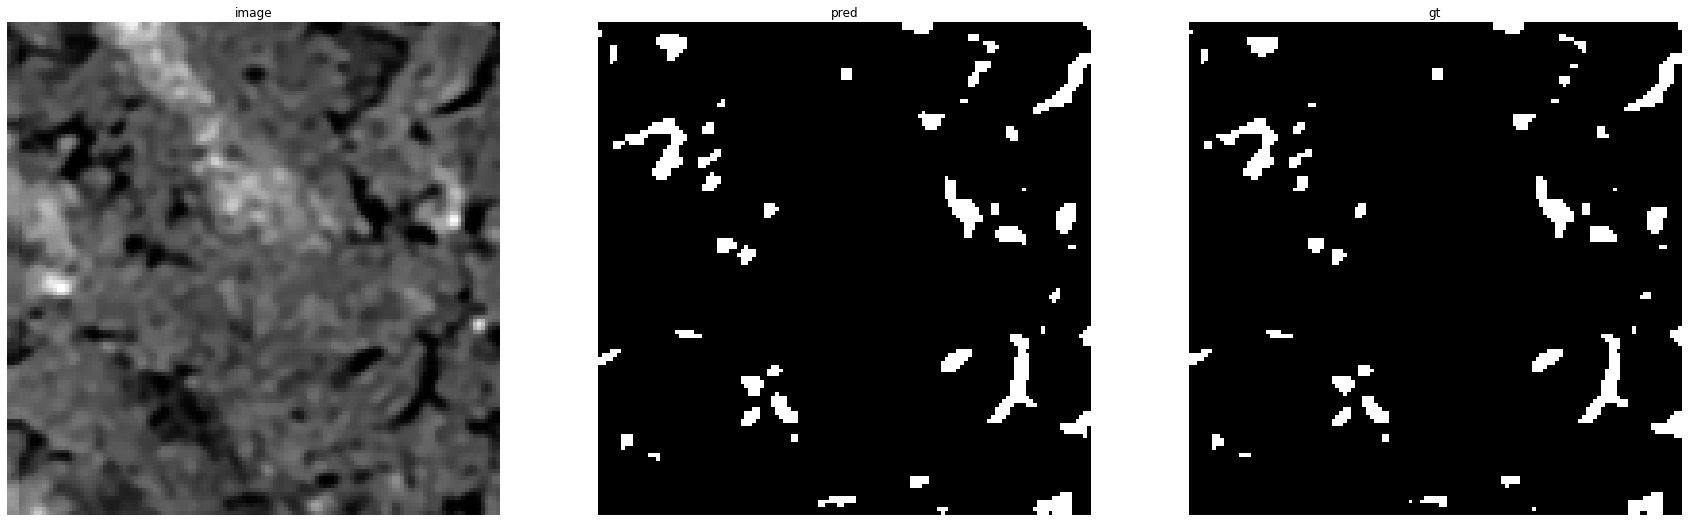

accuracy    : 0.9930419921875
precision   : 0.8927410617551462
recall      : 0.9821215733015495
f1          : 0.9353007945516458
pr_auc      : 0.9930327594031809
iou         : 0.8784648187633263


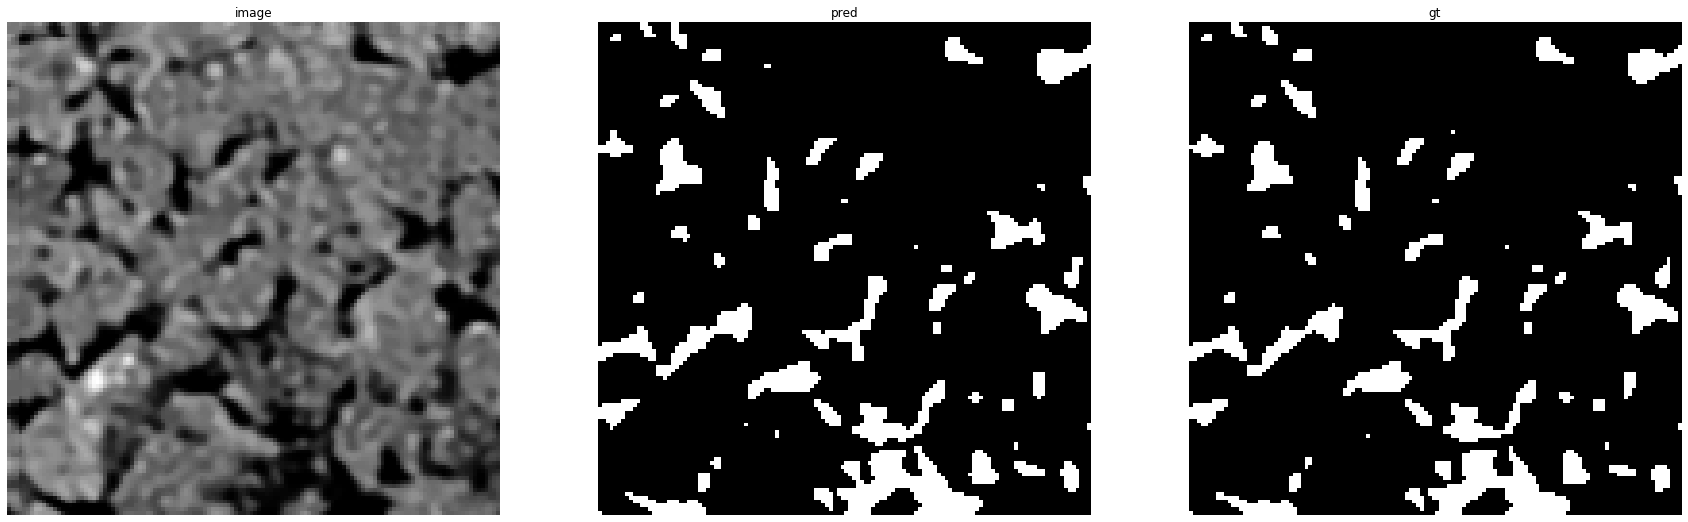

accuracy    : 0.990966796875
precision   : 0.9337231968810916
recall      : 0.9937759336099585
f1          : 0.9628140703517588
pr_auc      : 0.9969671036791615
iou         : 0.9282945736434108


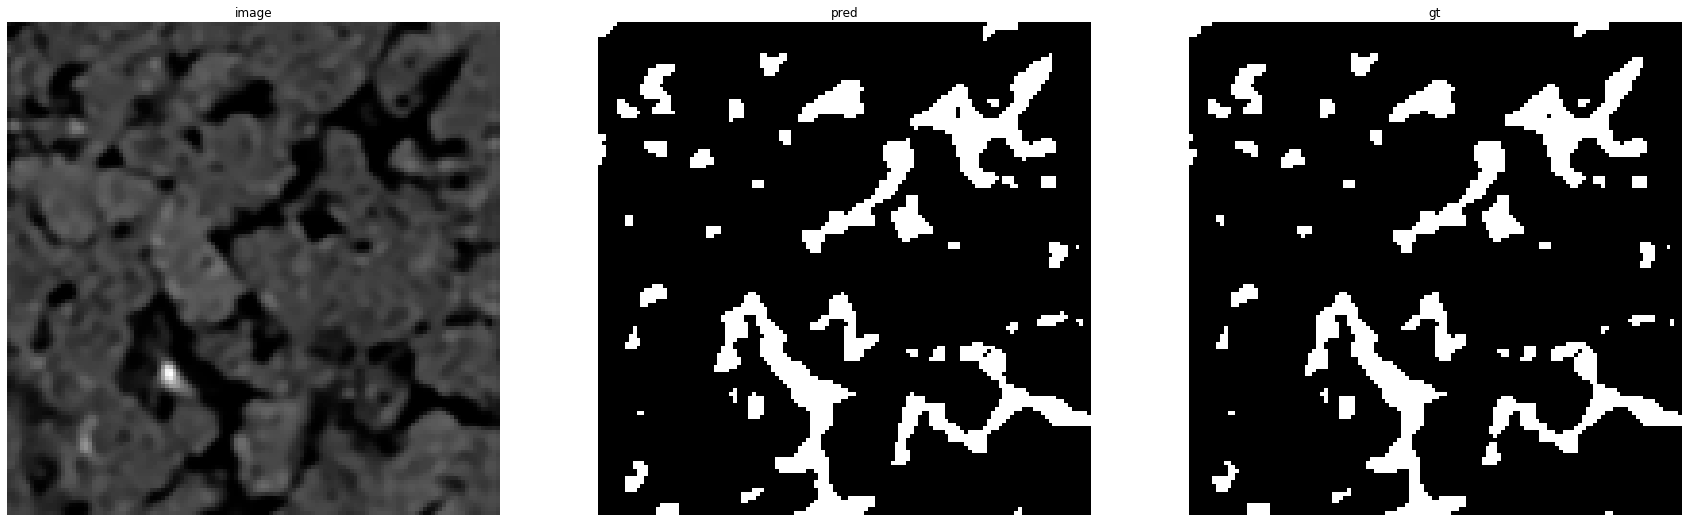

accuracy    : 0.99072265625
precision   : 0.9458315700380872
recall      : 0.9893758300132802
f1          : 0.9671138035482476
pr_auc      : 0.99721382256722
iou         : 0.9363217427733557


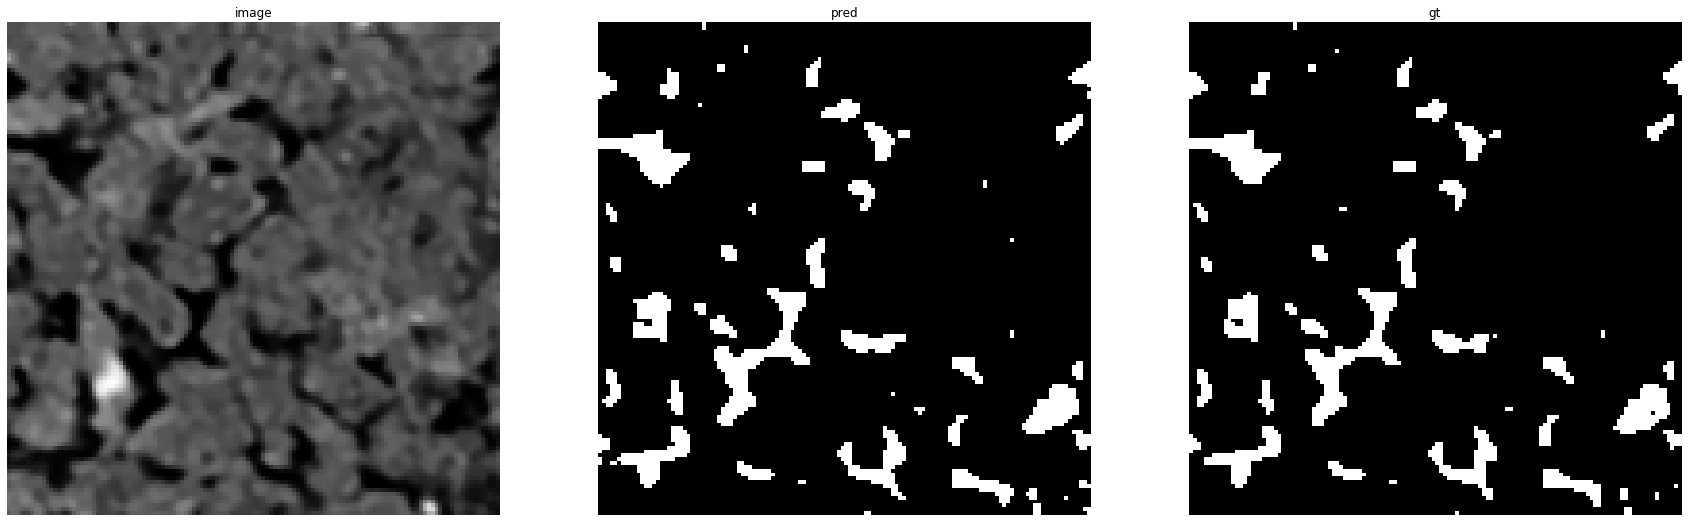

accuracy    : 0.99127197265625
precision   : 0.9240426867545511
recall      : 0.9852744310575636
f1          : 0.9536767087787495
pr_auc      : 0.9947956927839625
iou         : 0.9114551083591331


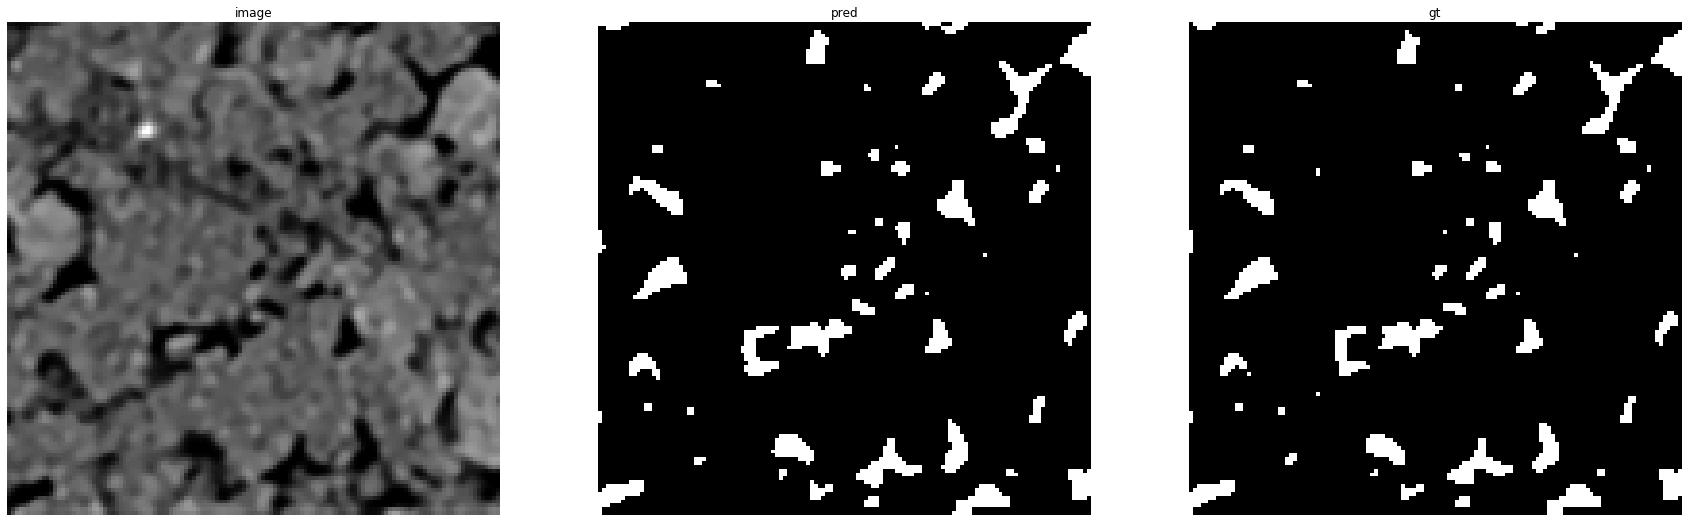

accuracy    : 0.99365234375
precision   : 0.9319571865443425
recall      : 0.9878444084278768
f1          : 0.959087332808812
pr_auc      : 0.9957384973833829
iou         : 0.9213907785336357


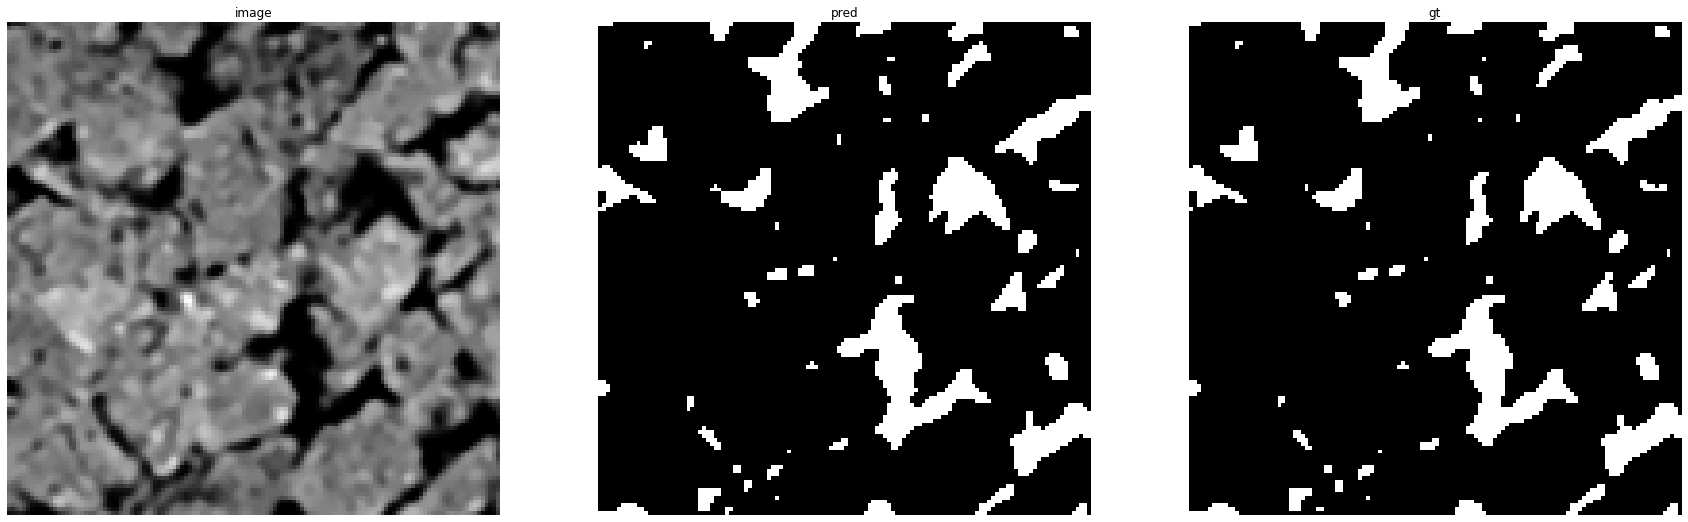

accuracy    : 0.99334716796875
precision   : 0.9555555555555556
recall      : 0.993740972556572
f1          : 0.9742742506490442
pr_auc      : 0.9983507003862285
iou         : 0.9498389323515877


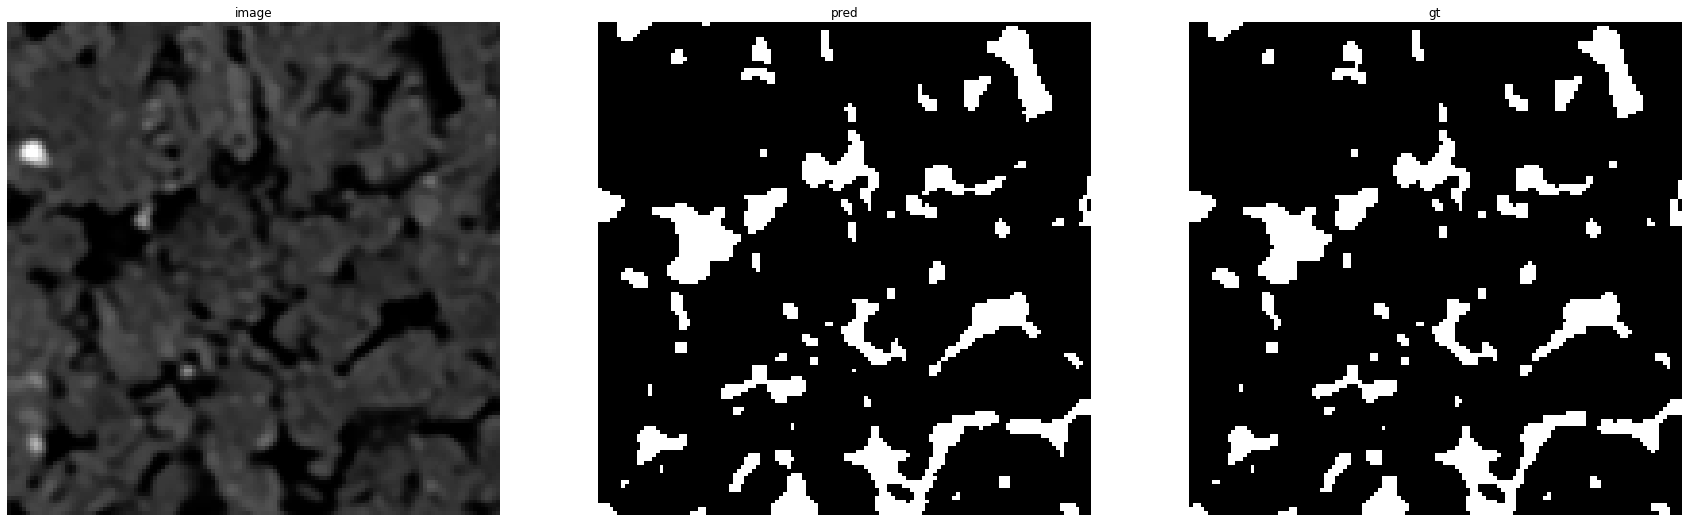

accuracy    : 0.99053955078125
precision   : 0.9453671328671329
recall      : 0.9863201094391245
f1          : 0.9654095068065164
pr_auc      : 0.9962770490367158
iou         : 0.9331320103537533


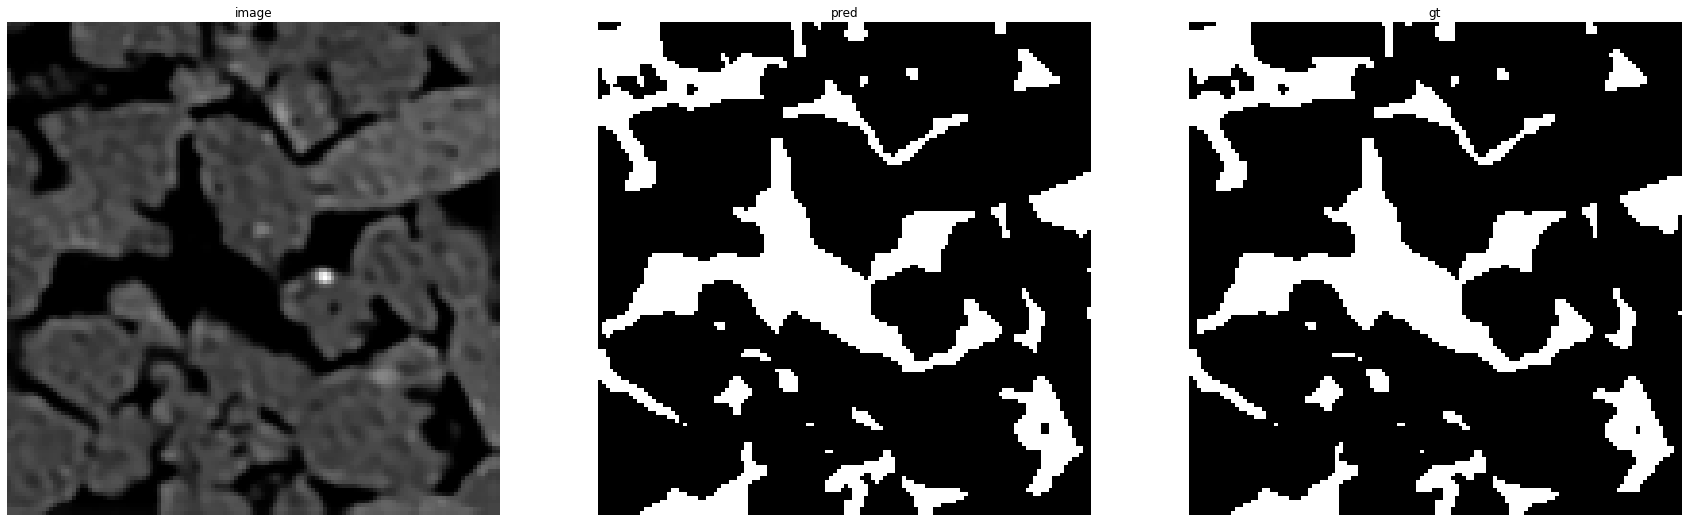

accuracy    : 0.9879150390625
precision   : 0.9651792623162239
recall      : 0.983442838370565
f1          : 0.9742254621192397
pr_auc      : 0.9984105252808165
iou         : 0.949746192893401


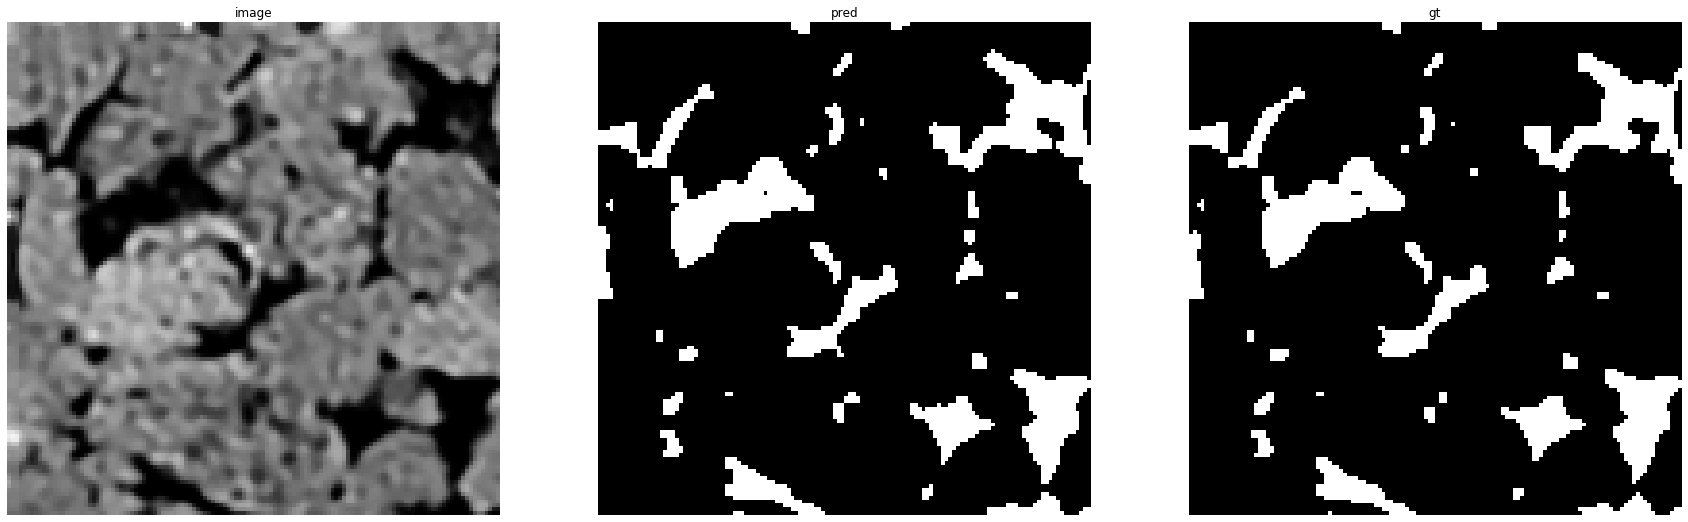

accuracy    : 0.989501953125
precision   : 0.944078947368421
recall      : 0.9845626072041166
f1          : 0.9638958858102434
pr_auc      : 0.9971396608427876
iou         : 0.9303079416531604


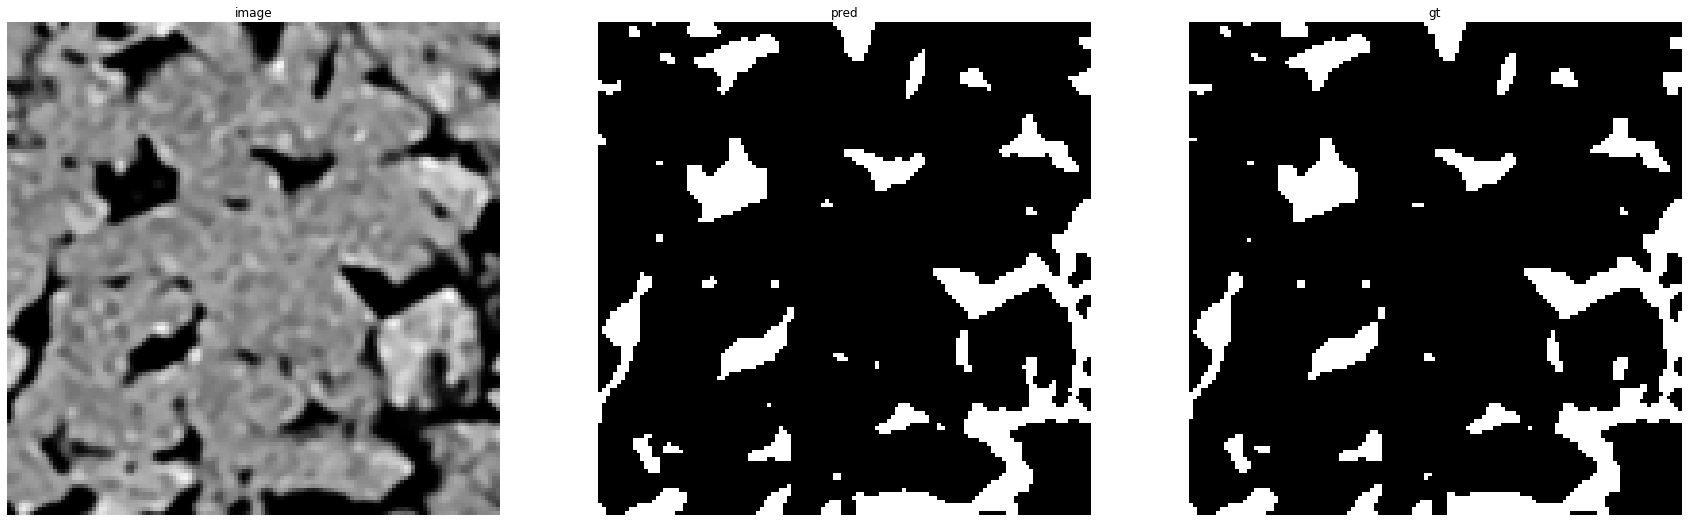

accuracy    : 0.99029541015625
precision   : 0.955108359133127
recall      : 0.9828753484667463
f1          : 0.9687929342492639
pr_auc      : 0.9978264373959423
iou         : 0.9394746859535592


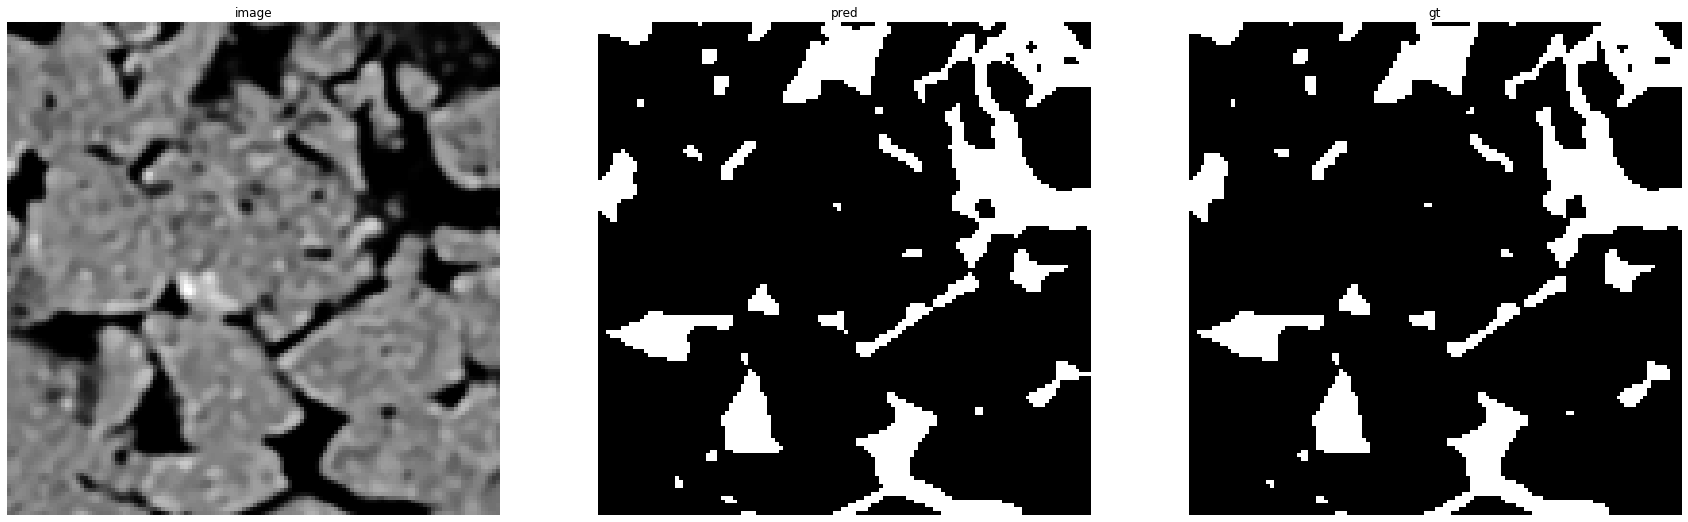

accuracy    : 0.99078369140625
precision   : 0.9594373568858358
recall      : 0.9908783783783783
f1          : 0.9749044374272893
pr_auc      : 0.9985676306978699
iou         : 0.9510376134889753


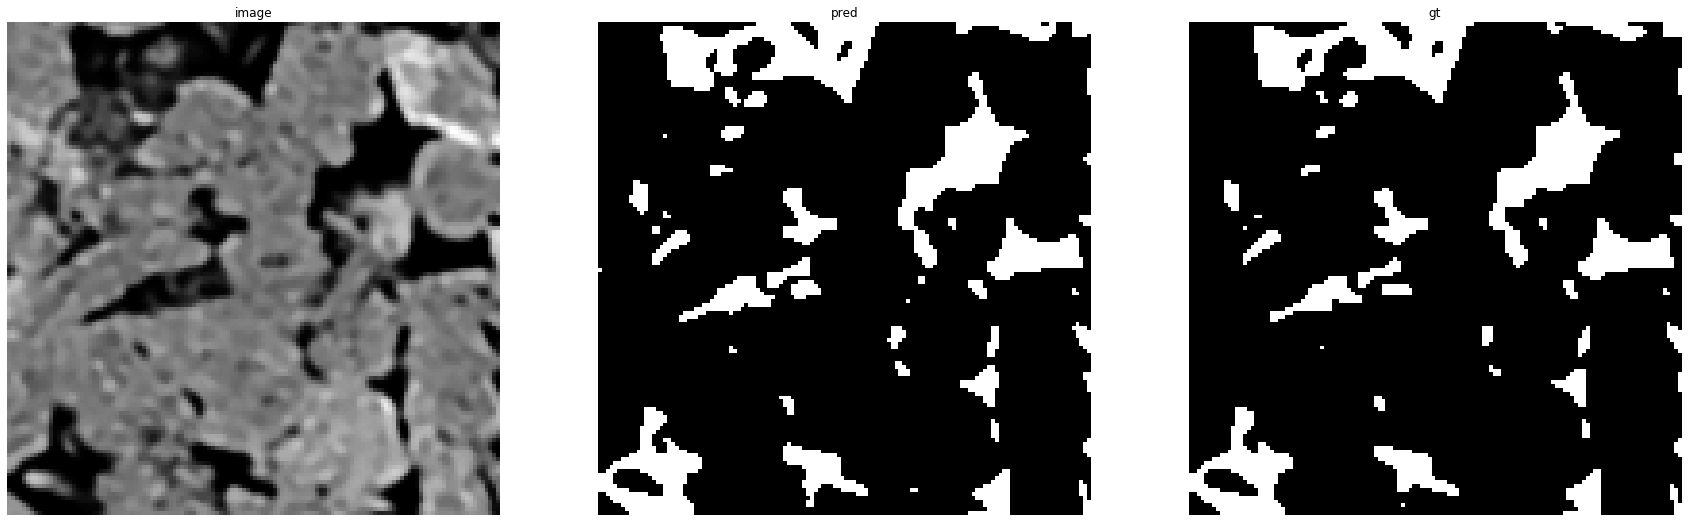

accuracy    : 0.98724365234375
precision   : 0.9330323551542513
recall      : 0.9876543209876543
f1          : 0.959566647320565
pr_auc      : 0.9969628626436814
iou         : 0.9222759390107846


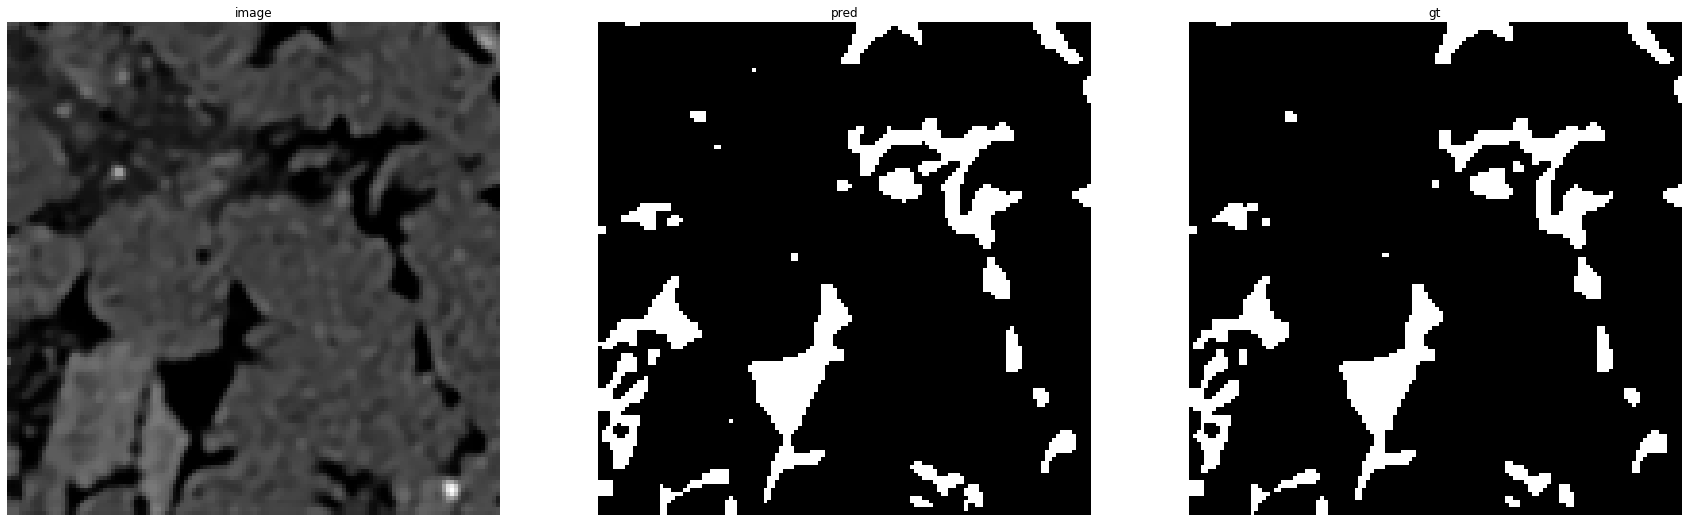

accuracy    : 0.98931884765625
precision   : 0.9306880964339528
recall      : 0.9804232804232804
f1          : 0.9549085287297088
pr_auc      : 0.995375923221572
iou         : 0.9137080867850098


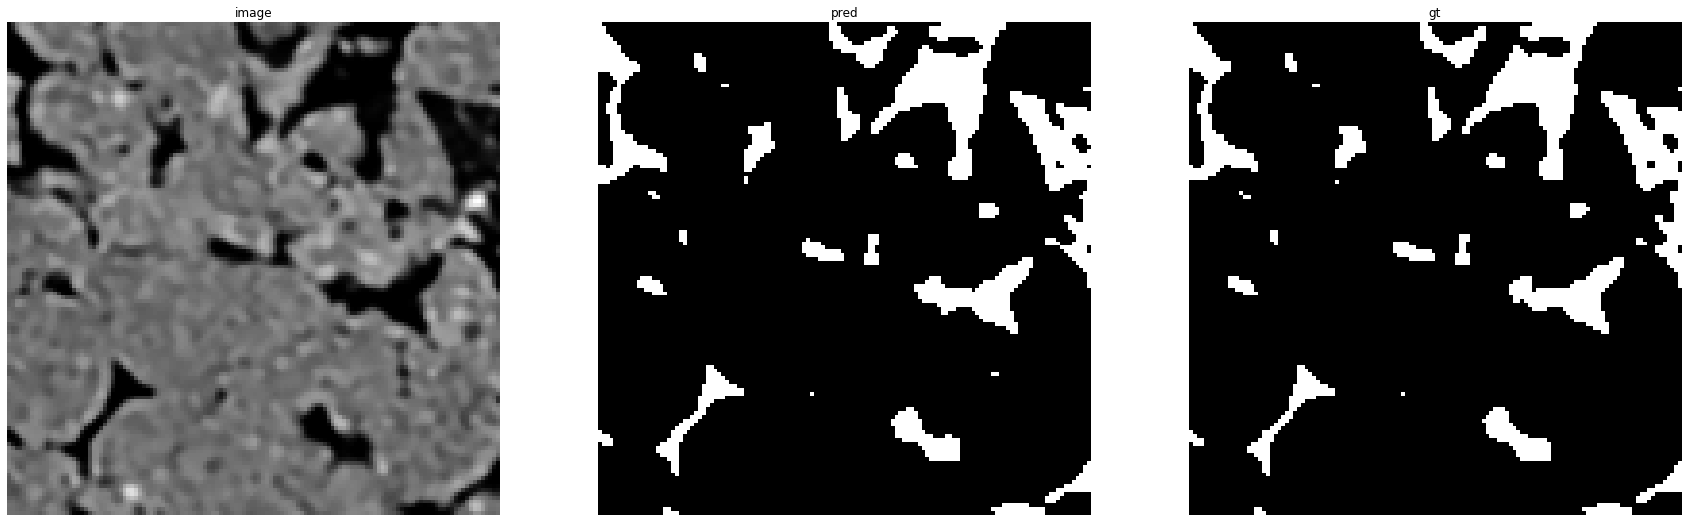

accuracy    : 0.99383544921875
precision   : 0.9631755141080822
recall      : 0.9882237487733072
f1          : 0.9755388713974328
pr_auc      : 0.9984088028684
iou         : 0.9522458628841608


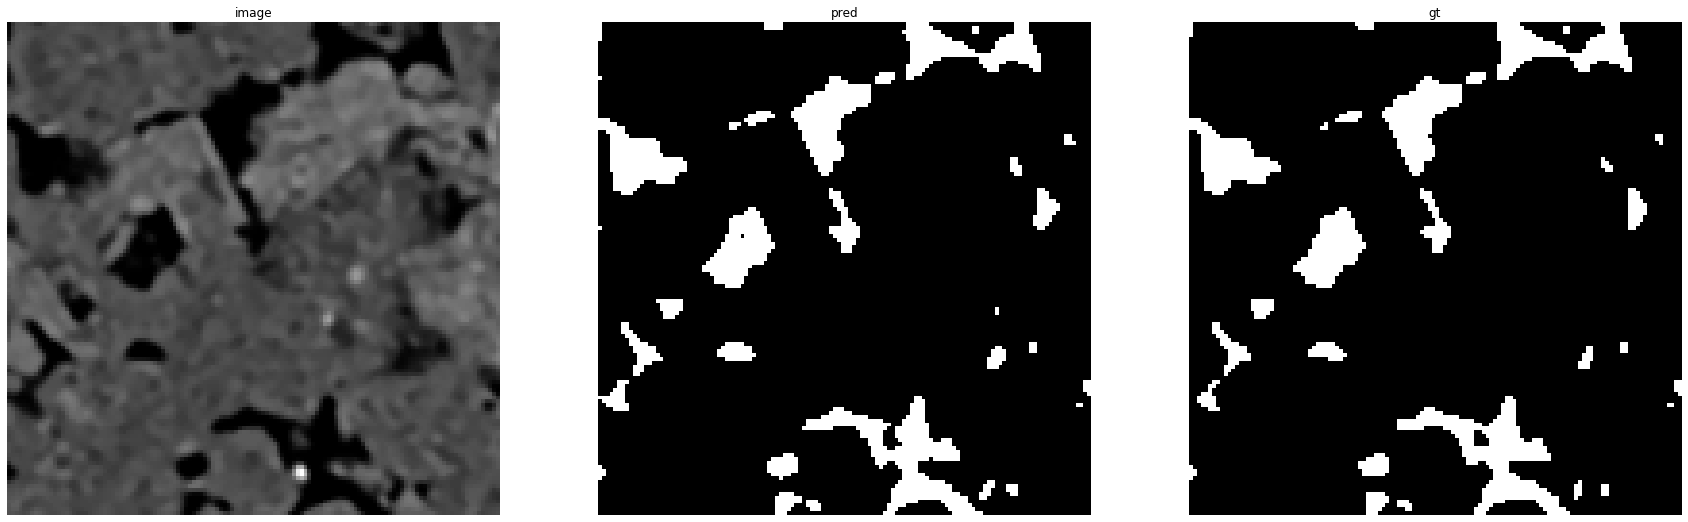

accuracy    : 0.99285888671875
precision   : 0.9512969825304394
recall      : 0.9862788144895719
f1          : 0.9684721099434115
pr_auc      : 0.9975659778673578
iou         : 0.9388714733542319


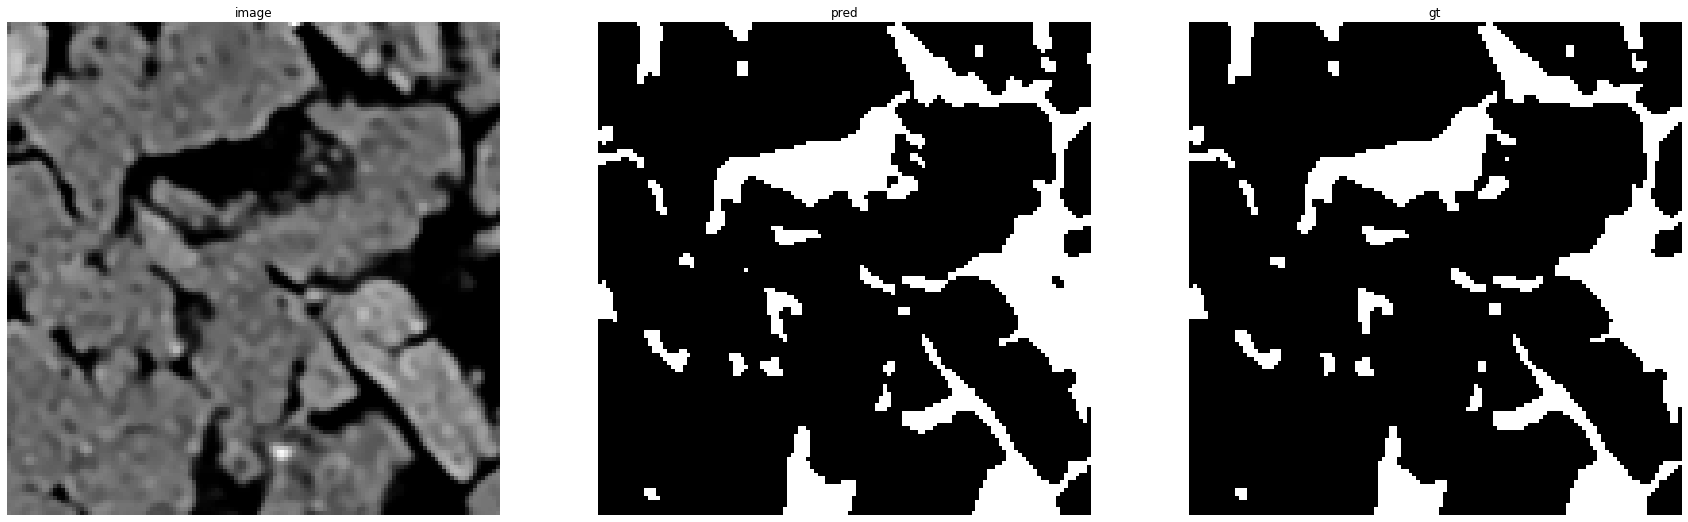

accuracy    : 0.9873046875
precision   : 0.9548272807794509
recall      : 0.9832775919732442
f1          : 0.9688436189334931
pr_auc      : 0.9980047241371198
iou         : 0.9395700174317257


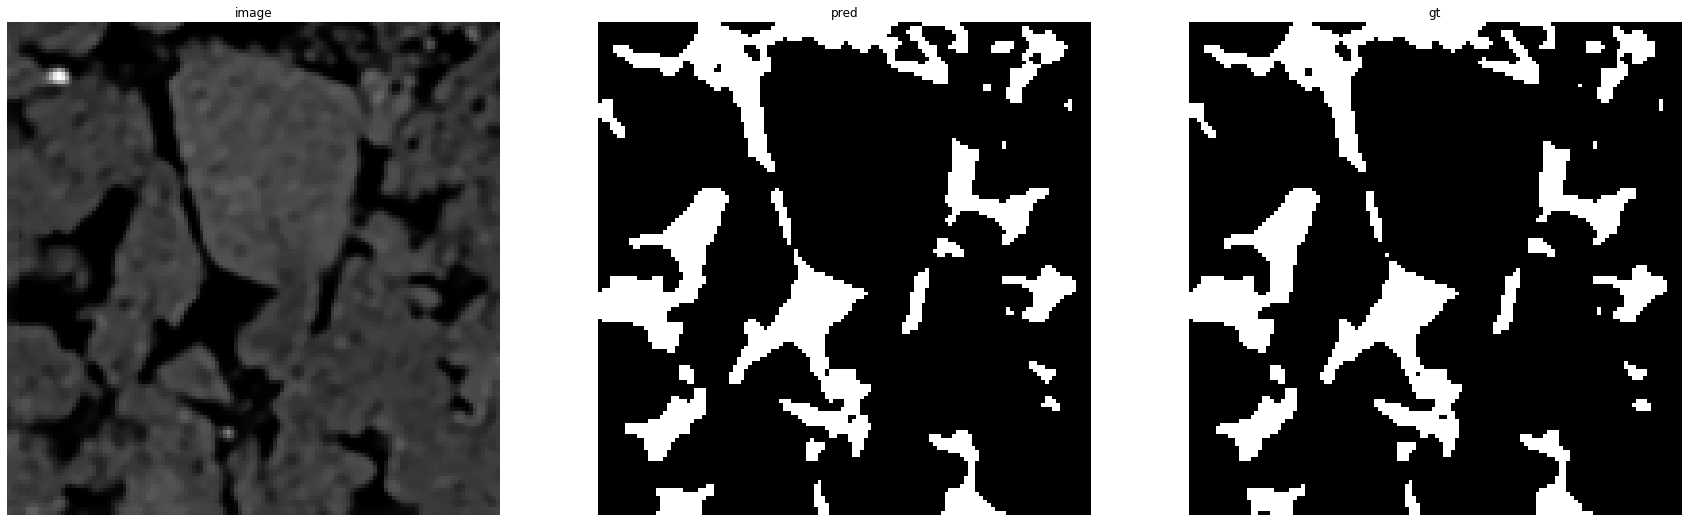

accuracy    : 0.98931884765625
precision   : 0.9566978193146417
recall      : 0.9884132603797876
f1          : 0.9722969764128542
pr_auc      : 0.9976704123564212
iou         : 0.9460874922982132


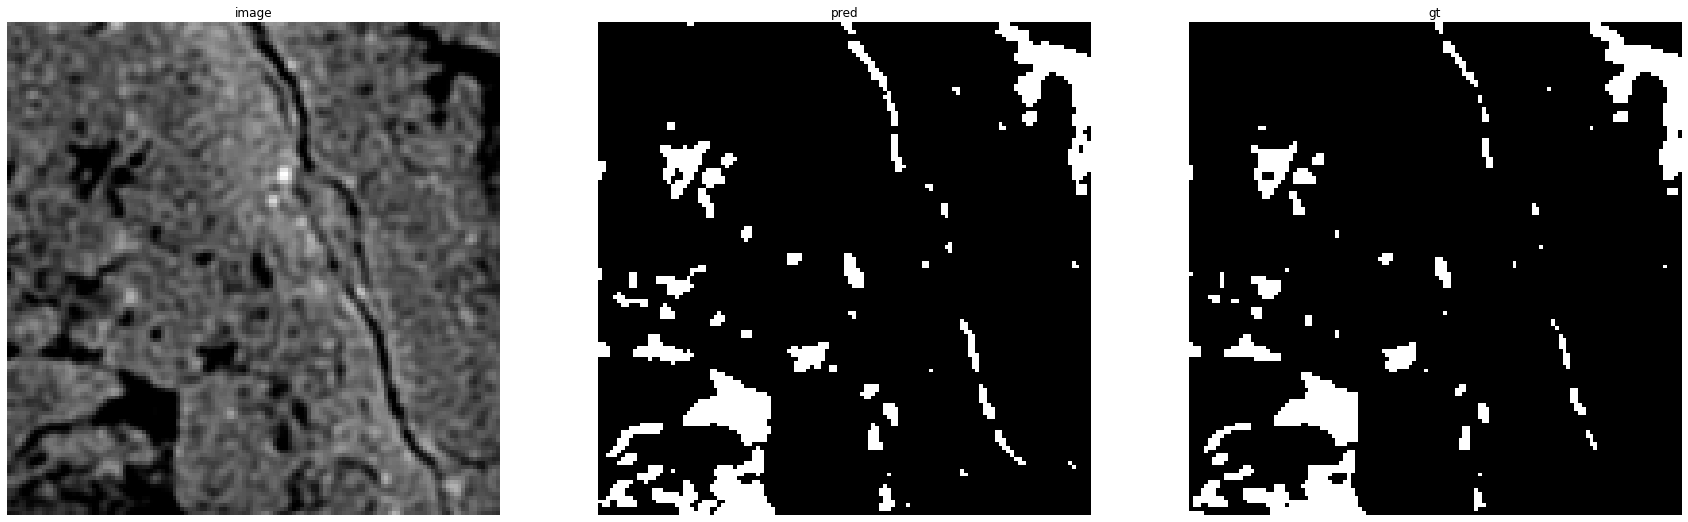

accuracy    : 0.9798583984375
precision   : 0.8291062801932367
recall      : 0.9669014084507043
f1          : 0.8927178153446035
pr_auc      : 0.9826192821056833
iou         : 0.806224310041104


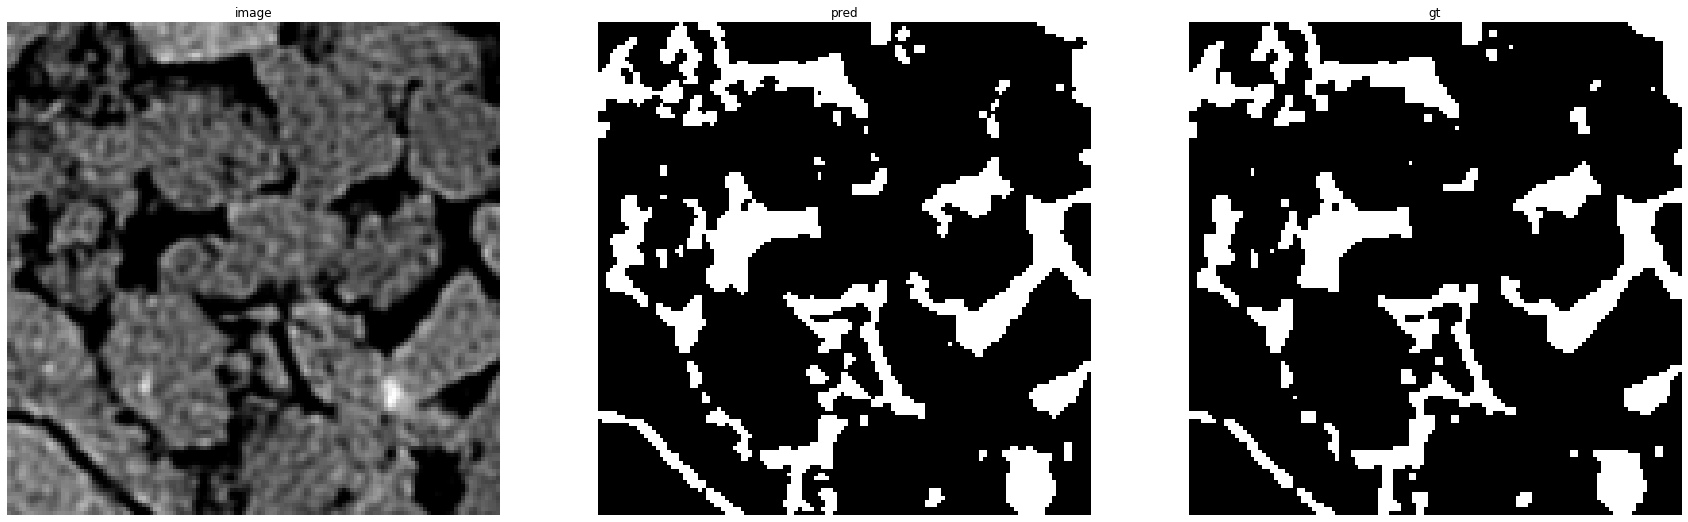

accuracy    : 0.97259521484375
precision   : 0.8989615492562447
recall      : 0.9729647630619684
f1          : 0.9345003646973011
pr_auc      : 0.9907299685064936
iou         : 0.877053669222344


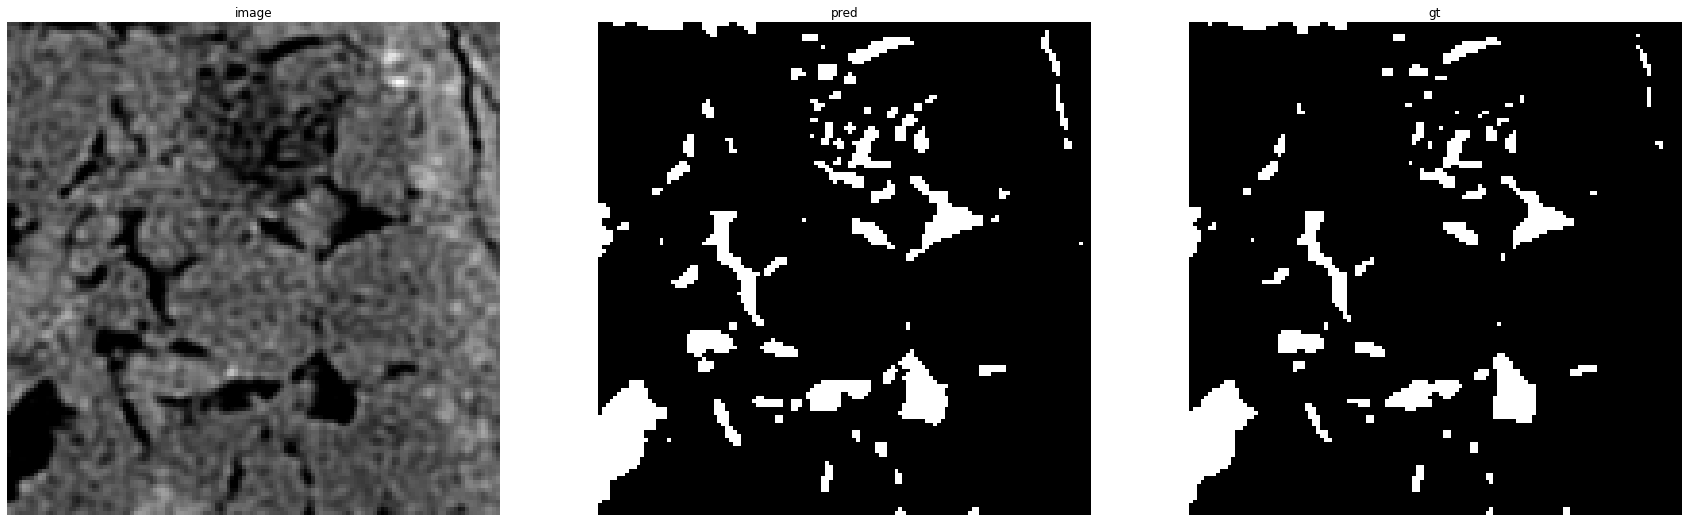

accuracy    : 0.97894287109375
precision   : 0.8051869722557298
recall      : 0.9837877671333825
f1          : 0.8855721393034826
pr_auc      : 0.9870267355258068
iou         : 0.7946428571428571


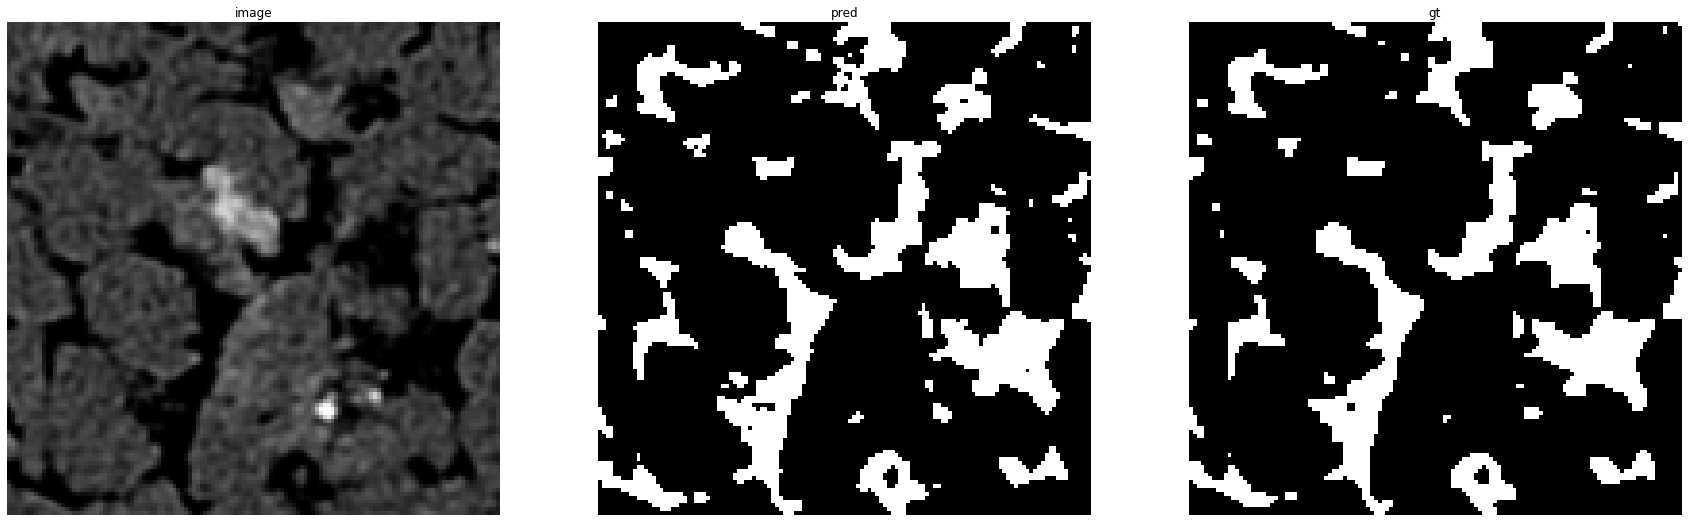

accuracy    : 0.97515869140625
precision   : 0.8981723237597912
recall      : 0.9822335025380711
f1          : 0.9383239884831035
pr_auc      : 0.9936444329358841
iou         : 0.8838138738224379


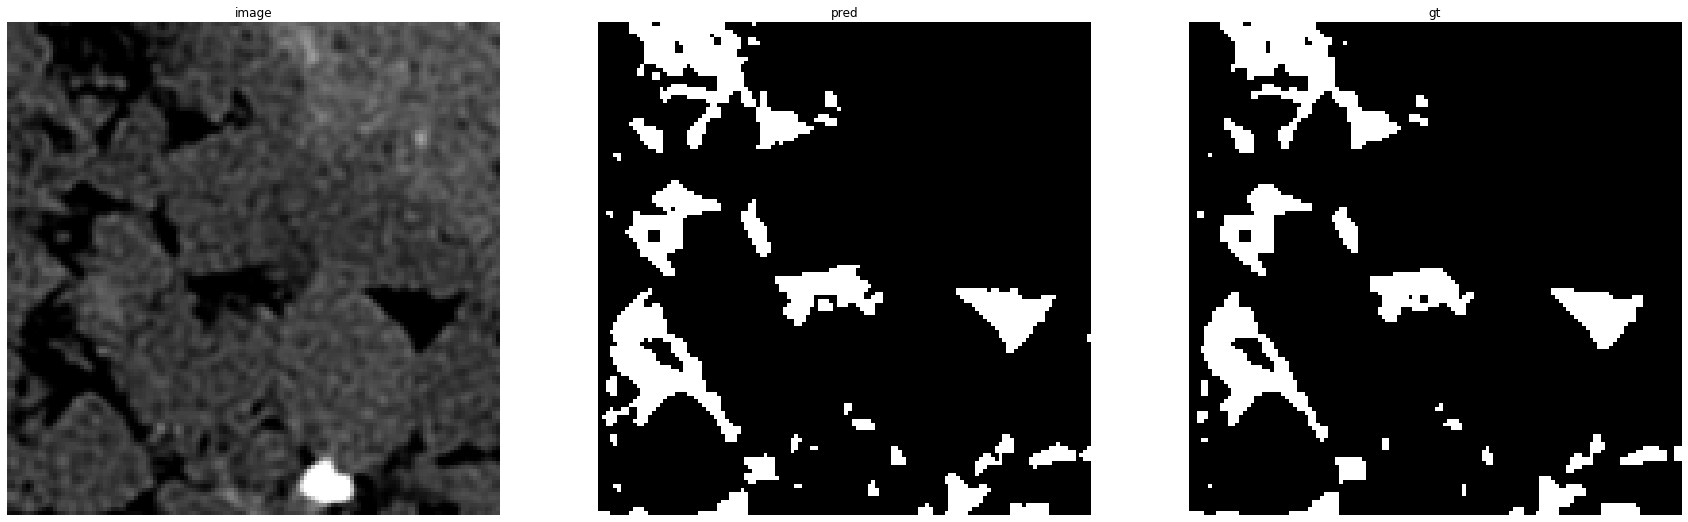

accuracy    : 0.98211669921875
precision   : 0.8974247053688346
recall      : 0.9725638599810785
f1          : 0.9334846765039728
pr_auc      : 0.9901211911340199
iou         : 0.8752660706683695


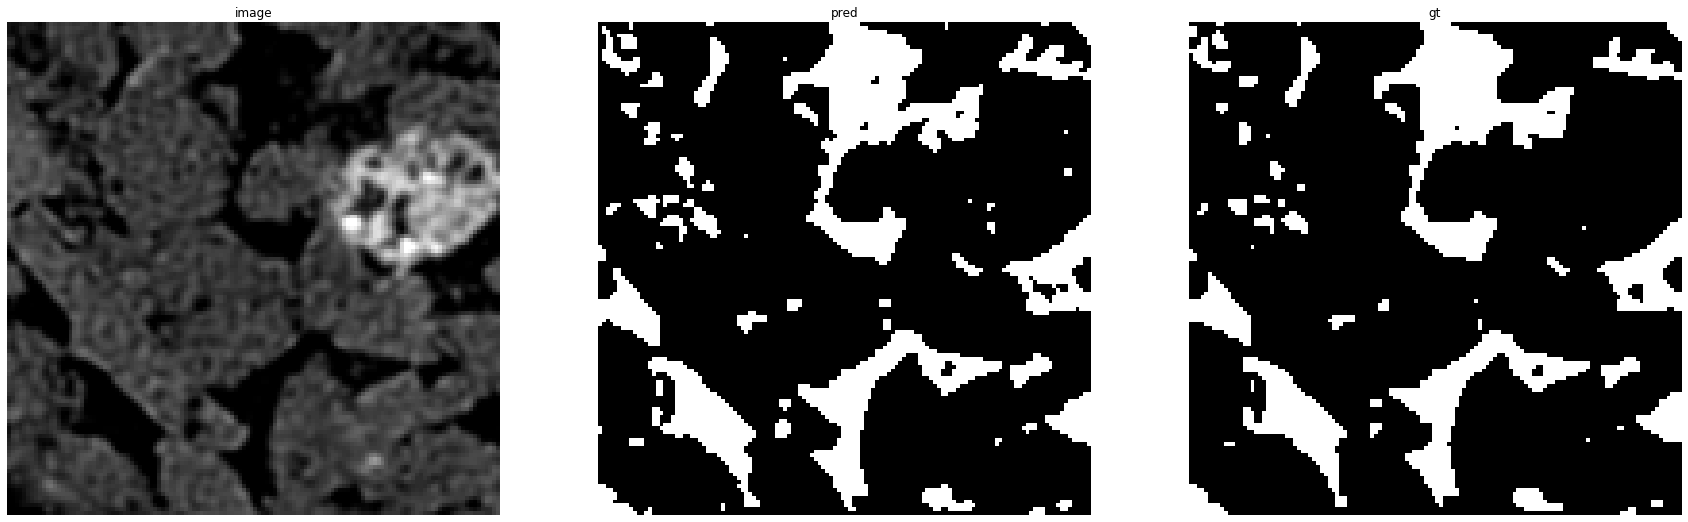

accuracy    : 0.97509765625
precision   : 0.9027496382054992
recall      : 0.977436540269508
f1          : 0.9386096900391212
pr_auc      : 0.9926729054531325
iou         : 0.8843209526509782


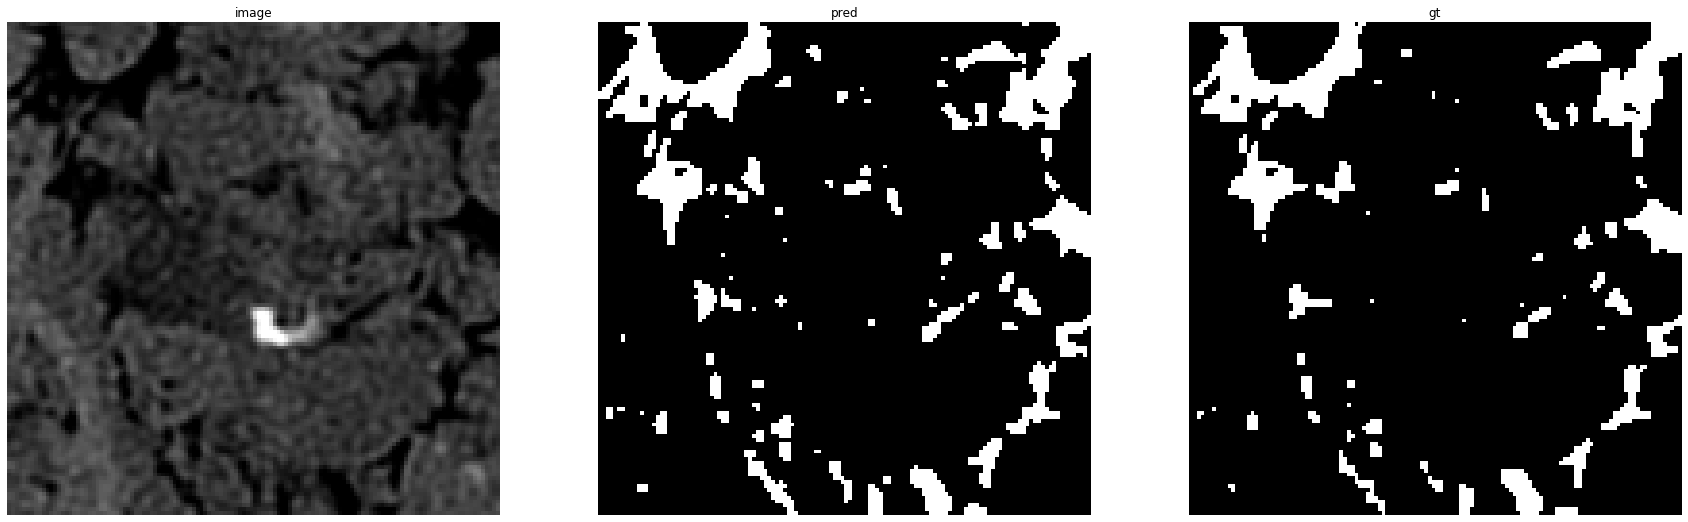

accuracy    : 0.97552490234375
precision   : 0.8434977578475337
recall      : 0.9730988101396792
f1          : 0.9036752342061014
pr_auc      : 0.9852454638345485
iou         : 0.8242769500438212


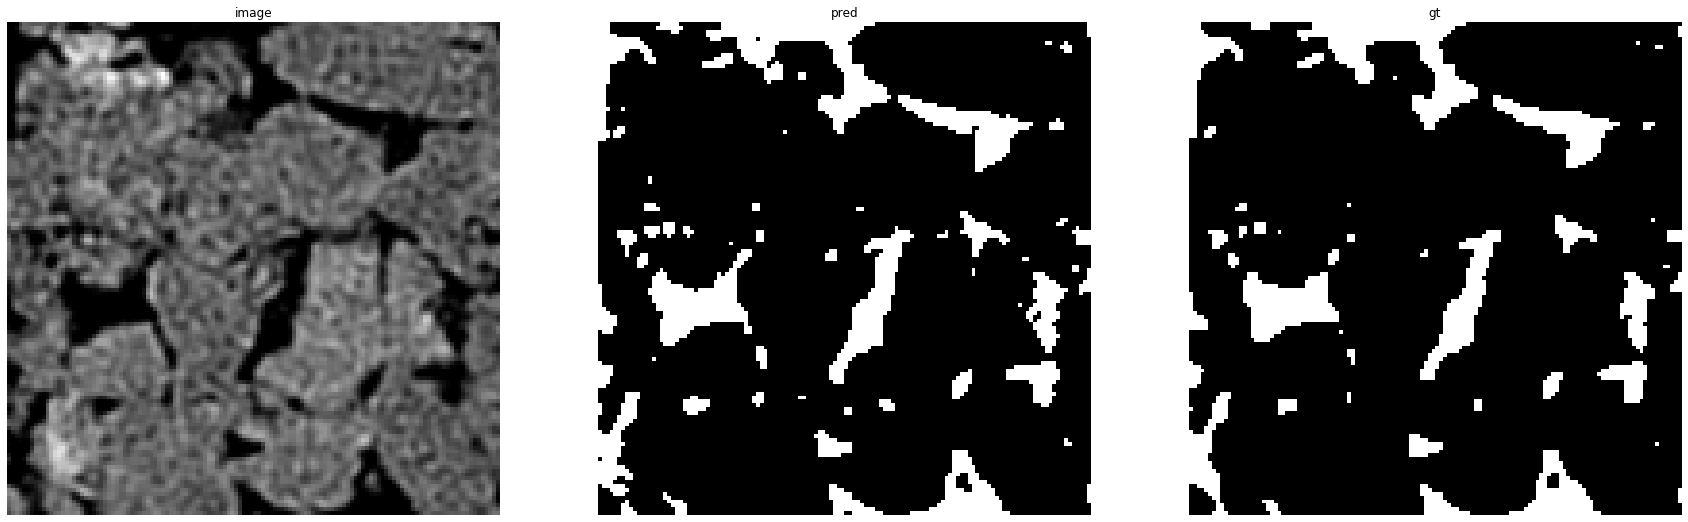

accuracy    : 0.9794921875
precision   : 0.882952691680261
recall      : 0.9778681120144534
f1          : 0.9279897128161165
pr_auc      : 0.990513485231008
iou         : 0.8656537385045981


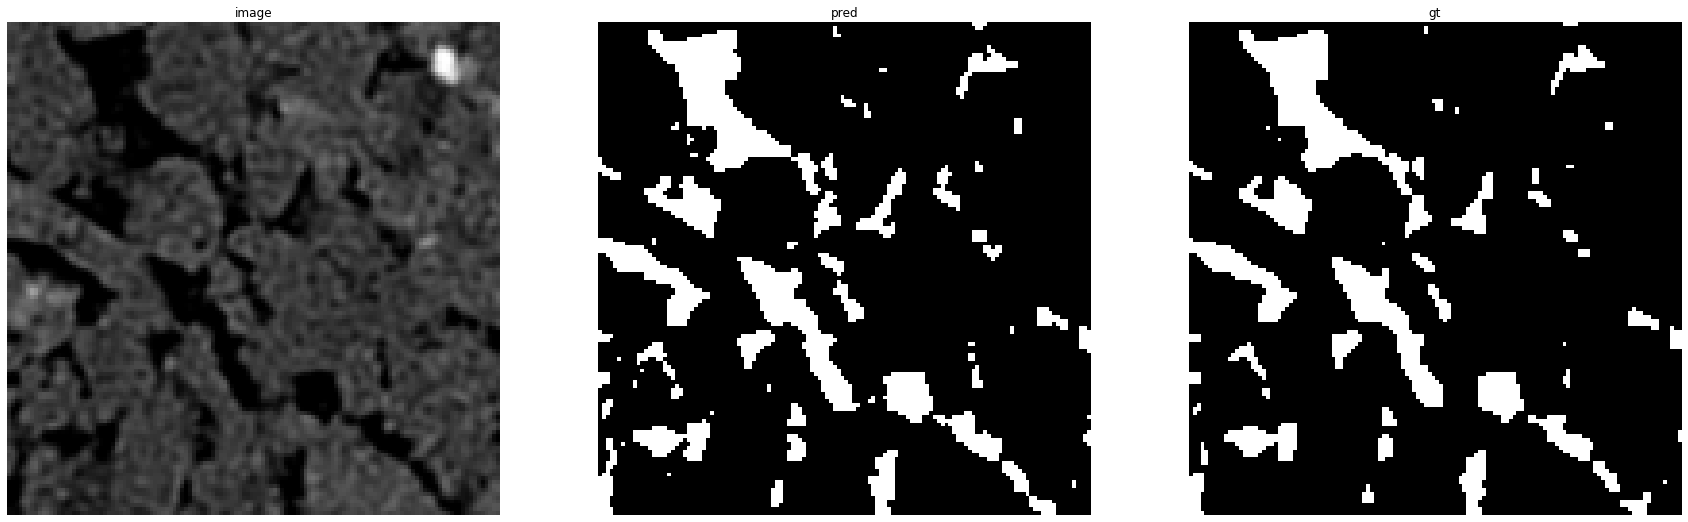

accuracy    : 0.97705078125
precision   : 0.8727272727272727
recall      : 0.9761273209549072
f1          : 0.9215358931552587
pr_auc      : 0.9893483362126284
iou         : 0.8544891640866873


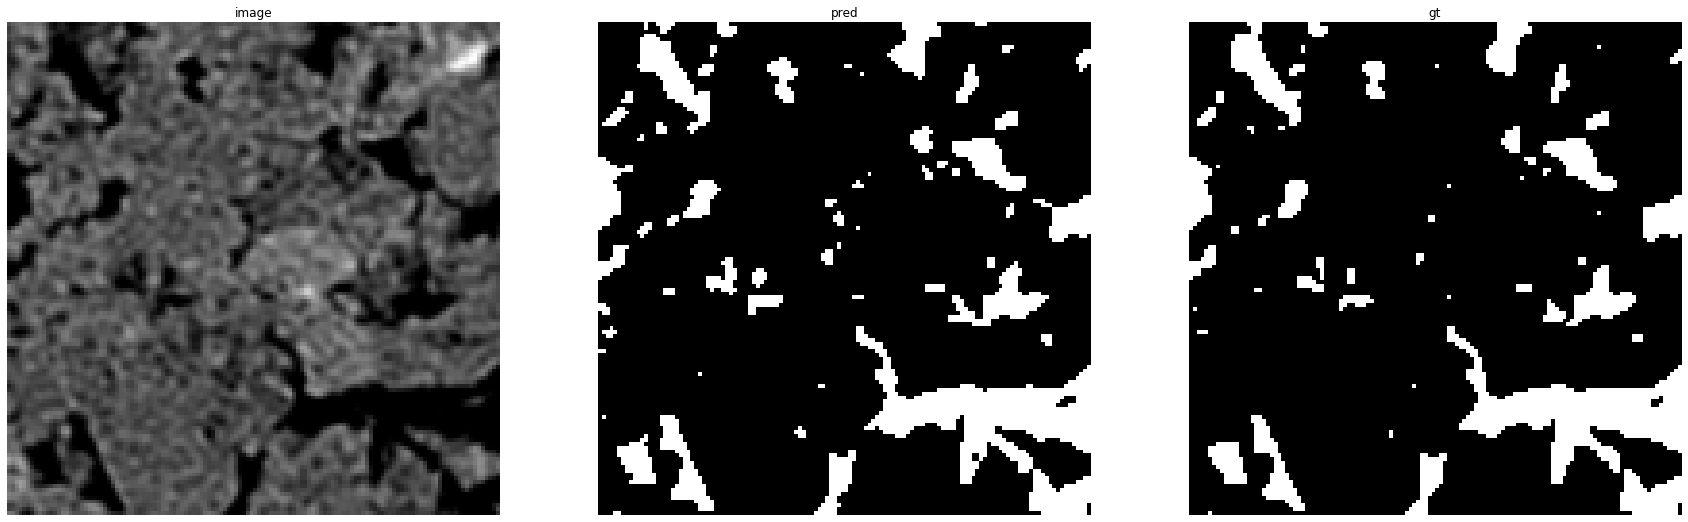

accuracy    : 0.9805908203125
precision   : 0.8912538699690402
recall      : 0.9841880341880341
f1          : 0.9354183590576766
pr_auc      : 0.9928325766258774
iou         : 0.8786722624952308


In [29]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Results

In [30]:
import pandas as pd

In [31]:
from visualization_utils import make_df

In [32]:
df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.989016   0.855867  0.999570  0.922154  0.997192  0.855552   
1   0.959890   0.777877  0.998674  0.874555  0.993666  0.777074   
2   0.978139   0.840988  0.959523  0.896354  0.979483  0.812175   
3   0.991100   0.973473  0.940000  0.956444  0.994498  0.916524   
4   0.984845   0.845343  0.983943  0.909392  0.990892  0.833840   
5   0.984077   0.823421  0.998588  0.902584  0.996291  0.822464   
6   0.991356   0.953073  0.976035  0.964417  0.996577  0.931279   
7   0.992976   0.953811  0.980064  0.966760  0.997037  0.935658   
8   0.991402   0.943596  0.990744  0.966595  0.997372  0.935350   
9   0.989822   0.950151  0.985511  0.967508  0.997506  0.937061   
10  0.977587   0.884570  0.978965  0.929377  0.990770  0.868071   

                 stack    model  
0            carb96558  Urna_22  
1               carb71  Urna_22  
2              carbRNF  Urna_22  
3   SPE_carb10_58_box3  Urna_22  
4             SoilAh-1  Urna_22  
5              SoilB-2  Urna_22  
6       TeTree_subset1  Urna_22  
7       TiTree_subset2  Urna_22  
8              Urna_22  Urna_22  
9              Urna_30  Urna_22  
10             Urna_34  Urna_22

## Make prediction for particular stack

In [33]:
stack_name = 'Urna_30'

In [34]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

710it [00:00, 784.07it/s]
100%|██████████| 710/710 [00:07<00:00, 99.70it/s] 


In [35]:
model.eval();

In [46]:
predicted_stack_1 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 259673.37it/s]
25560it [02:02, 209.00it/s]
100%|██████████| 25560/25560 [00:08<00:00, 3162.10it/s]


In [47]:
predicted_stack_2 = stack.apply(
    model, 
    model_config,
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 117520.74it/s]
25560it [02:03, 206.49it/s]
100%|██████████| 25560/25560 [00:01<00:00, 16065.20it/s]


In [48]:
predicted_stack_3 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 230192.52it/s]
25560it [02:04, 204.98it/s]
100%|██████████| 25560/25560 [00:01<00:00, 15076.94it/s]


In [49]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.9425491703400469

In [50]:
iou(np.where(predicted_stack_2.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8636871594693208

In [51]:
iou(np.where(predicted_stack_3.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8667919230639054

In [52]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.903532319207894

In [43]:
average_stack = Stack(predicted_stack_1.features, 
                      predicted_stack_1.targets, 
                      (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3)

In [44]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        model_config=model_config,
        patch_sizes=ps, 
        bs=32, num_workers=8, device=device,
        threshold=None)
    predicted_stack.dump('../segmented_stacks/{}_{}'.format(stack_name, d), 
                         features=False, 
                         targets=True, 
                         preds=True)

25560it [00:00, 235559.98it/s]
25560it [02:04, 205.96it/s]
100%|██████████| 710/710 [00:07<00:00, 95.22it/s]
25560it [00:00, 247902.46it/s]
25560it [02:04, 204.86it/s]
100%|██████████| 710/710 [00:07<00:00, 91.96it/s]
25560it [00:00, 236652.47it/s]
25560it [02:03, 206.55it/s]
100%|██████████| 710/710 [00:07<00:00, 92.48it/s]


In [45]:
average_stack.dump('../segmented_stacks/{}_average'.format(stack_name), 
                   features=False, 
                   targets=True, 
                   preds=True)

100%|██████████| 710/710 [00:07<00:00, 98.04it/s]
